# Beginner Challenge : House prices
*[TEAM - EDA] - 2018-10-03 ~ 2018-11-14*

*TEAM - EDA is Club in Hanyang Univ. The purpose of this kernel is to participate in the beginnerchallenge in kaggle university club.*

*Member : Hyun woo Kim, ju yeon Park, ji ye lee, ju yeong lee, eun joo min, su min song*

*There is still a little missing part because it is still incomplete.*
![](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png)


【翻译】团队-eda 是在汉阳大学的俱乐部。这个内核的目的是参与卡格尔大学俱乐部的起步挑战. 
 
 会员: 玄武宇公园、吉耶·李、朱英·李、朱英·李、恩若敏、苏民的歌 
 
 还有一点缺失的部分, 因为它还不完整。

## 0. Overview
![](https://github.com/choco9966/Team-EDA/blob/master/image/Overview.PNG?raw=true)

## 1. EDA
### 1.1 Problem Definition 

The purpose of this competition is to accurately predict the price of a house called `SalePrice`.
To do this, we use the evaluation metric called RMSLE.
![](https://t1.daumcdn.net/cfile/tistory/998C4F405BE420F004)

what is RMSLE ?

RMSLE is a way to compare differences after log predicted values and log actual values. The reason for putting the Log without using RMSE is that the range of the objective variable value is wide.

【翻译】rmsle 是一种在记录预测值和日志实际值之后比较差异的方法。在不使用 rmse 的情况下放置日志的原因是目标变量值的范围很宽。


#### Competition description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa (central Iowa in America) , this competition challenges you to predict the final price of each home.

Now, we have to do data exploration

In [1]:
# Loading packages

import numpy as np  #Analysis
from scipy.stats import norm  #Analysis
from sklearn.preprocessing import StandardScaler  #Analysis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [4]:
import pandas as pd  # Analysis

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
# df_train

In [5]:
print("train.csv. Shape: ", df_train.shape)
print("test.csv. Shape: ", df_test.shape)

train.csv. Shape:  (1460, 81)
test.csv. Shape:  (1459, 80)


In [6]:
np.unique([1, 1, 2, 1, 2, 2, 2, 1])

array([1, 2])

Train and Test sizes are very similar to 1460 and 1459. And there are so many variables. 
So we have to choose the feature selection and cross validation strategy. 

【翻译】因此, 我们必须选择特征选择和交叉验证策略。

Next, we read the Data Description.txt (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) and make a excel file like below picture

![](https://github.com/choco9966/Team-EDA/blob/master/image/variable%20description.PNG?raw=true)

【liwei 翻译】我们可以阅读 Kaggle 的竞赛主页的资料，并且画出上面的 Excel 表格。

Through this process, you can see five things.
- What is the definition of a variable ?
- What the value of a variable has ?
- How many unique values of a variable ?
- As in the NA description above Table, there are variables whose NA means None.
-  As shown in the circle graph, the categorical variables are mixed in the int variables. Among them, there are 20 ordinal variables.

【翻译】如圆圈图所示，分类变量在 int 变量中混合。其中，有 20 个序数变量。

![](https://github.com/choco9966/Team-EDA/blob/master/image/Data%20Type.PNG?raw=true)

### 1.2 Visualization : SalePrice (Target Value)

SalePrice 是我们要预测的目标变量。

In [8]:
# descriptive statistics summary  描述性统计摘要
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

  - The std is big.
  - min is greater than 0
  - There is a big difference between the minimum value and the 25th percentile.【翻译】最小值和第25百分位数之间有很大的差异。
  - It's bigger than the 75th percentile and max. 【翻译】它比第75百分位数和最大值还要大。
  - The difference between the 75th percentile and the max is greater than the 25th percentile and the max.【翻译】第75百分位数和最大值之间的差异大于第25百分位数和最大值。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


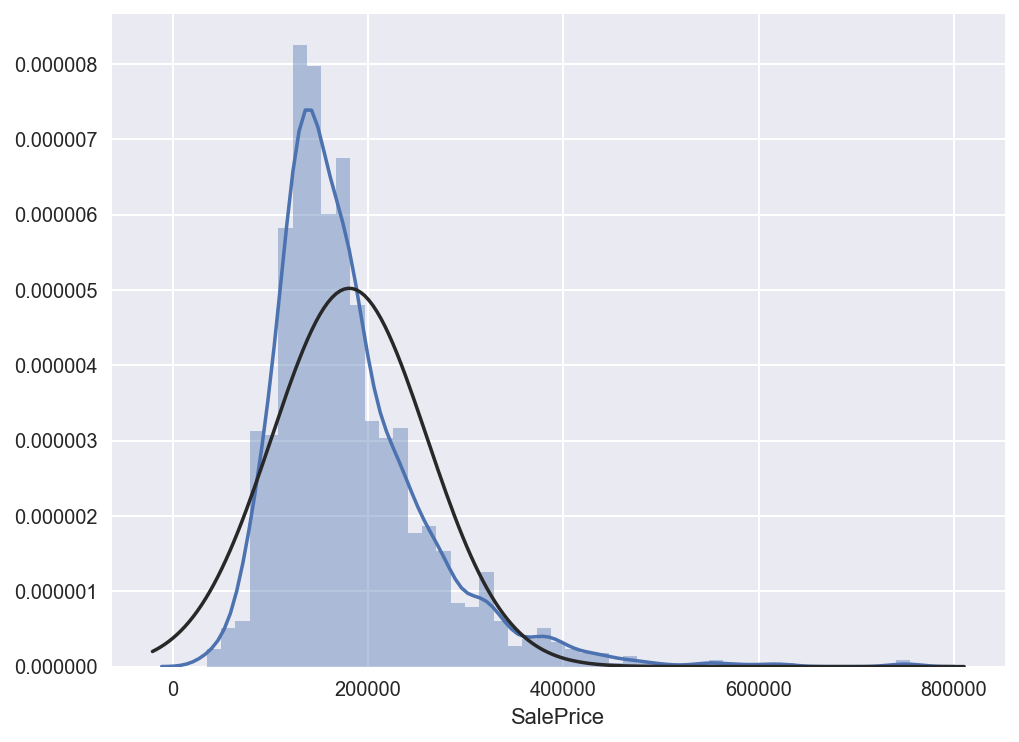

In [9]:
import matplotlib.pyplot as plt  # Visulization
import seaborn as sns  # Visulization
from scipy.stats import norm

# histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['SalePrice'], fit=norm)
# plt.savefig('./绘制直方图和概率密度曲线.jpg')
plt.show()

- Long tail formation to the right (not normal distribution)
    - Q. Should I normalize? 

    - A. Yes. There are two purposes for normalization here. 1. To make the same status evaluation metric as the  RMSLE. 2. To satisfy the assumption of linear regression.

看看偏度和峰度。


+ 偏度 `> 0` 表示正偏，或者右偏，长尾在右边，说明绝大多数人分布在低的值；
+ 峰度 `> 0` 表示比正态分布更陡峭；

In [10]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# liwei：这里峰度都到 6 了，确实是比正态分布还要陡峭

Skewness: 1.882876
Kurtosis: 6.536282


- Skewness: The longer the right tail, the more positive the tail
- Kurtosis (kurtosis / kurtosis): If the kurtosis value (K) is close to 3, the scatter is close to the normal distribution. (K <3), the distributions can be judged to be flattened more smoothly than the normal distribution, and if the kurtosis is a positive number larger than 3 (K> 3), the distribution can be considered to be a more pointed distribution than the normal distribution

【翻译】如果峰度值（K）接近3，则散射接近正态分布。 （K 3），分布可以被认为是比正态分布更尖锐的分布

- Long tail formation to the right (not normal distribution)
    - Q. Should I normalize? 

    - A. Yes. There are two purposes for normalization here. 1. To make the same status evaluation metric as the  RMSLE. 2. To satisfy the assumption of linear regression.

### 使用 QQ 图看看“+1，取对数” 处理以后，数据更加符合正态分布

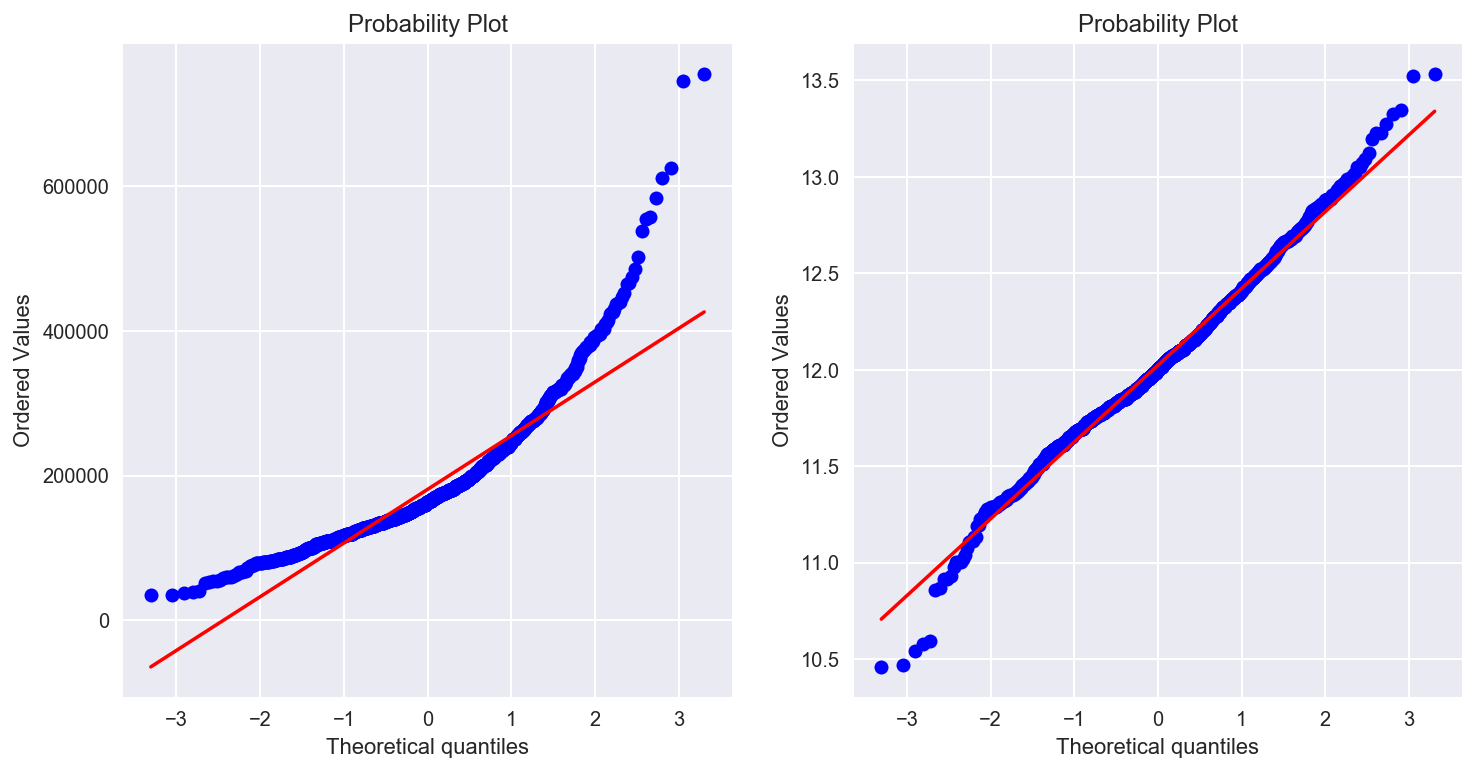

In [13]:
from scipy import stats  # Analysis

fig = plt.figure(figsize=(12, 6))

fig.add_subplot(1, 2, 1)
res = stats.probplot(df_train['SalePrice'], plot=plt)

fig.add_subplot(1, 2, 2)
res = stats.probplot(np.log1p(df_train['SalePrice']), plot=plt)

plt.savefig('QQ.jpg')

liwei 注：符合正态分布是机器学习算法喜欢的样子。

In [14]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
df_train['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### 1.2 Visualization : High correlated variable with SalePrice & 1.3 Find Na, Missing values

- `Pearson product ratio correlation` : 
Pearson correlation evaluates the linear relationship between two metric variables. There is a linear relationship when the variation of one variable is proportional to the change of another variable. For example, Pearson correlation can be used to assess whether the increase in temperature in a production facility is related to changes in the thickness of the chocolate coating.

【翻译】皮尔逊相关性计算两个度量变量之间的线性关系。当一个变量的变化与另一个变量的变化成正比时, 存在线性关系。例如, pearson 相关性可用于评估生产设施中温度的升高是否与巧克力涂层厚度的变化有关。

- `Spearman Rank Correlation` : 
Spearman correlation evaluates the simple relationship between two metric or sequential variables. In a simple relationship, the two variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked value for each variable, not the raw data. Spearman correlation is often used to evaluate relationships containing sequential variables. For example, you can use Spearman correlation to assess whether the order in which employees complete the test exercises is related to the number of months employed.

【翻译】斯皮尔曼相关性评估两个度量变量或顺序变量之间的简单关系。在简单的关系中, 这两个变量往往会一起变化, 但不一定是不变的。斯皮尔曼相关系数基于每个变量的排名值, 而不是原始数据。先锋相关通常用于评估包含顺序变量的关系。例如, 您可以使用 spearman 相关性来评估员工完成测试练习的顺序是否与雇用的月数相关。

![](https://choco9966.github.io/Team-EDA//image/correlation1.png)

               Pearson = +1, Spearman = +1                 Pearson = +0.851, Spearman = +1

liwei 译：使用斯皮尔曼相关系数，因为类别变量混入其中。

+ 不管是正相关还是负相关，取绝对值衡量它们的相关程度；
+ 对它们的相关程度排个序，从大到小；
+ 相关系数矩阵是一个对称矩阵，为了看起来简洁，去掉一半。


so  we must use spearman correlation, becuase categorical variables are mixed, 

使用 spearman 计算相关系数。

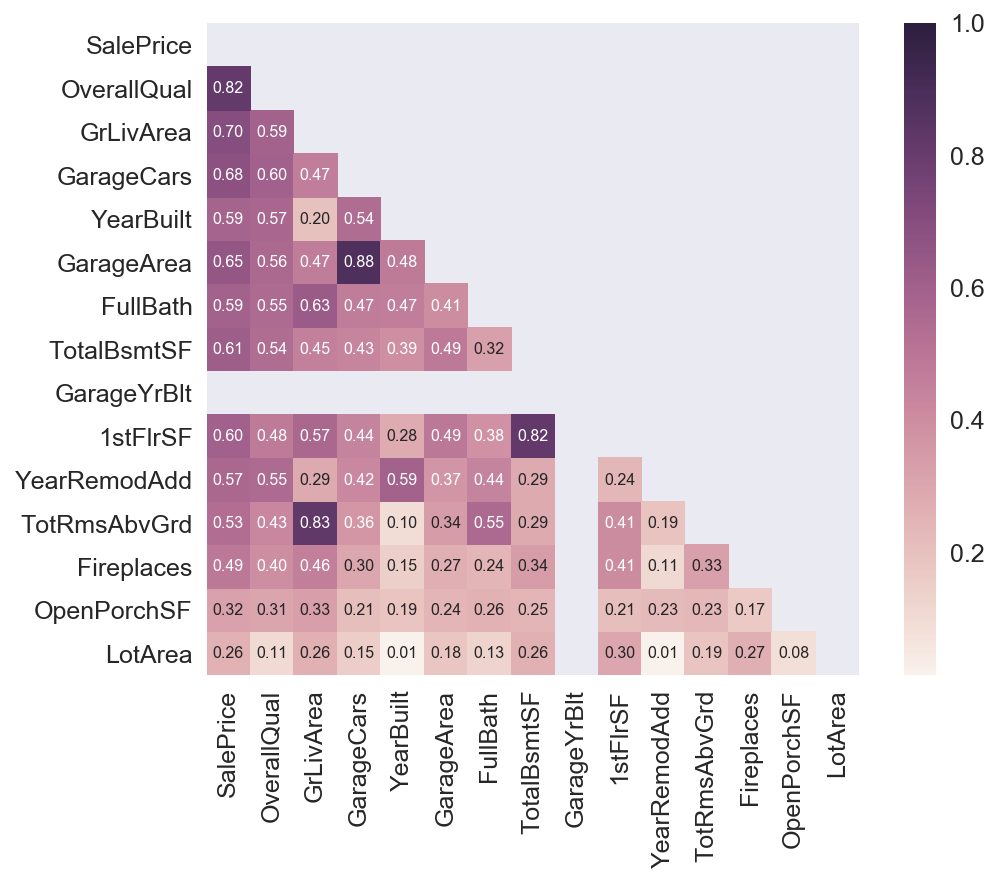

In [15]:
import seaborn as sns

# saleprice correlation matrix
k = 15  # number of variables for heatmap
corrmat = abs(df_train.corr(method='spearman'))  # correlation 전체 변수에 대해서 계산
# nlargest : Return this many descending sorted values
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(df_train[cols].values.T)  # correlation 특정 컬럼에 대해서
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))

# Sokratis Kouvaras help to hide upper symmetric metrics
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
sns.set_style("white")
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 8},
    yticklabels=cols.values,
    xticklabels=cols.values,
    mask=mask)
plt.show()
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)



【liwei 注】关键在这里：

```python
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
```

- `triu_indices_from` 这个函数返回上三角矩阵，所以把上三角的部分遮盖了。

9 most relevant variables with SalePrice

liwei 注：找了 9 个高度相关的变量。

- OverallQual : Overall material and finish quality 整体材料和光洁度
- GrLivArea : Above grade (ground : the portion of a home that is above the ground) living area square feet 以上等级（地面：高于地面的住宅部分）居住面积平方英尺
- GarageCars : Size of garage in car capacity 车库容量的车库大小
- GarageArea : Size of garage in square feet
- TotalBsmtSF : Total square feet of basement area (지하실 the lowermost portion of a structure partly or wholly below ground level; often used for storage)
- 1stFlrSF : First Floor square feet
- FullBath : Full bathrooms above grade
- TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
- YearBuilt : Original construction date

In [16]:
# OverallQual 是一个分类变量
df_train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [17]:
df_train['OverallQual'].dtype

dtype('int64')

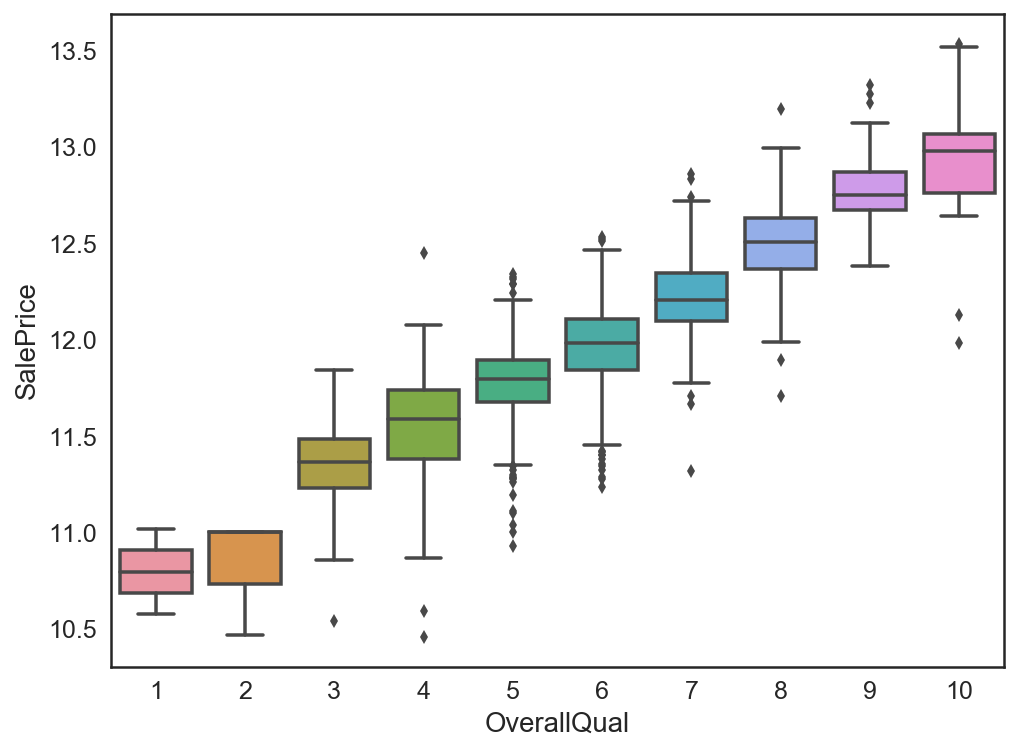

In [18]:
# OverallQual 整体材料和光洁度，是个离散型类别变量，根据这个类别变量看看价格分布
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

- The higher the quality, the better the selling price.
- However, the 3rd, 4th level of outliers and 7 and 10 outliers do not have anything suspicious. These values should be checked again later.

liwei 注：分析连续变量对连续变量的影响，可以使用回归图，或者绘制散点图矩阵

In [27]:
# 居住面积平方英尺，GrLivArea 是一个连续型变量
df_train['GrLivArea'].dtype

dtype('int64')

In [11]:
# GrLivArea 是一个连续型变量
#df_train['GrLivArea'].unique()

两个连续型变量，可以画回归图，看看它们的回归关系。

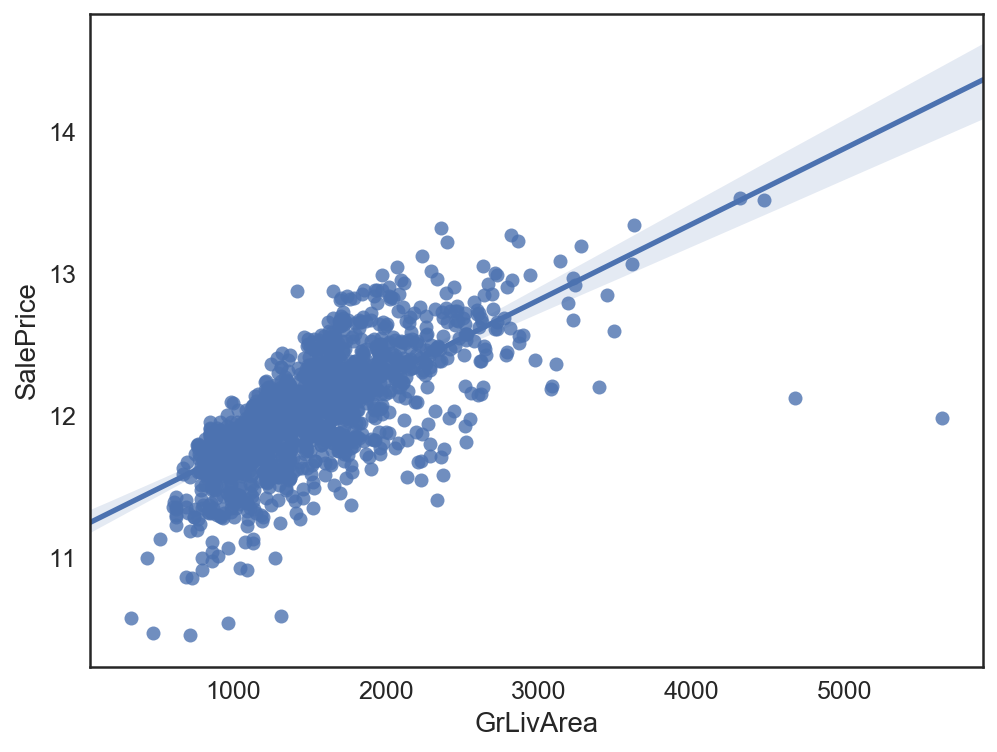

In [20]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=data)
plt.show()

The relationship between GrLivArea and SalePrice has a positive correlation. That is, as the area becomes wider, the price also increases. However, irrespective of that, the GrLivArea > 4000 and SalePrice < 13 seems outliers

【翻译】聆听翻译 GrLivArea与SalePrice之间的关系具有正相关关系。也就是说，随着面积变宽，价格也会上涨。然而，无论如何，GrLivArea> 4000和SalePrice <13似乎都是异常值。

【注意】可以从这张图中，分析出异常值。

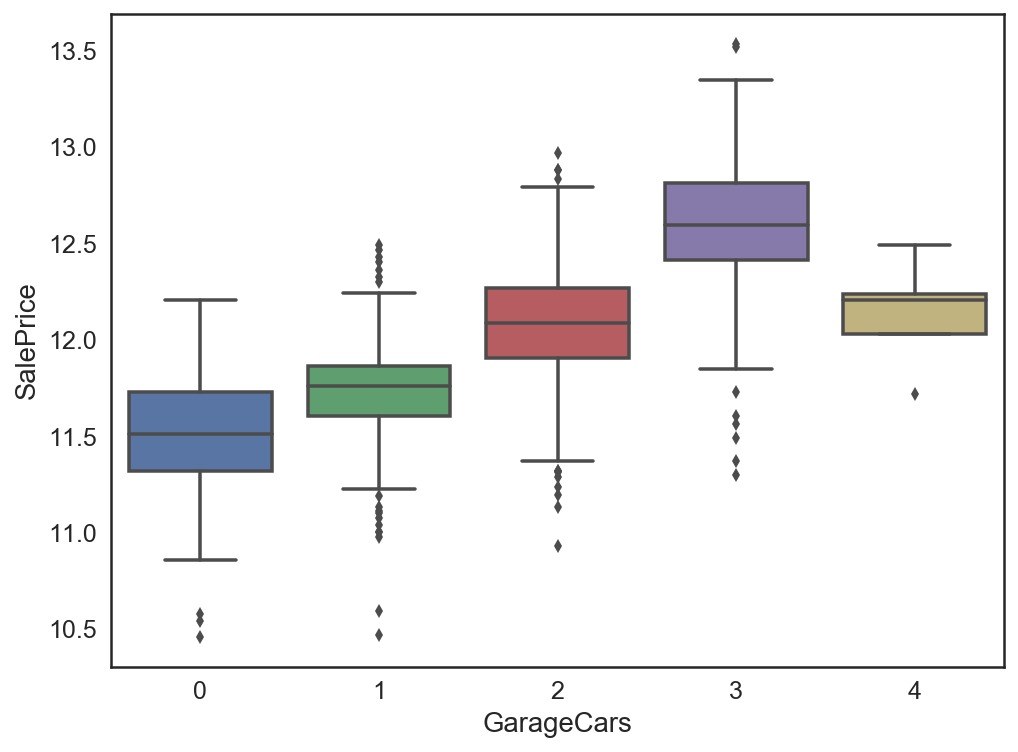

In [21]:
# GarageCars : Size of garage in car capacity 车库容量的车库大小
data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
plt.show()

- GarageCars 4 is very strange ... why? we find the reason by EDA

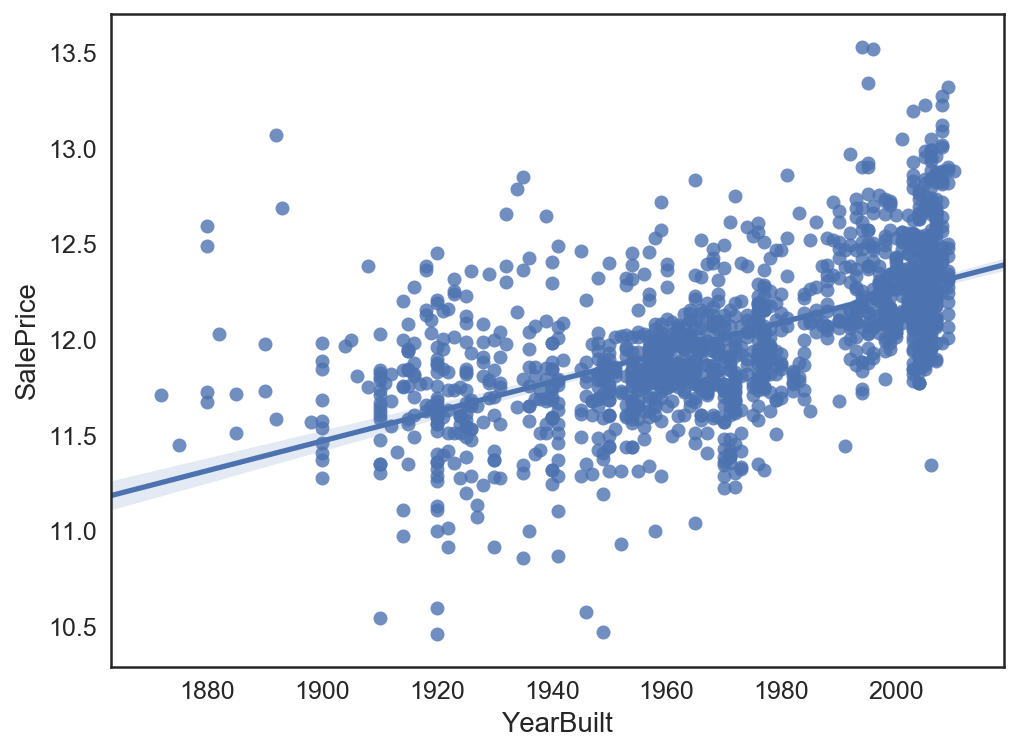

In [22]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='YearBuilt', y="SalePrice", data=data)
plt.show()

In [28]:
# df_train['GarageArea']

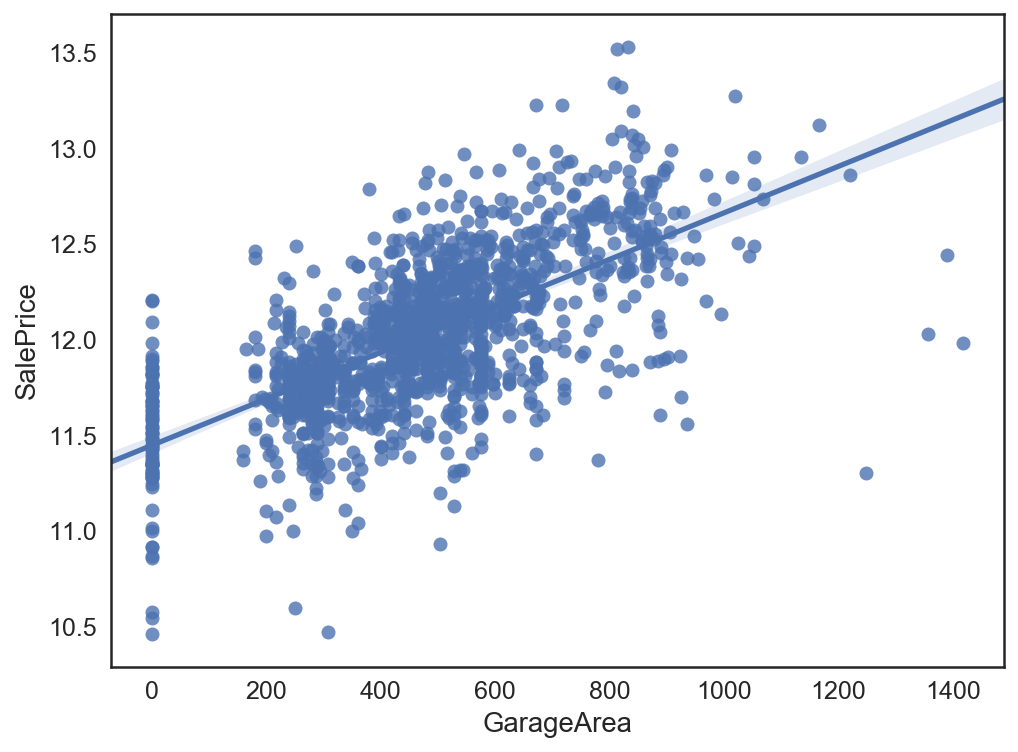

In [23]:
# GarageArea 也是连续型变量，直接画 regplot
data = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GarageArea', y="SalePrice", data=data)
plt.show()

- GarageArea is divided into zero and non-zero parts.
- Generally, there is a positive correlation. But some points seem to outliers

In [30]:
# df_train['TotalBsmtSF']

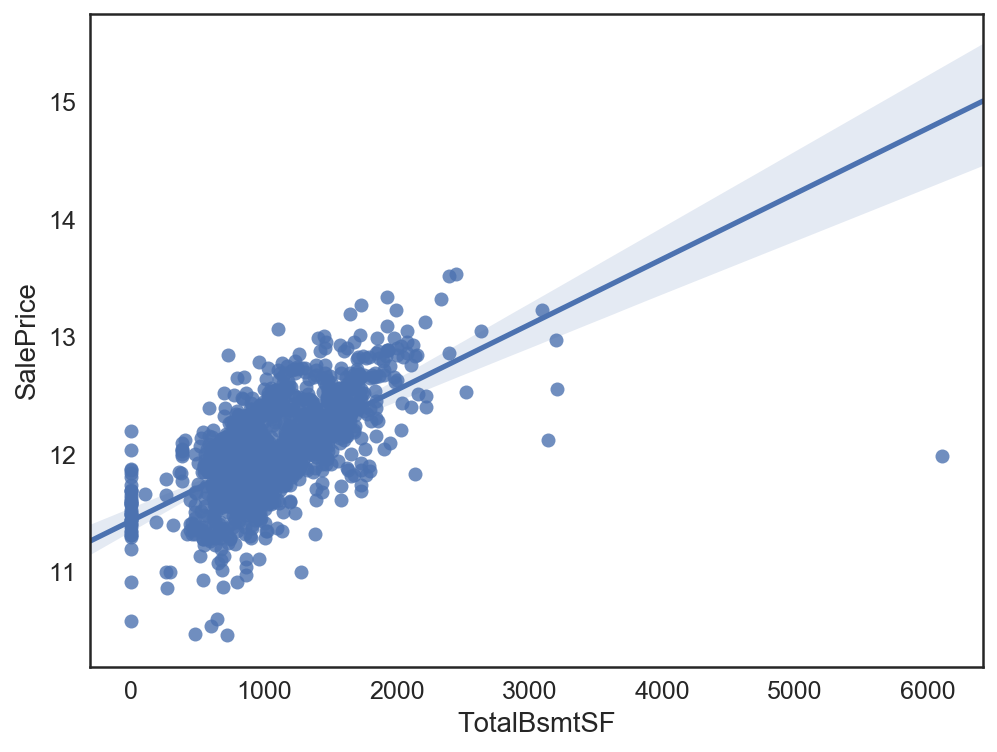

In [24]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='TotalBsmtSF', y="SalePrice", data=data)
plt.show()

- The point of TotalBsmtSF >6000 seems outlier

In [32]:
df_train.FullBath.unique()

array([2, 1, 3, 0])

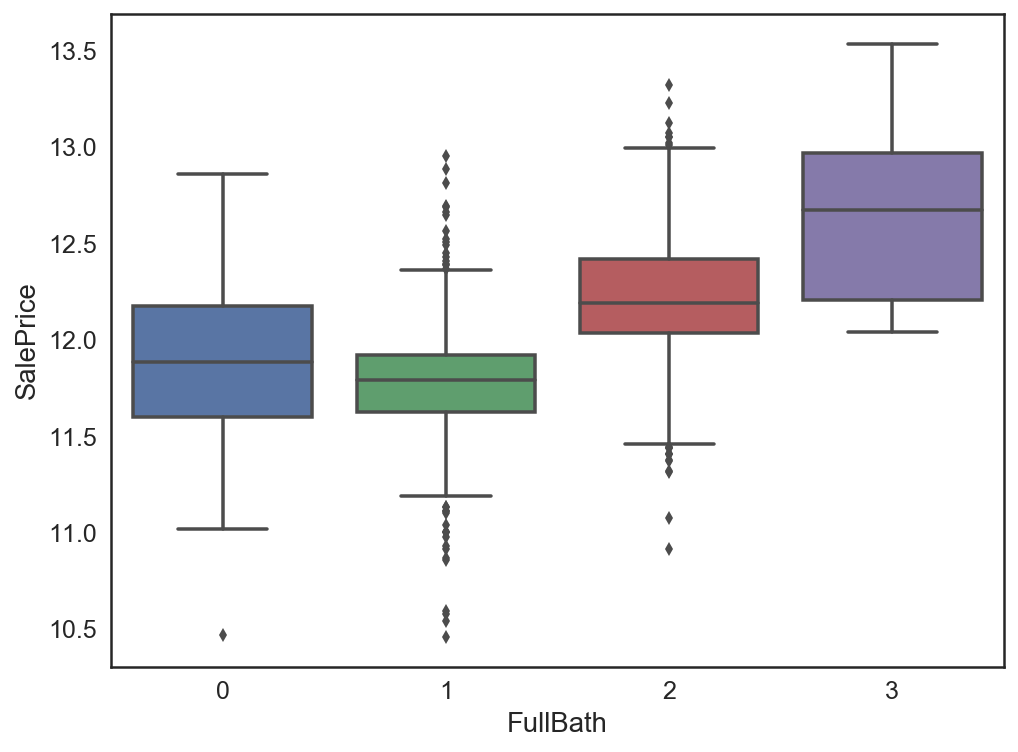

In [25]:
data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data)
plt.show()

It is strange that FullBath is zero higher. But if you read the Data Description above, you can see that there are many variables related to Bath like halfBath etc...

In [34]:
df_train['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

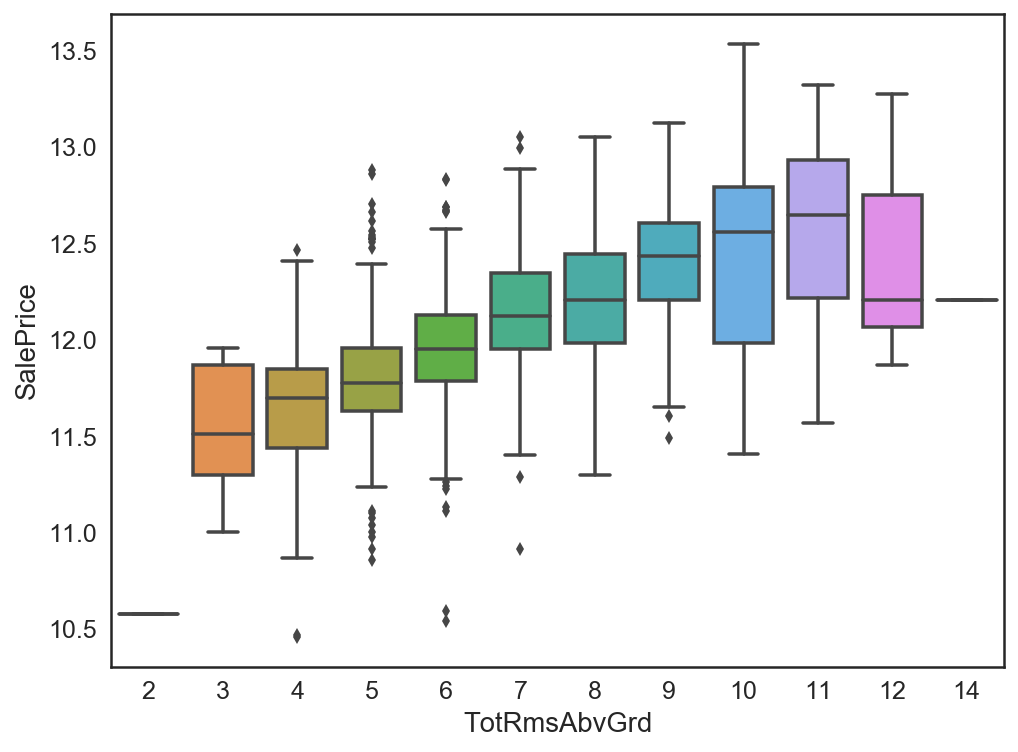

In [26]:
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)
plt.show()

I think that outlier

- Separate analysis only for 12, 14
- Very low values in 6
- very high value at 10

In [36]:
 df_train['1stFlrSF'].dtypes

dtype('int64')

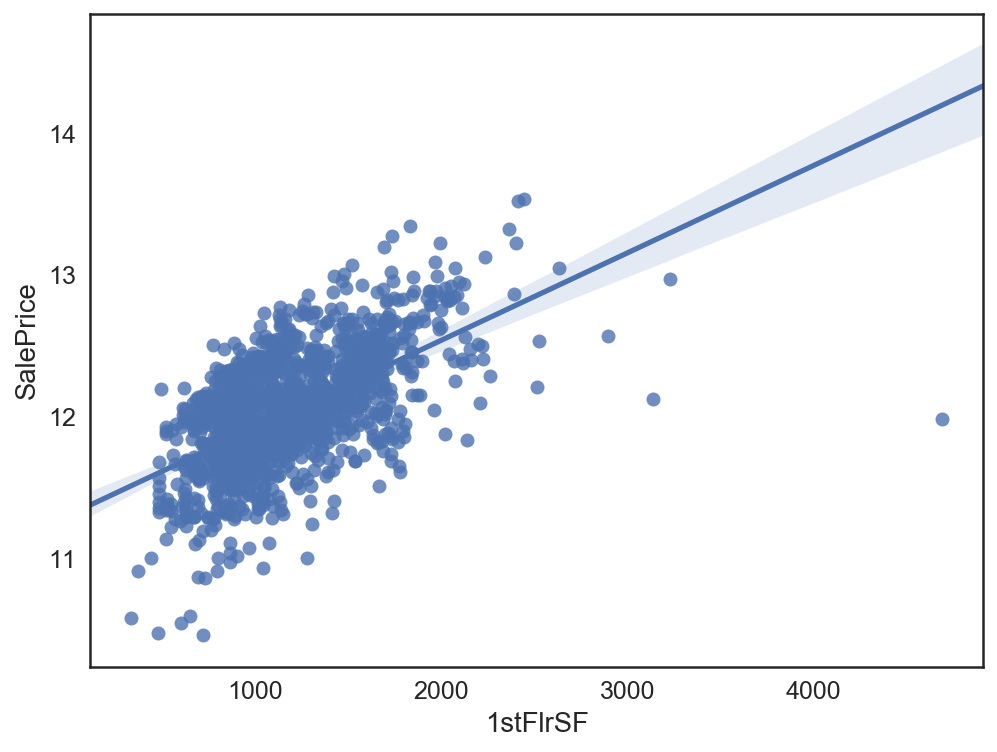

In [27]:
data = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='1stFlrSF', y="SalePrice", data=data)
plt.show()

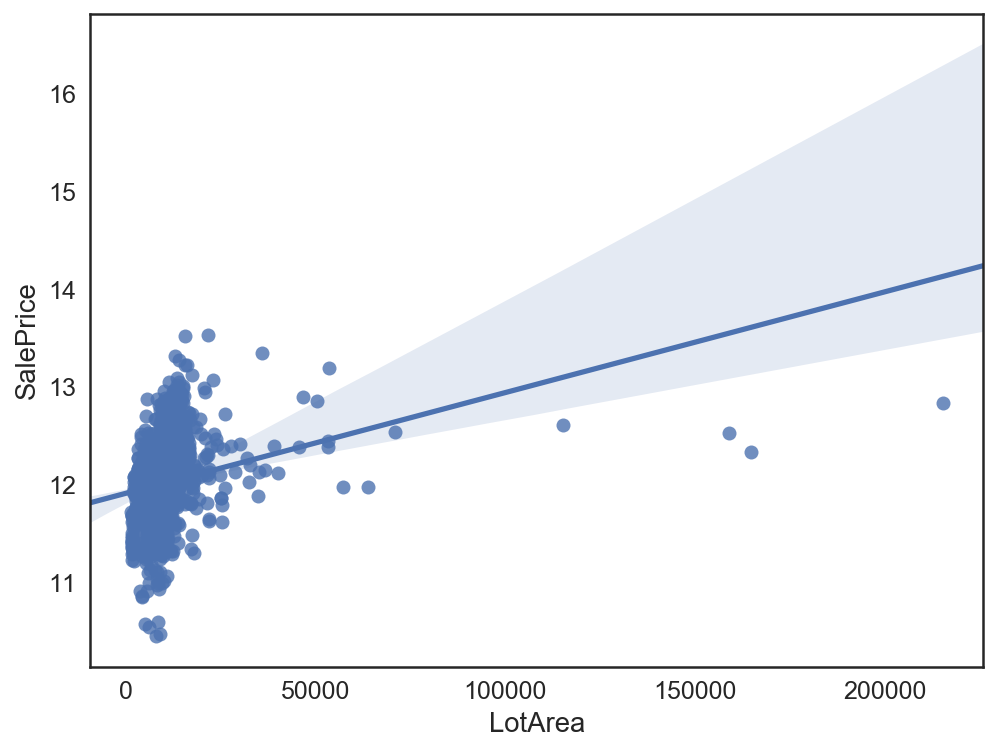

In [28]:
data = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='LotArea', y="SalePrice", data=data)
plt.show()

### 1.2 Visualization : Object Variable 类别变量的可视化
I referenced the code in the link . [Samarth Agrawal EDA for Categorical Variables - A Beginner's Way
](https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way)

liwei 注：对每一个类别变量，都看看一看在这个类别变量的分类下，目标变量（因变量）的分布情况。

绘制类别变量的箱线图。

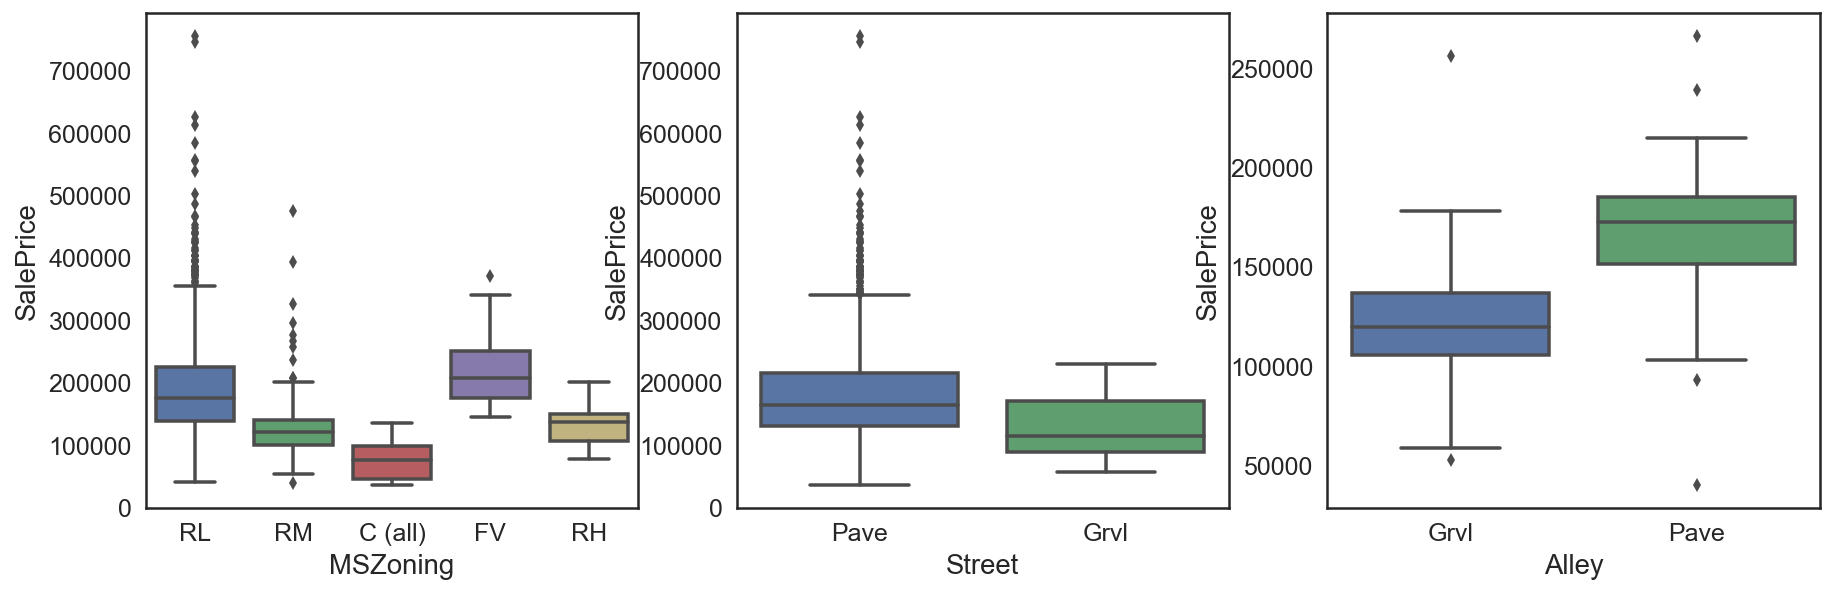

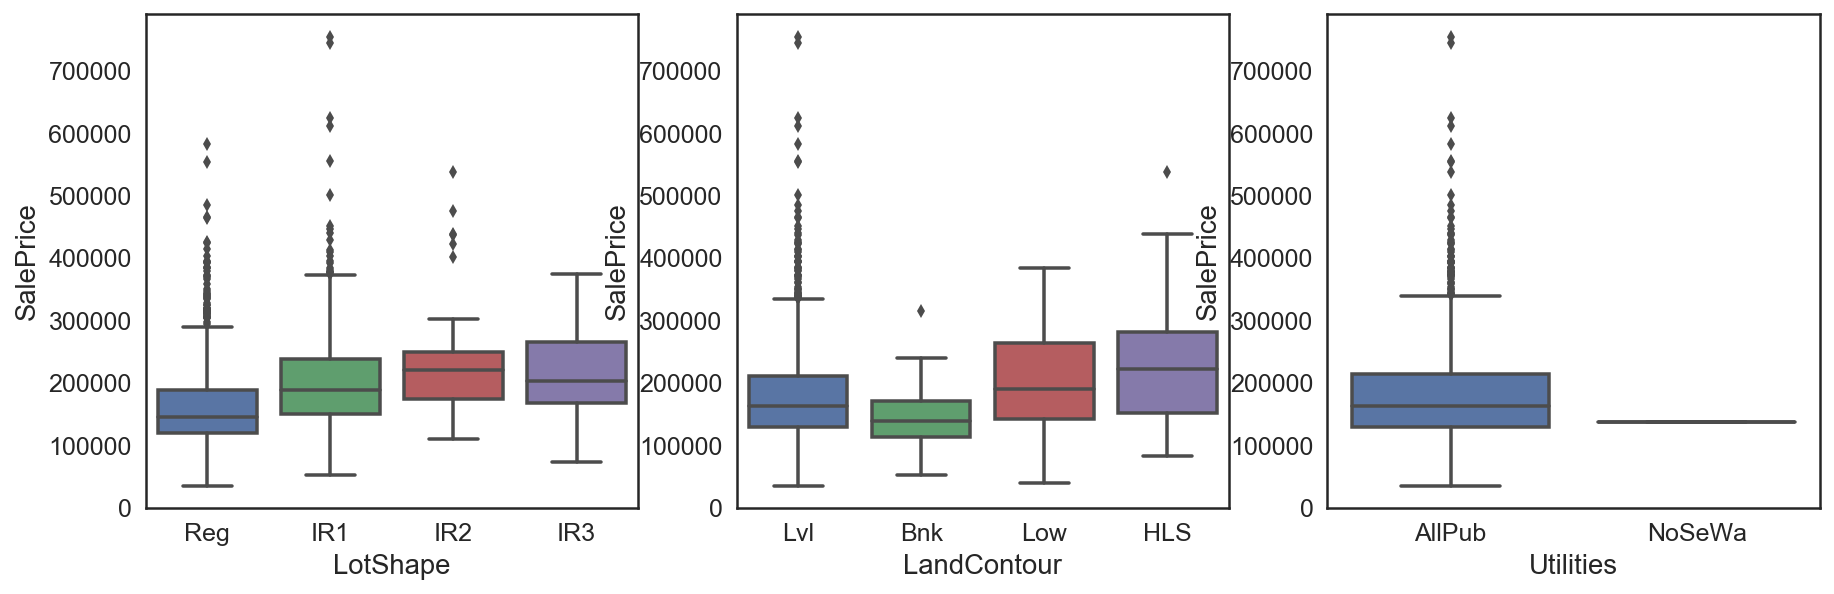

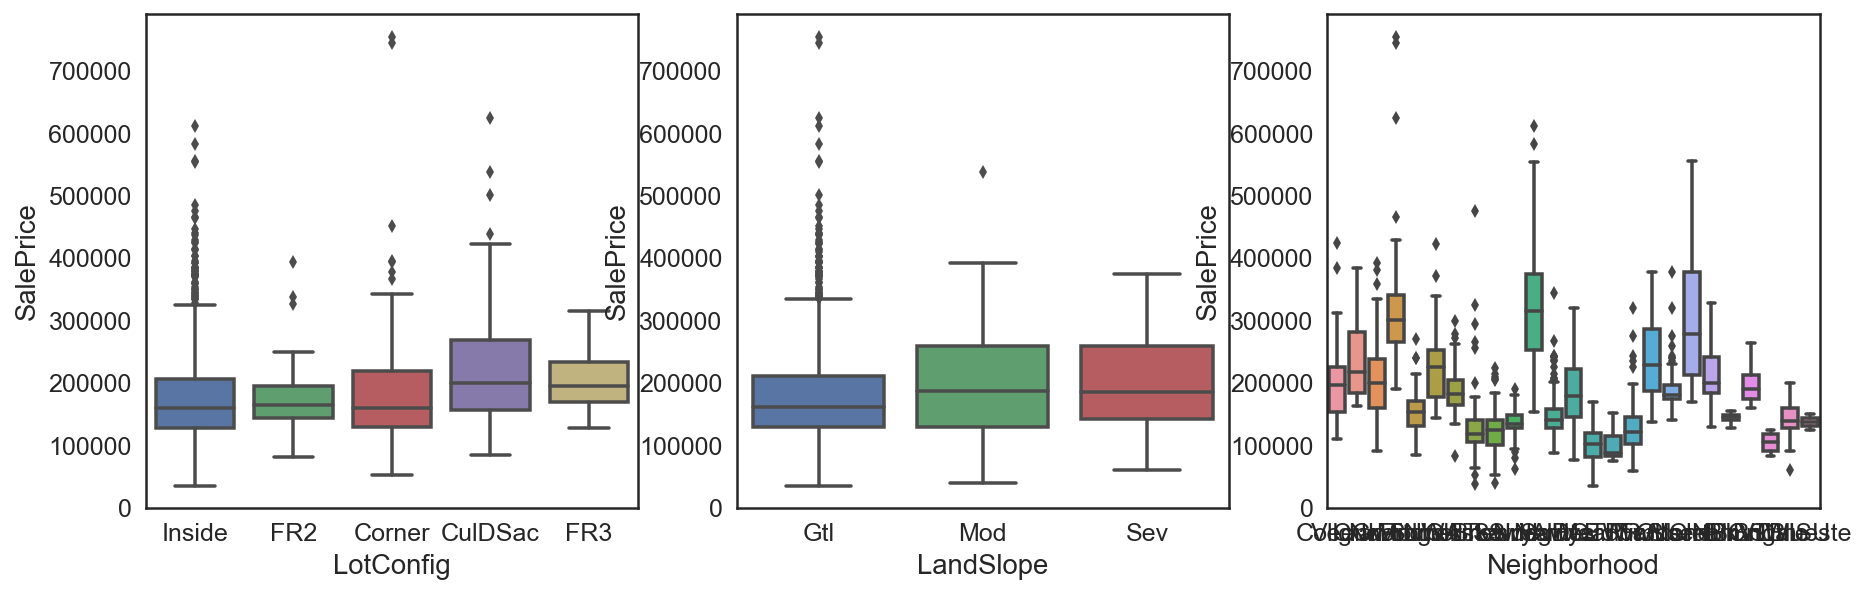

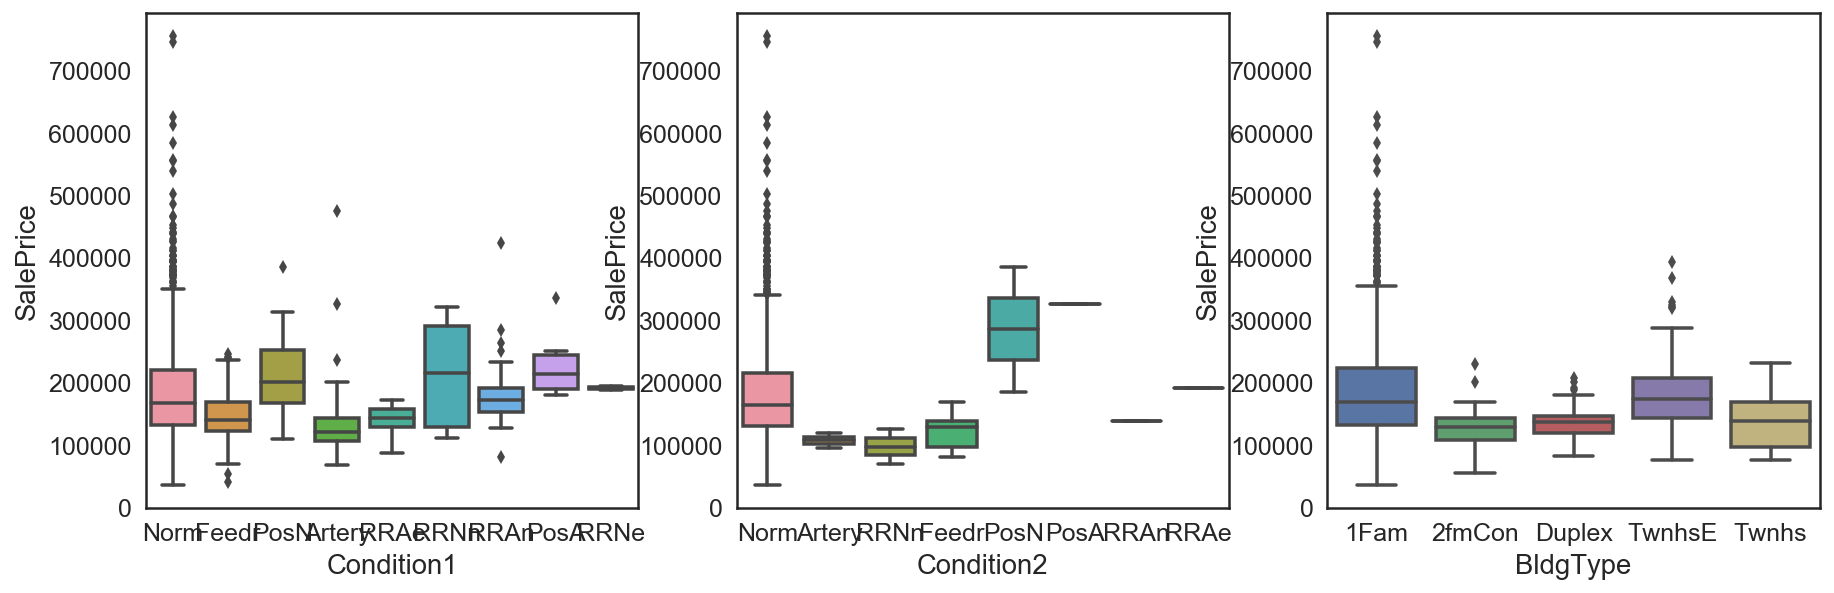

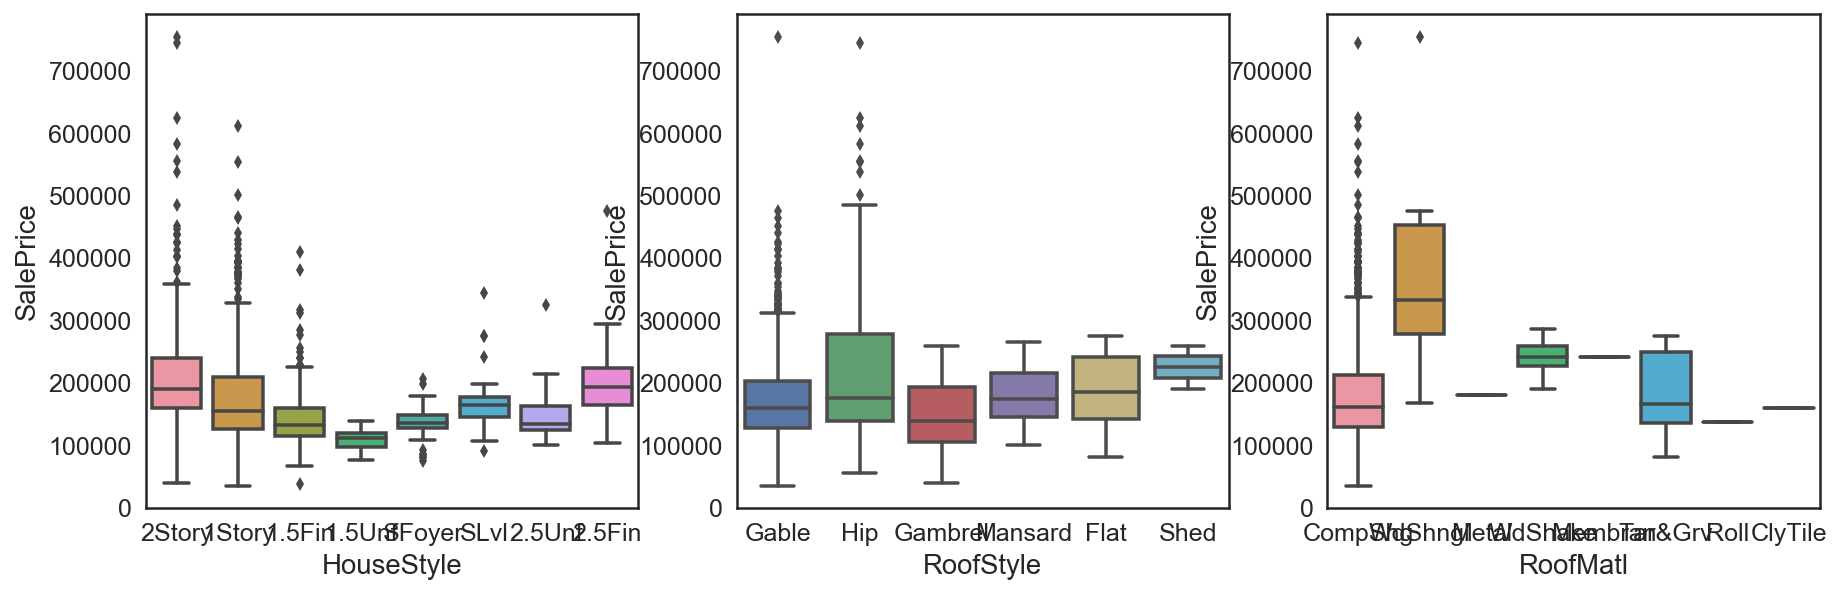

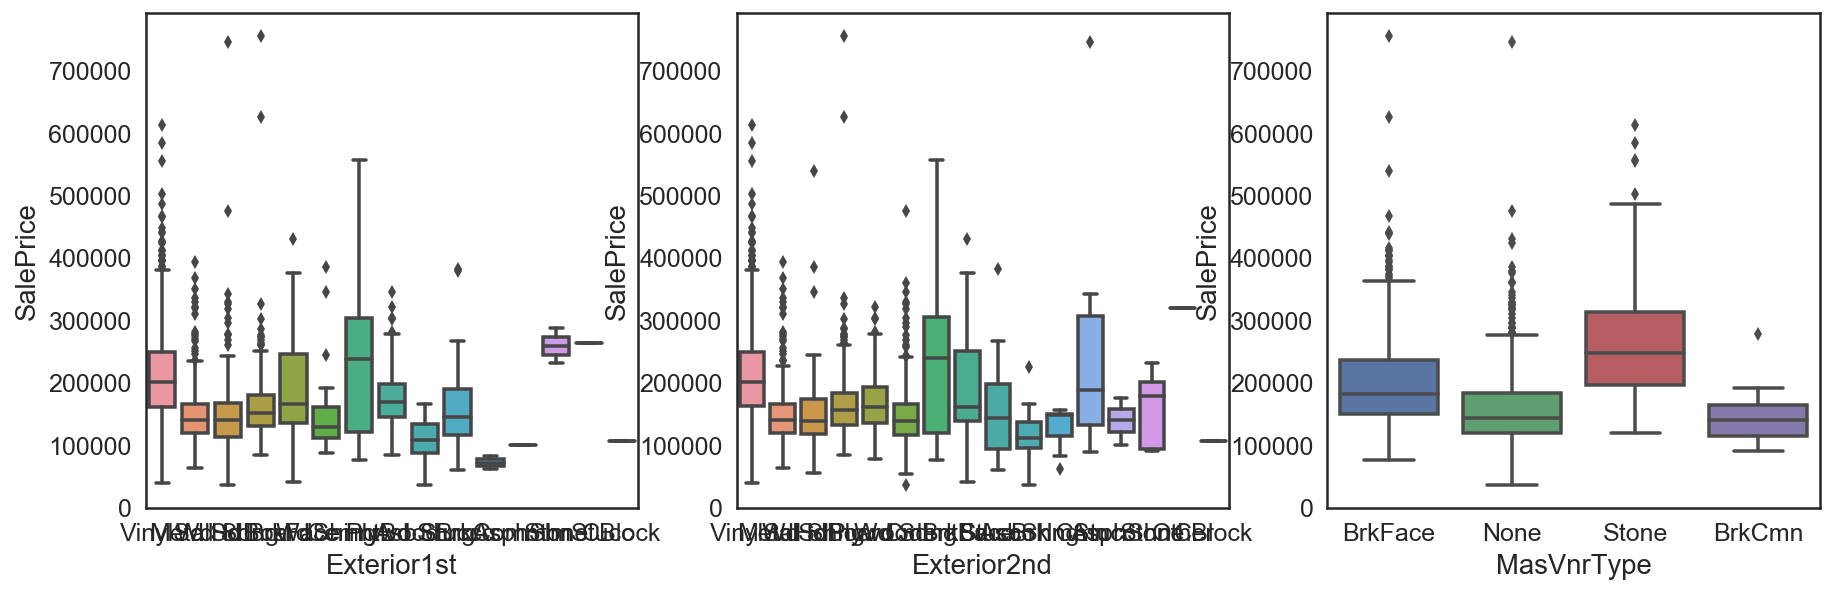

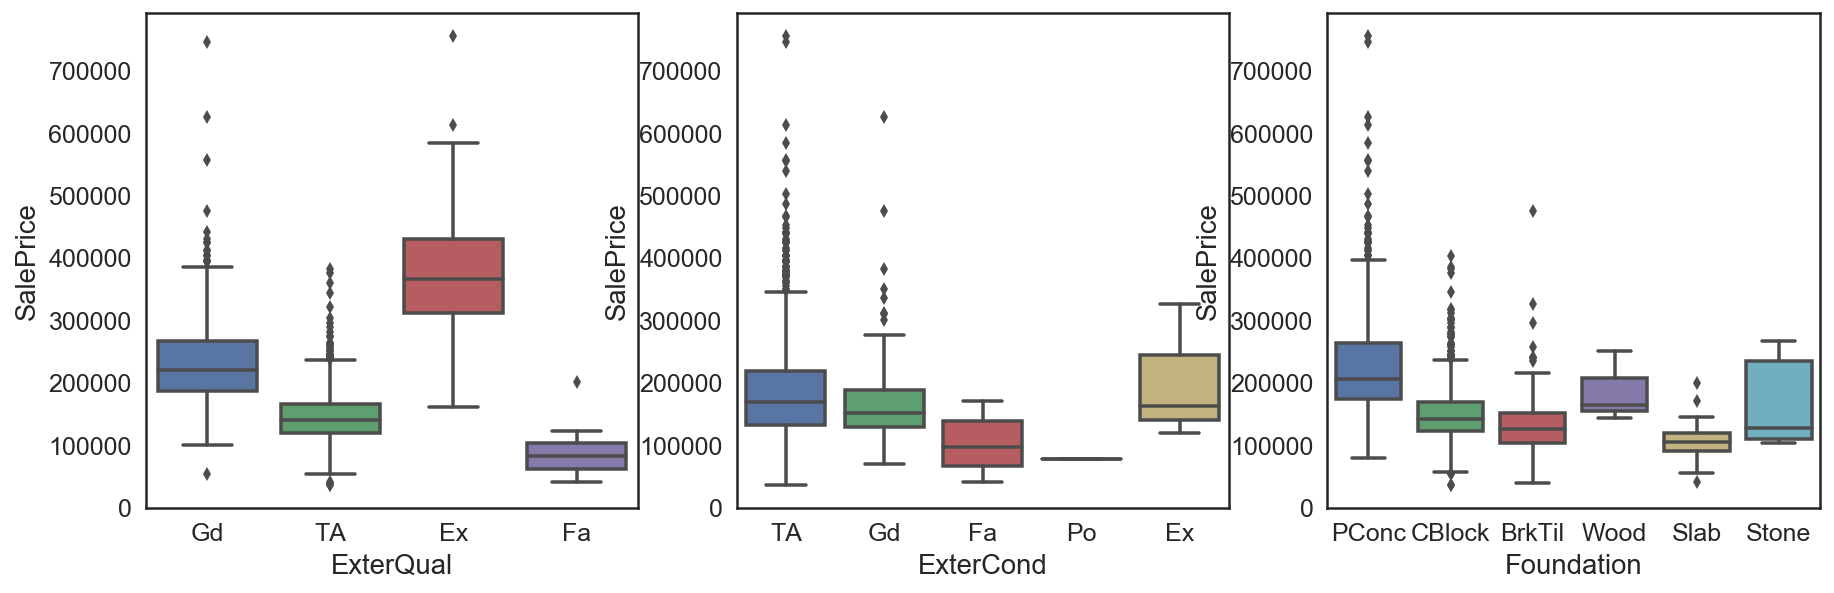

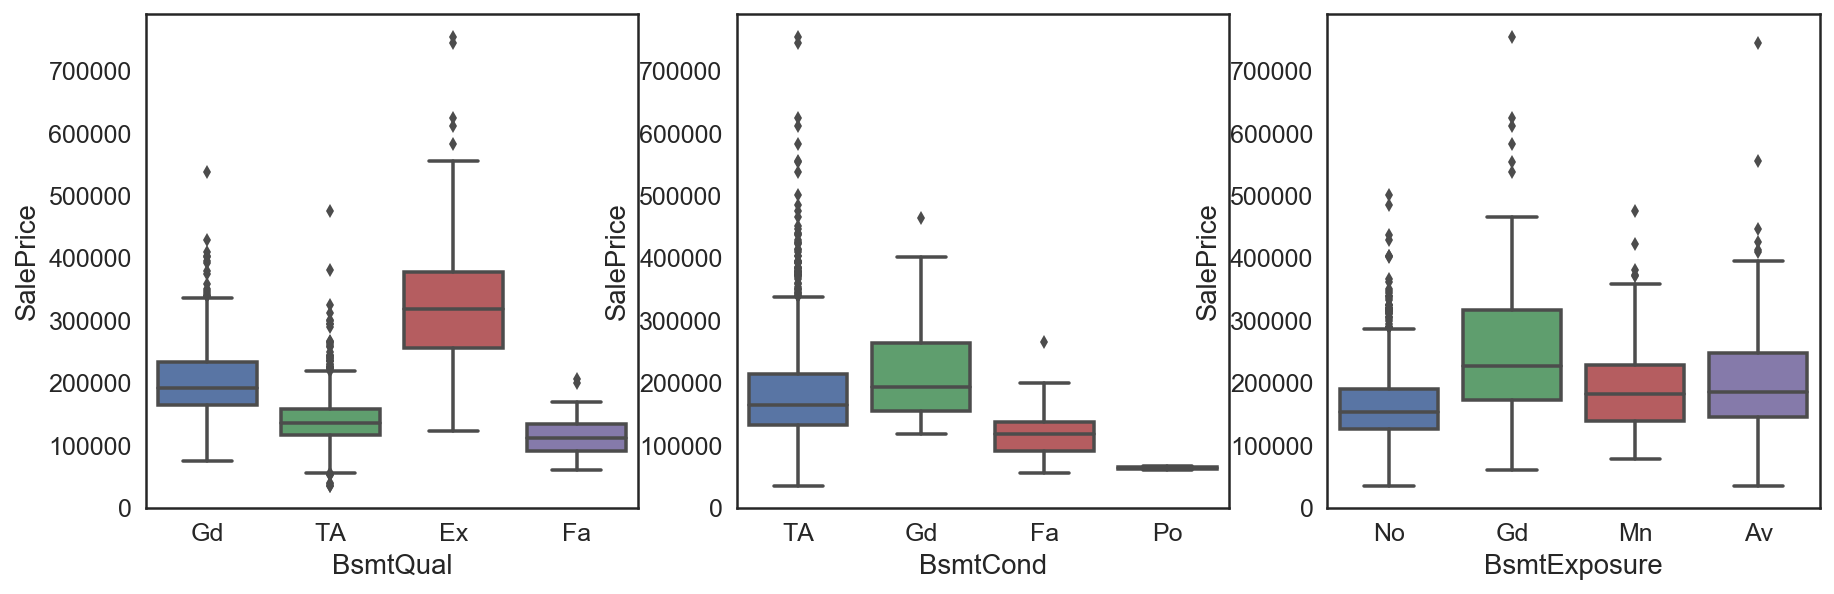

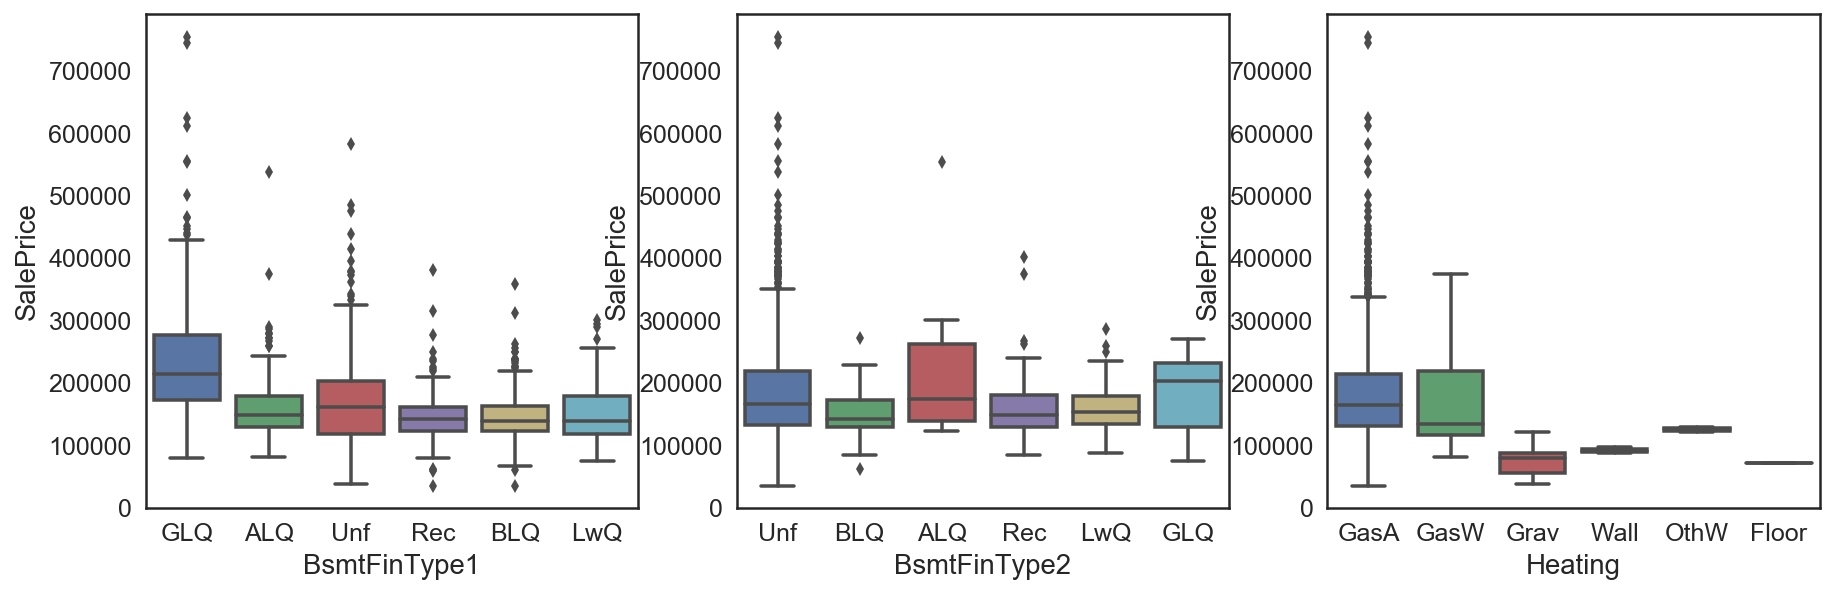

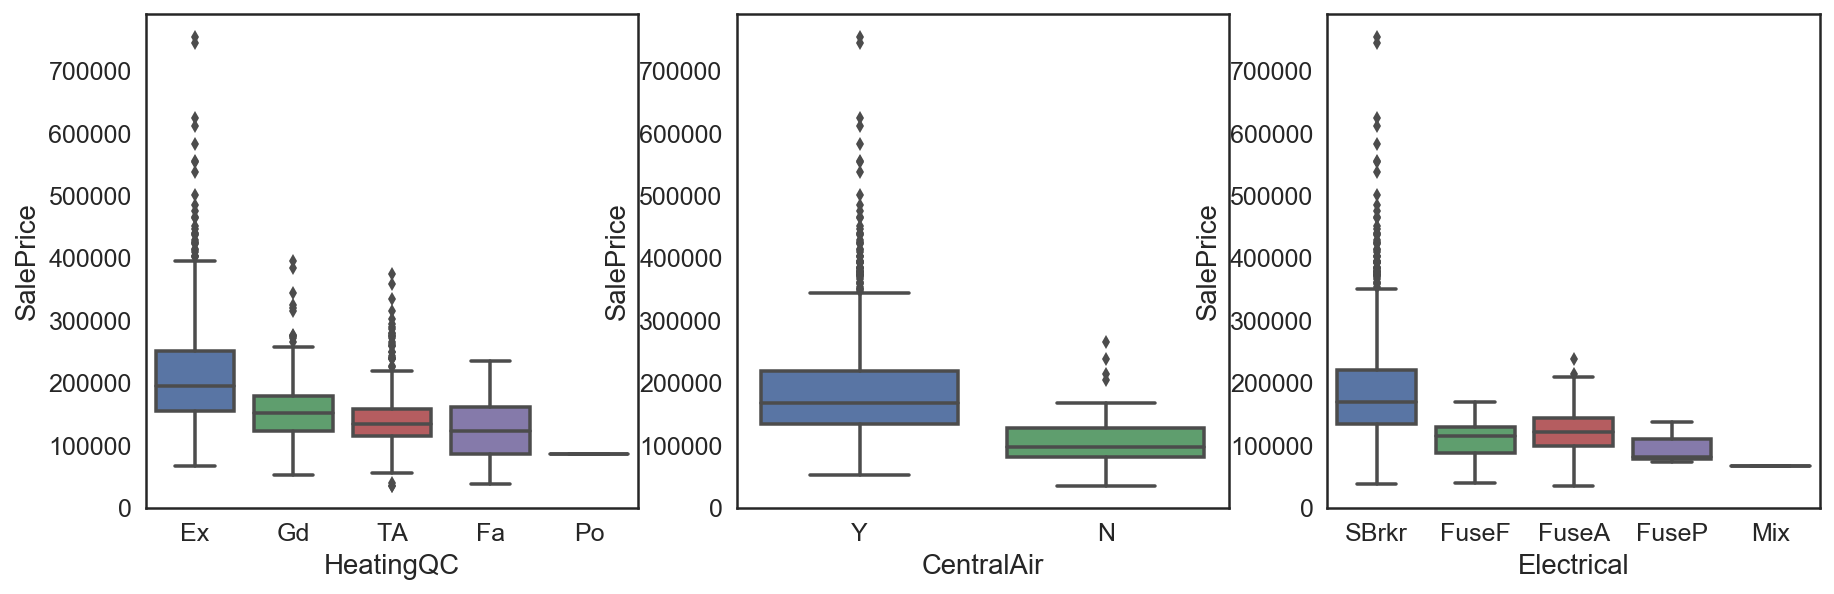

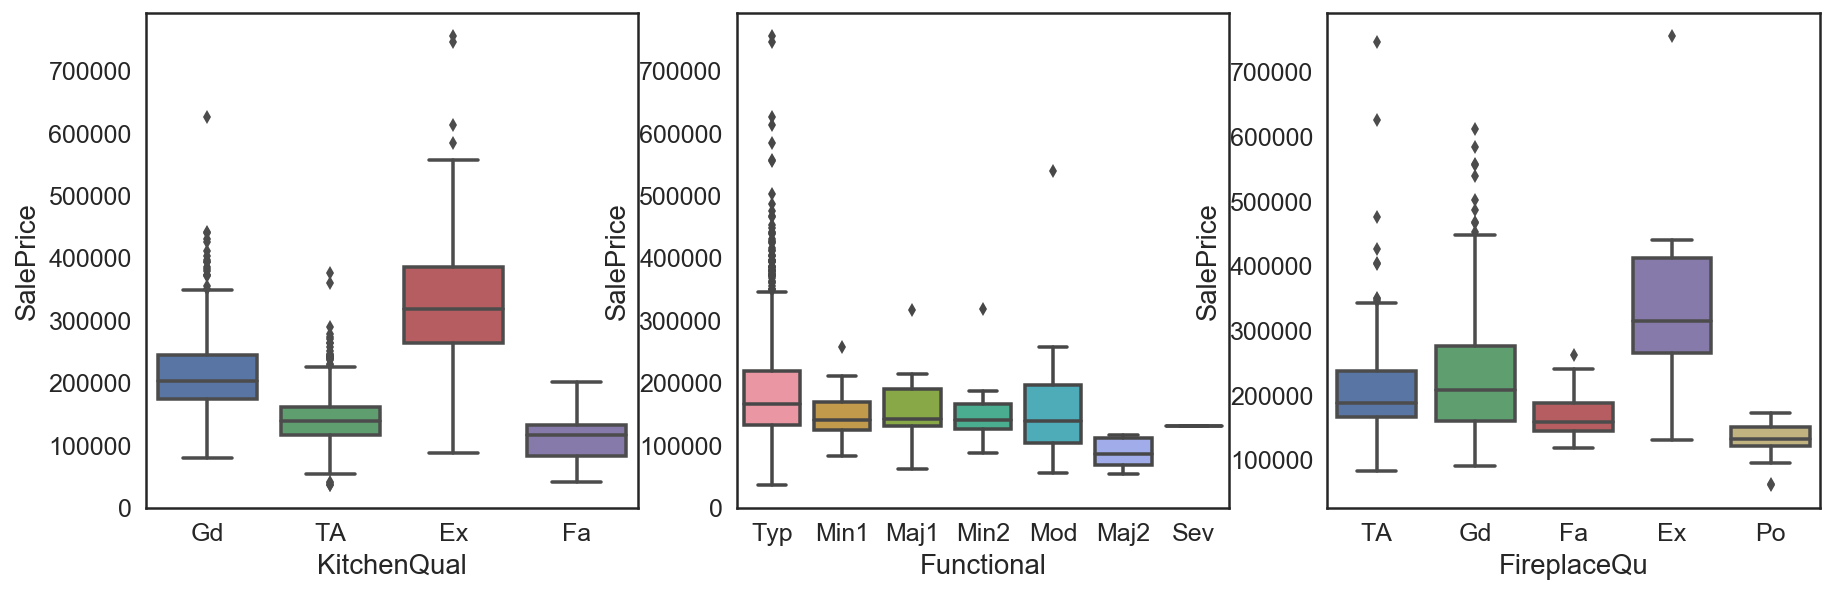

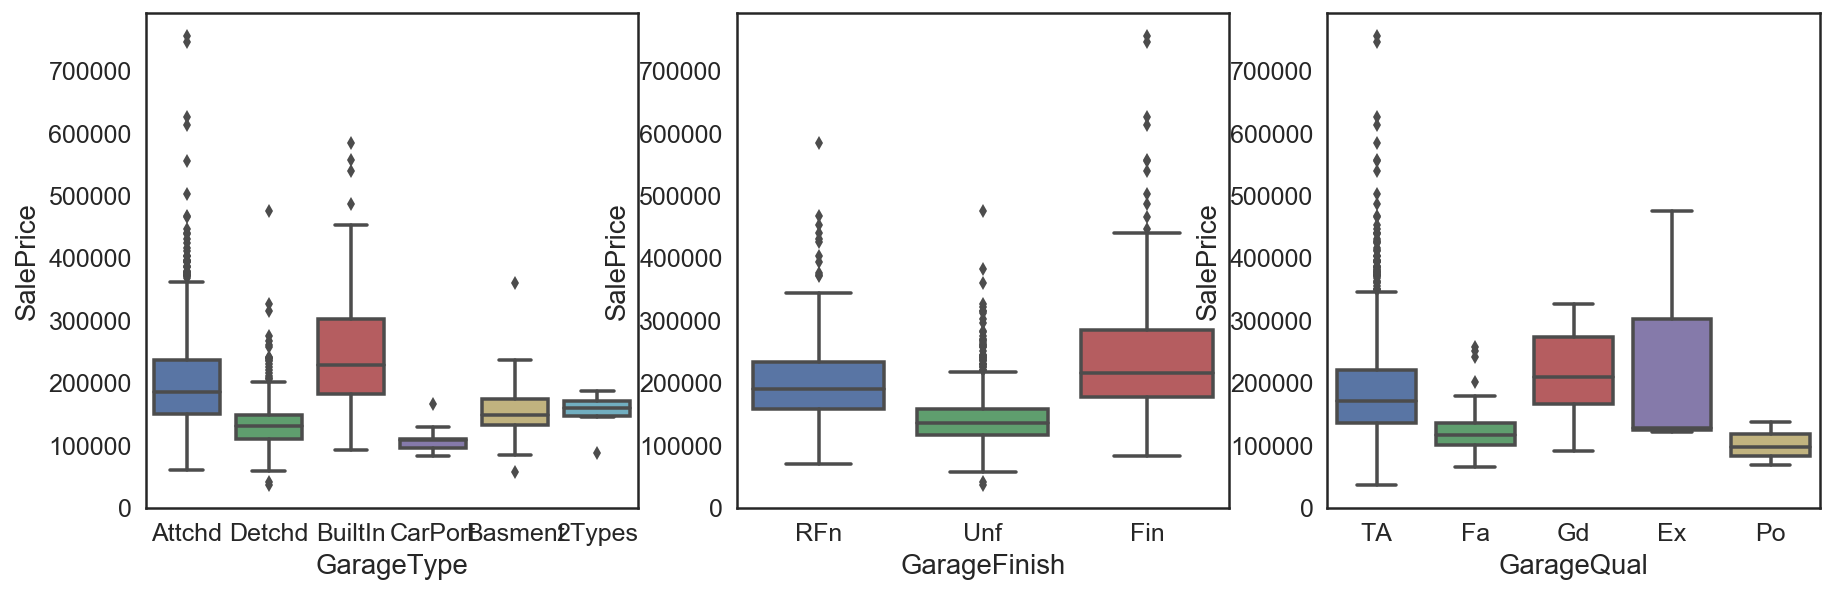

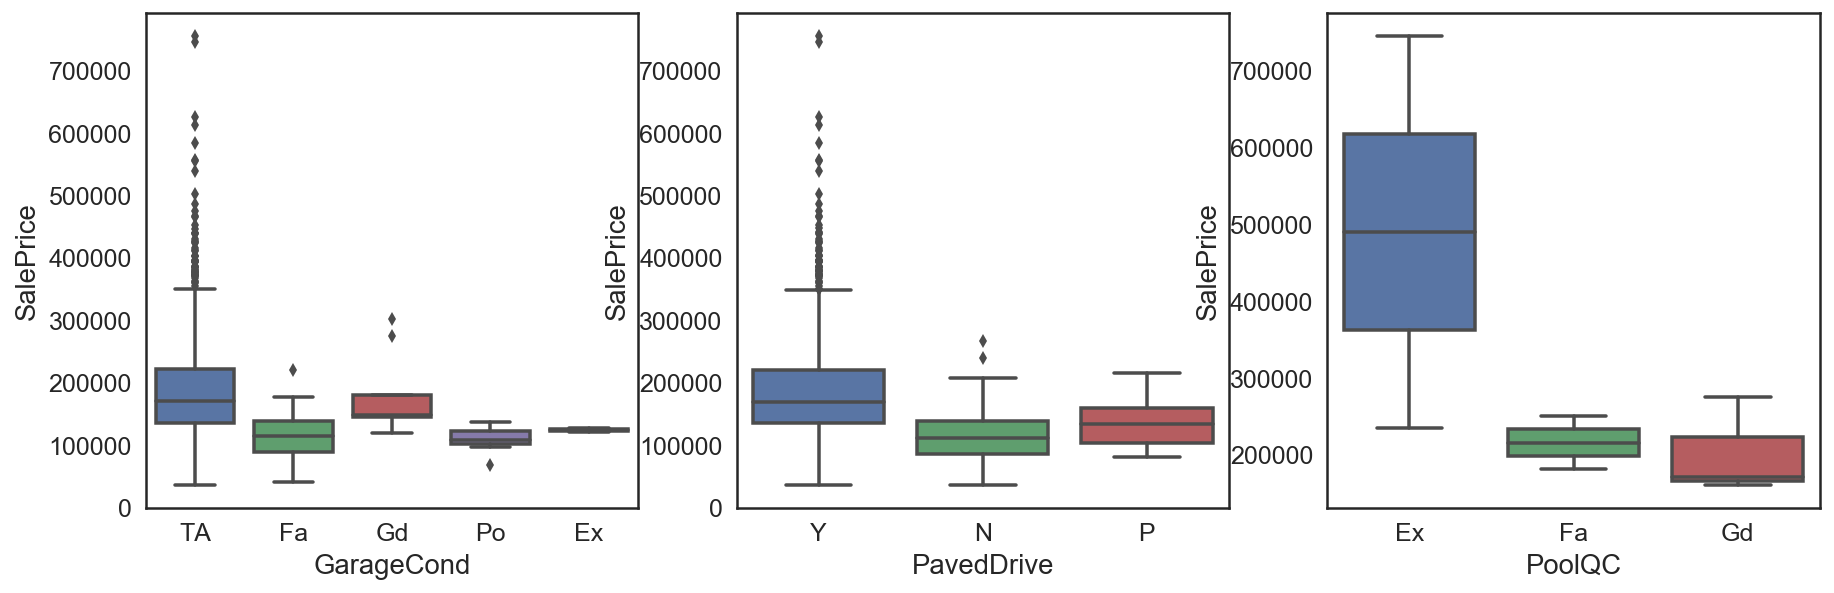

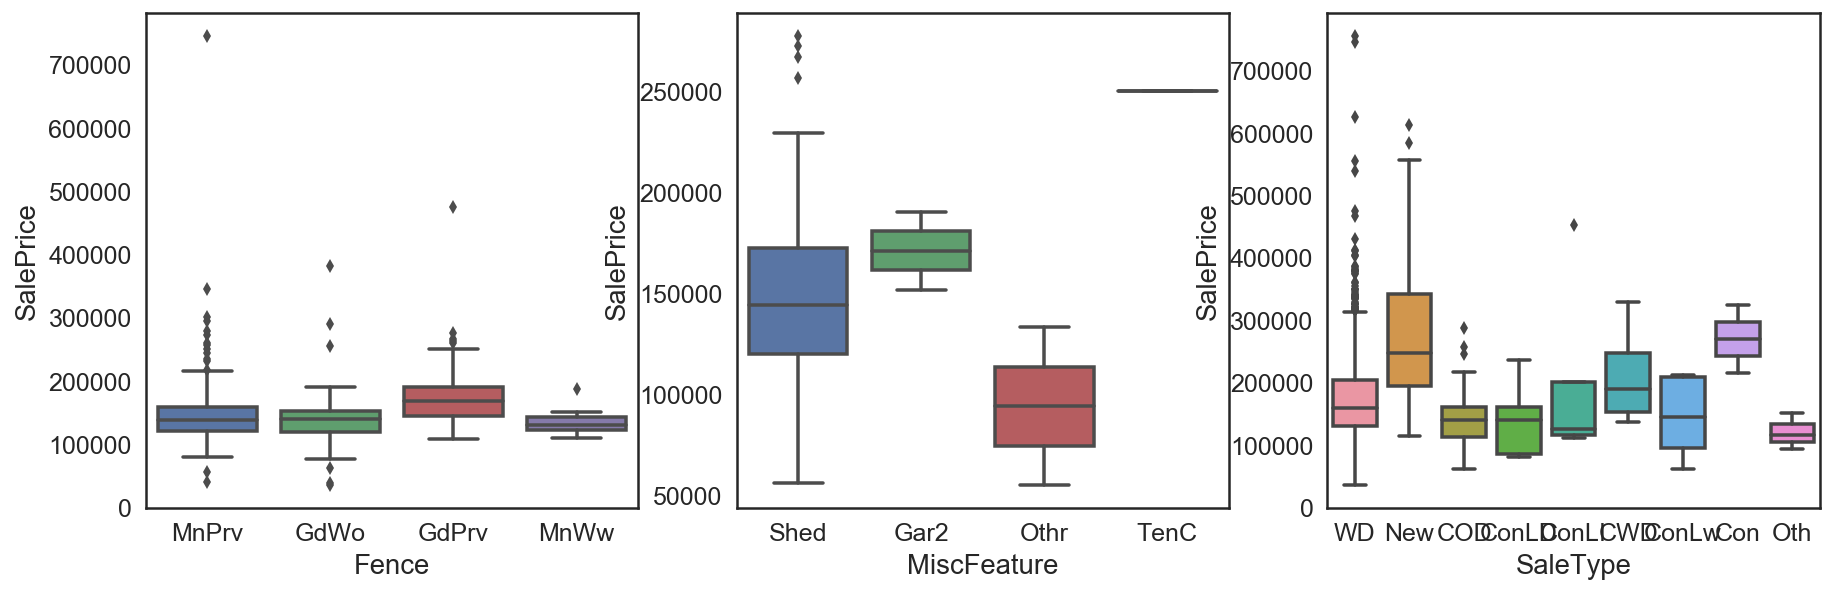

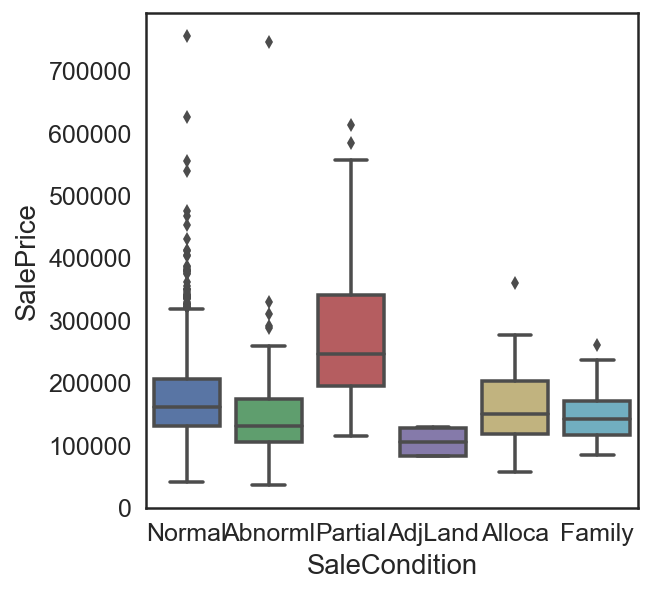

In [39]:
categorical_features = df_train.select_dtypes(include = ["object"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df_train[categorical_features]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=df_train, x=c, y='SalePrice', ax=ax2)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [30]:
# 看看类别变量有哪些
categorical_features = df_train.select_dtypes(include = ["object"]).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

绘制类别变量的小提琴图。

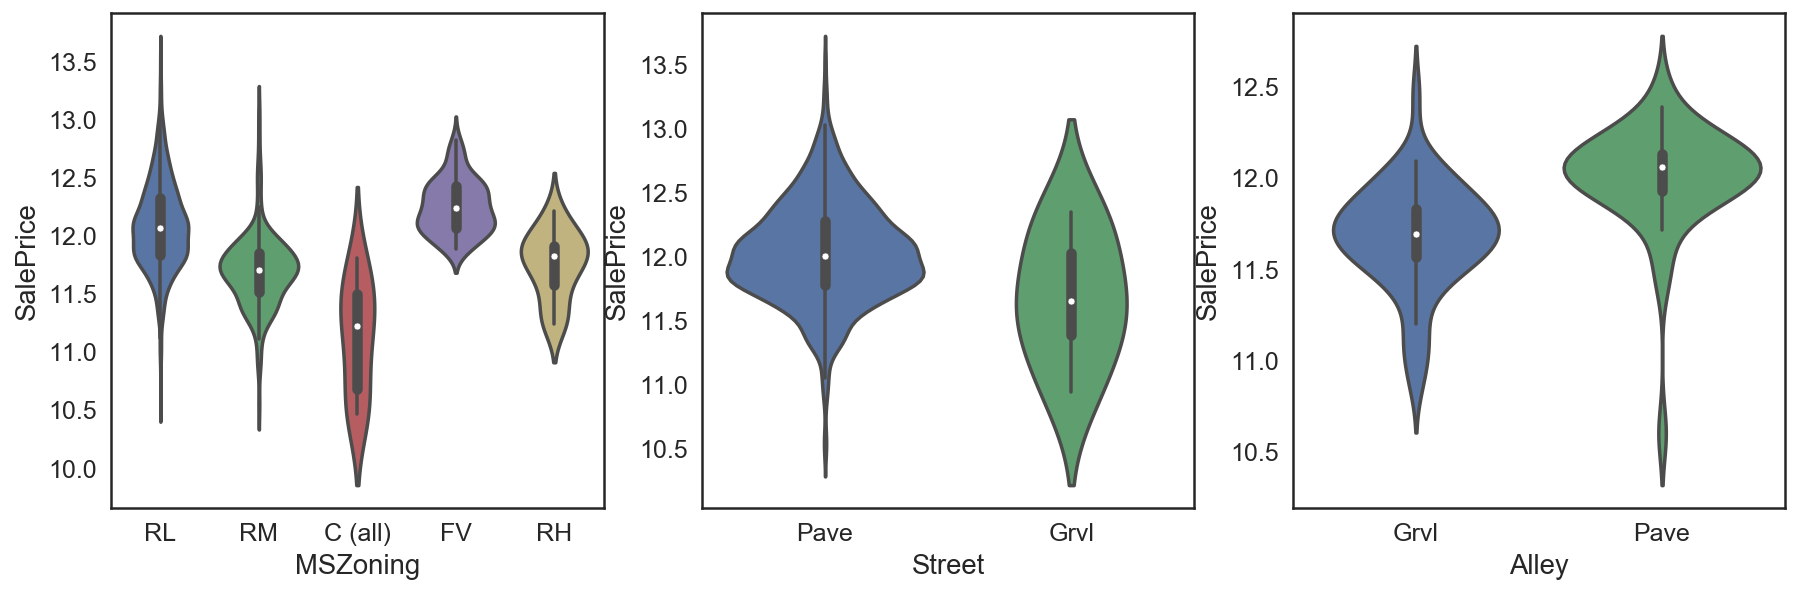

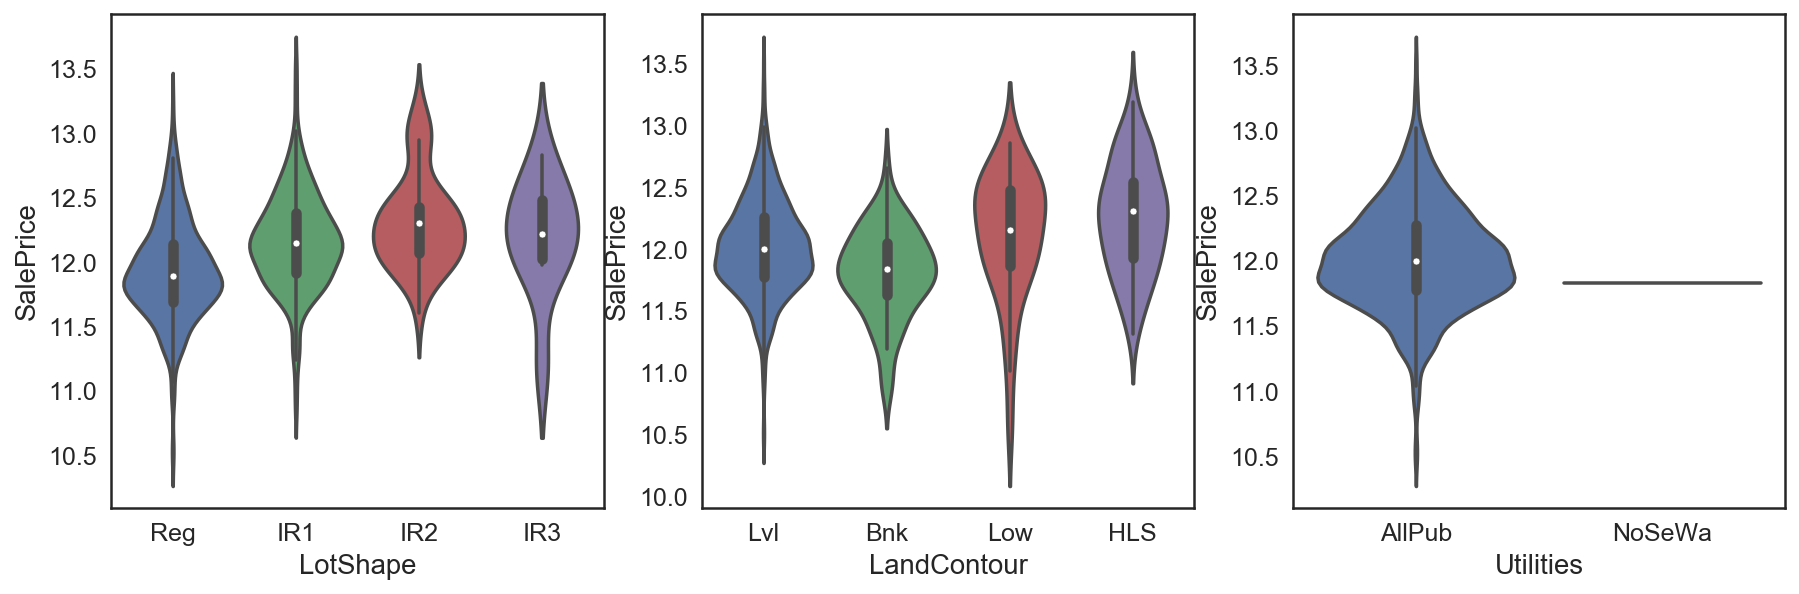

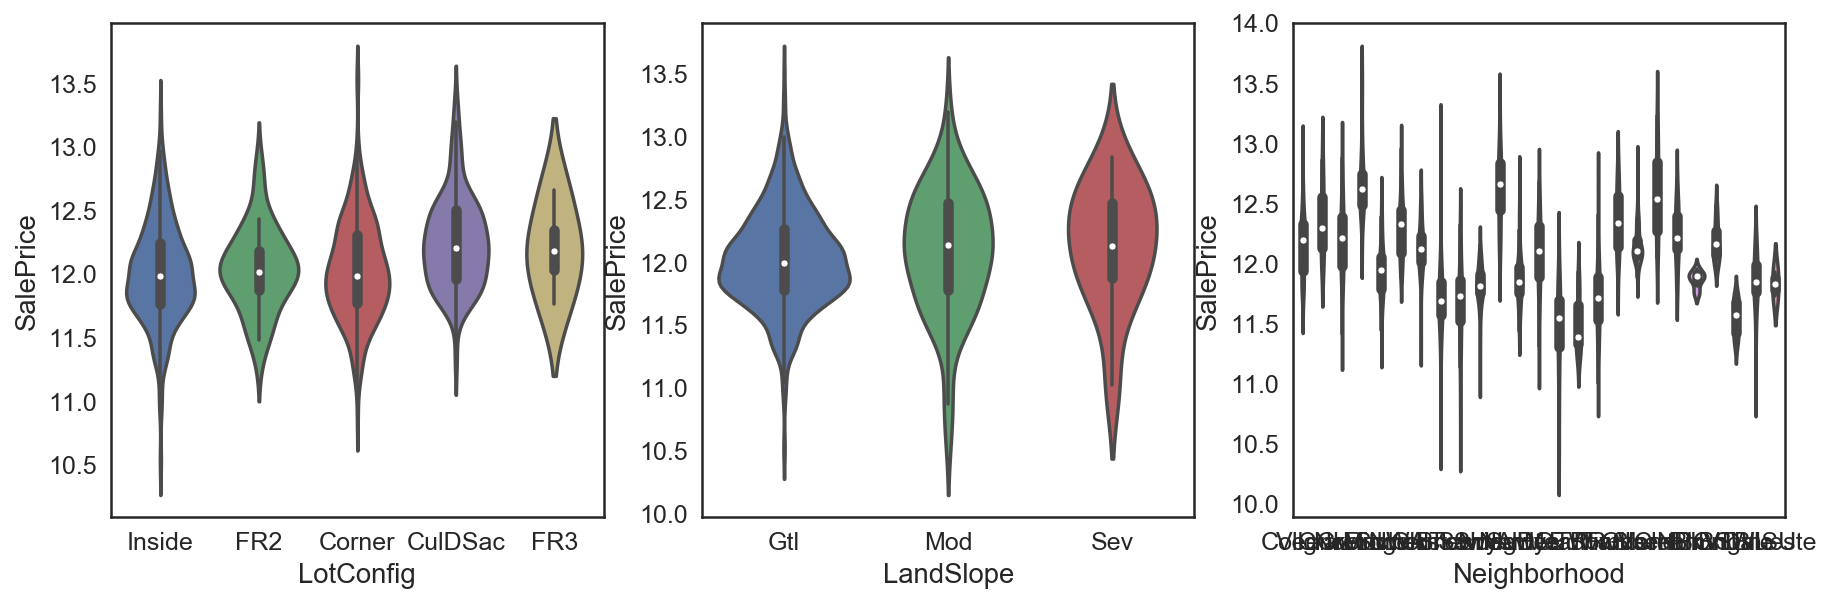

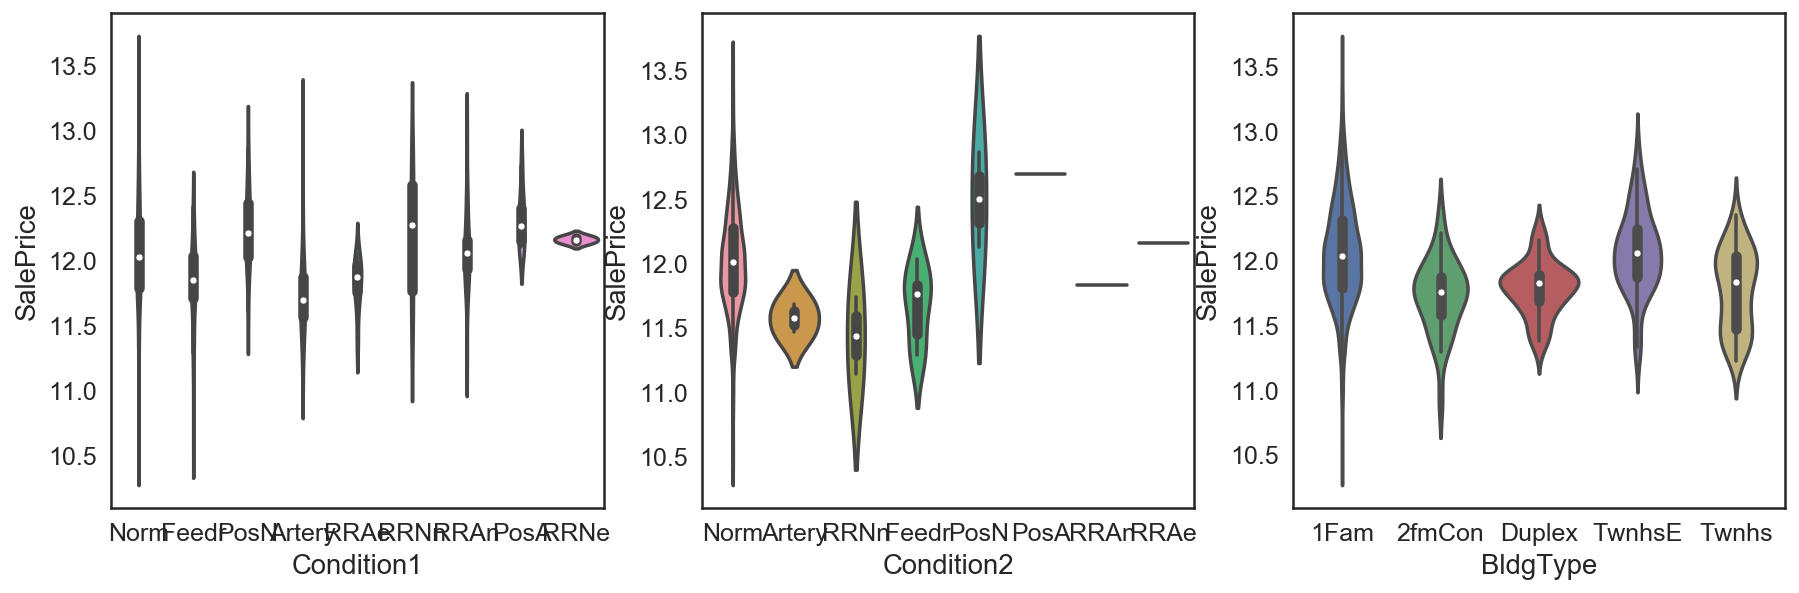

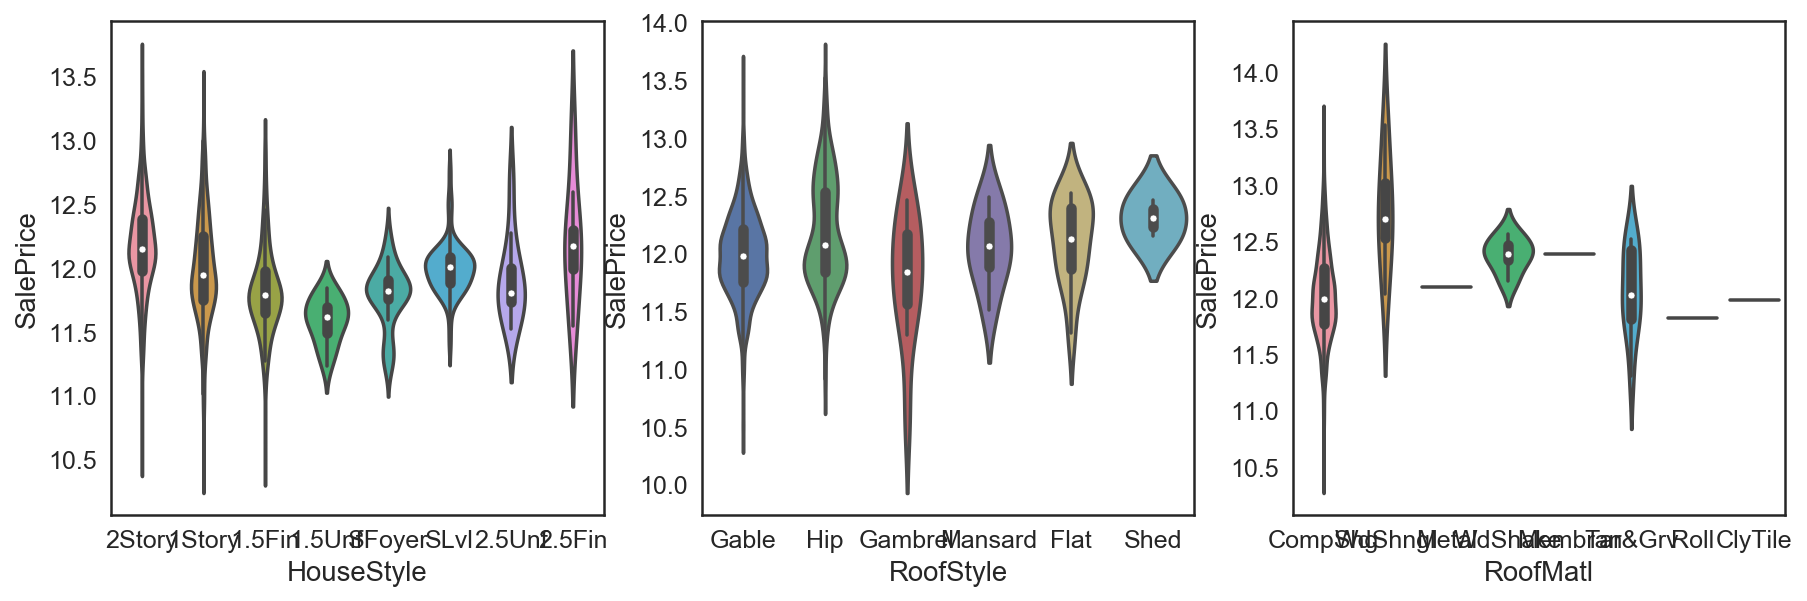

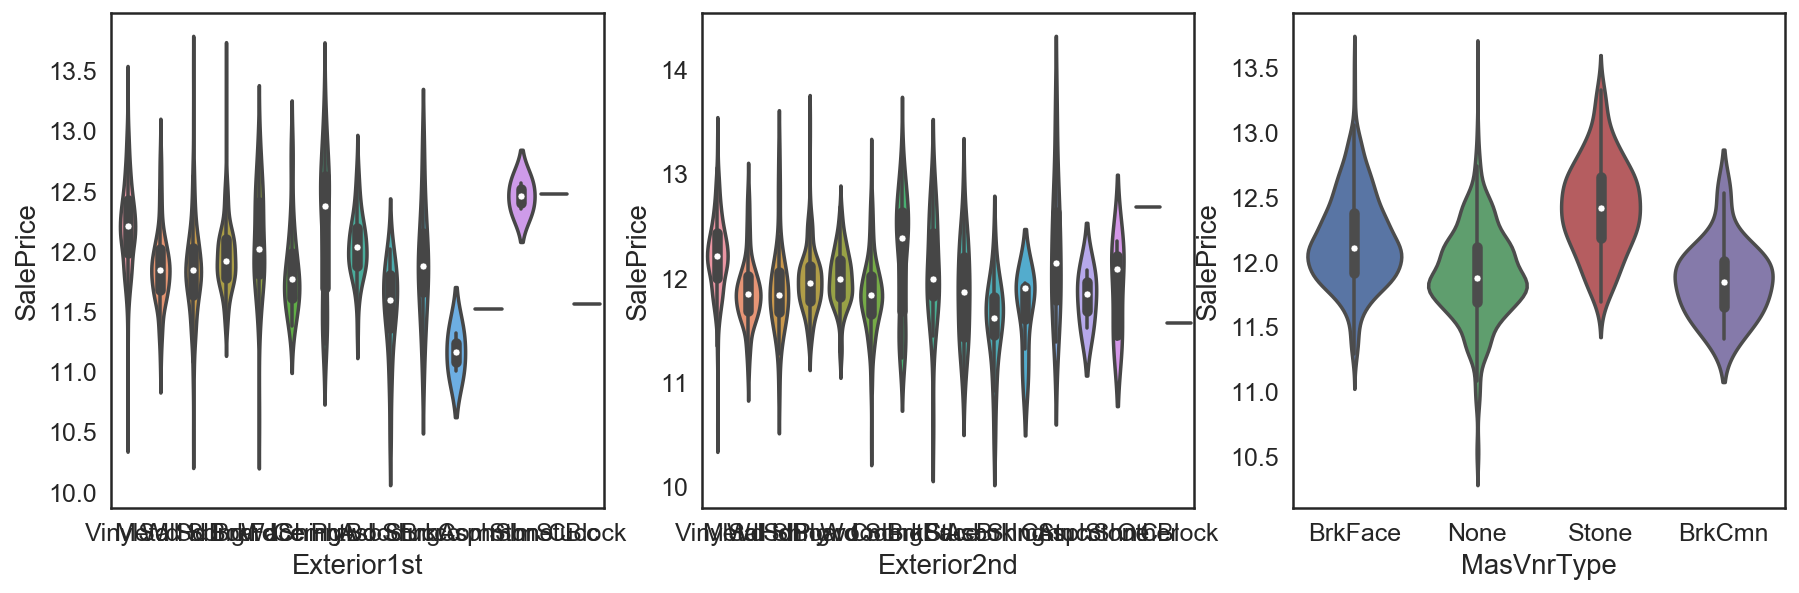

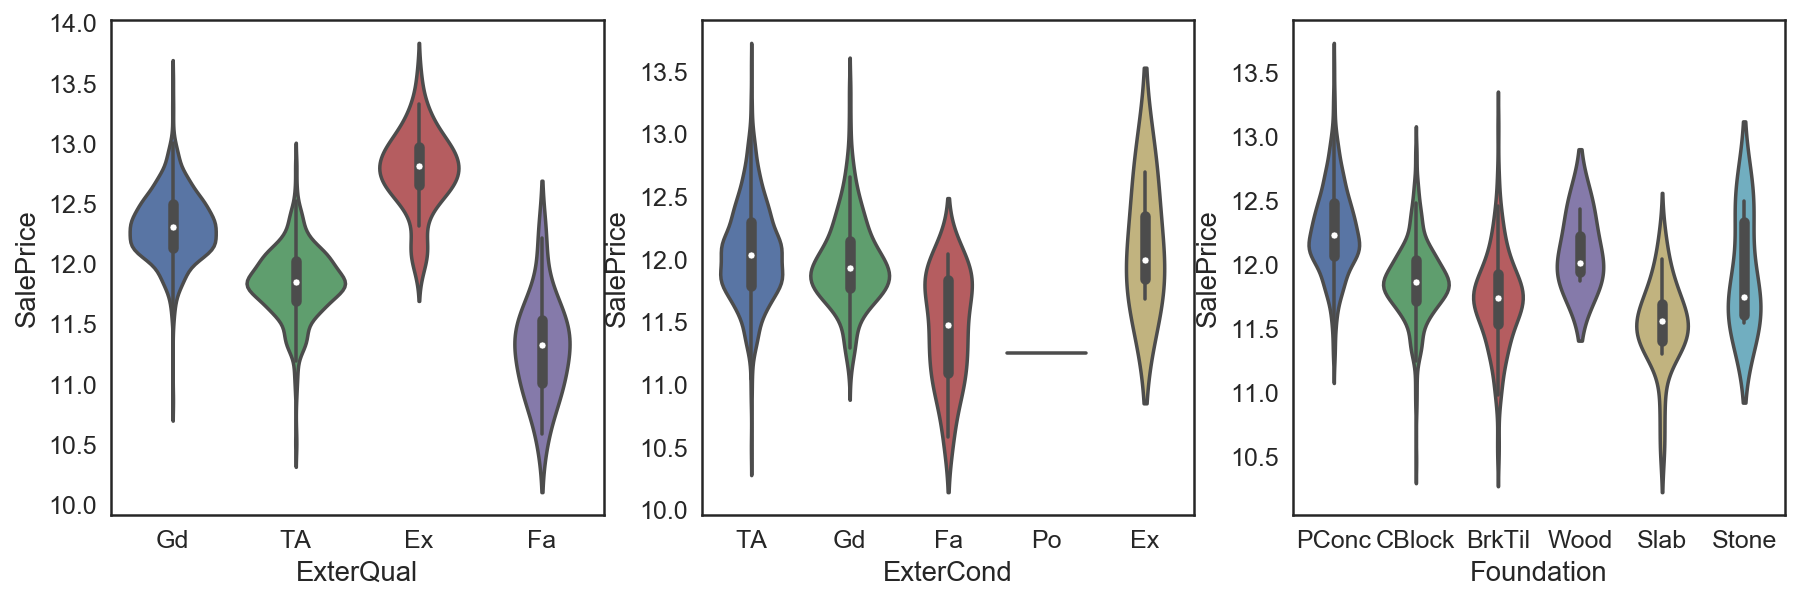

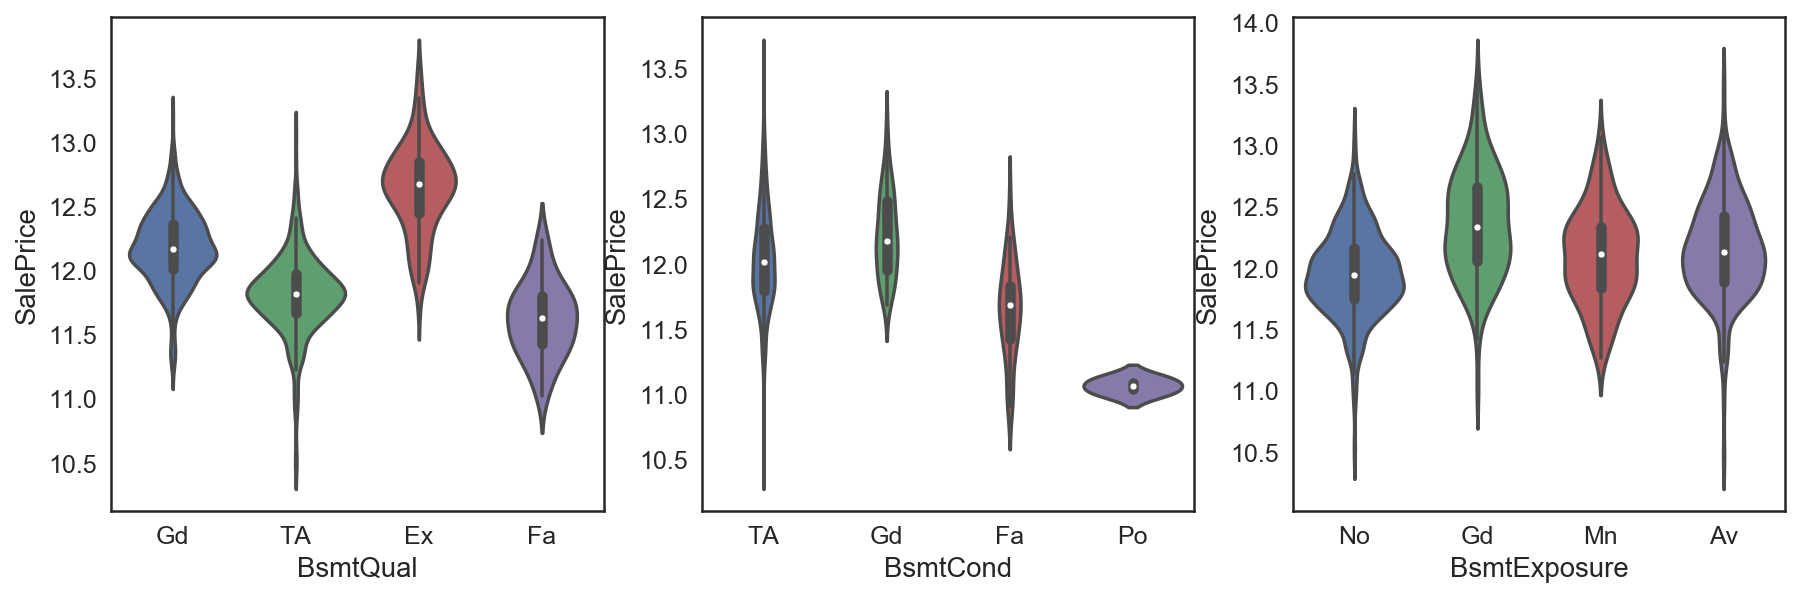

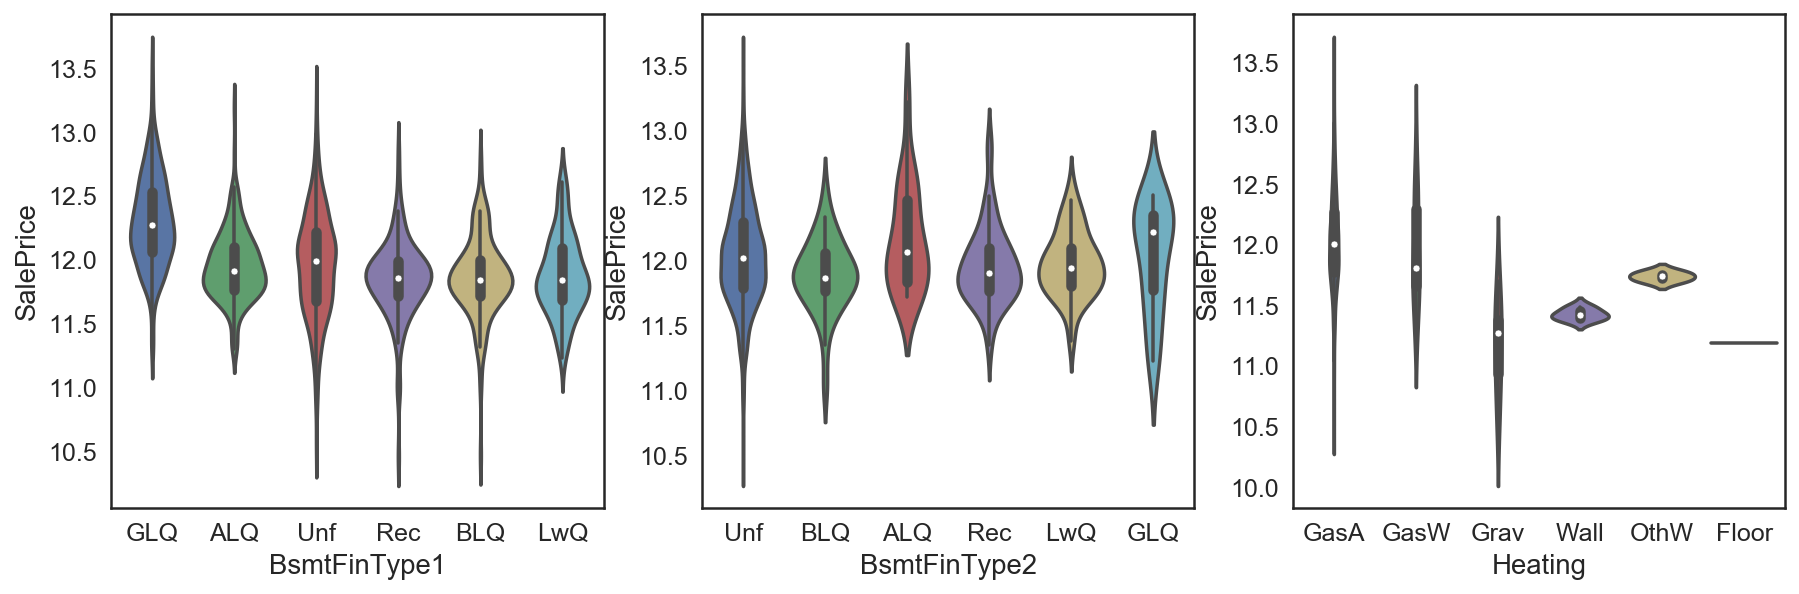

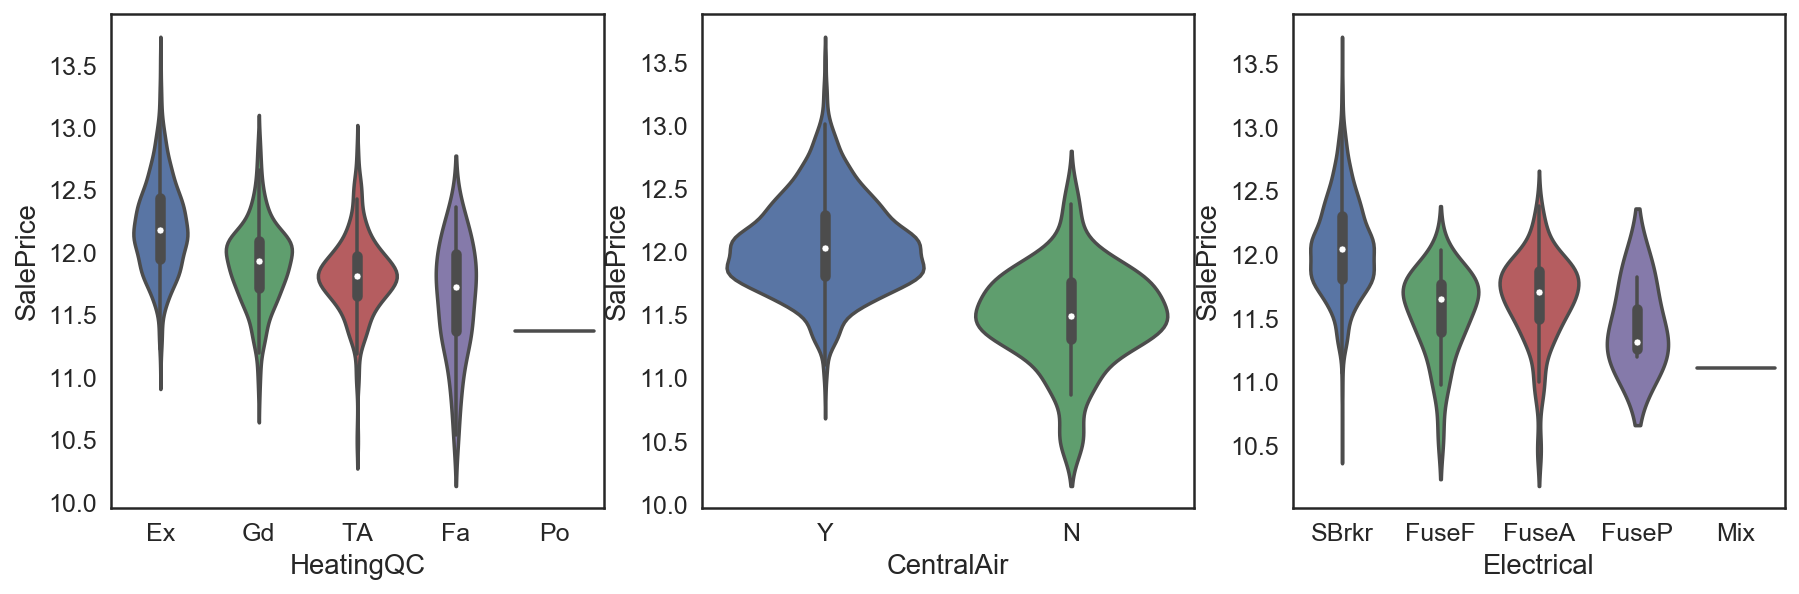

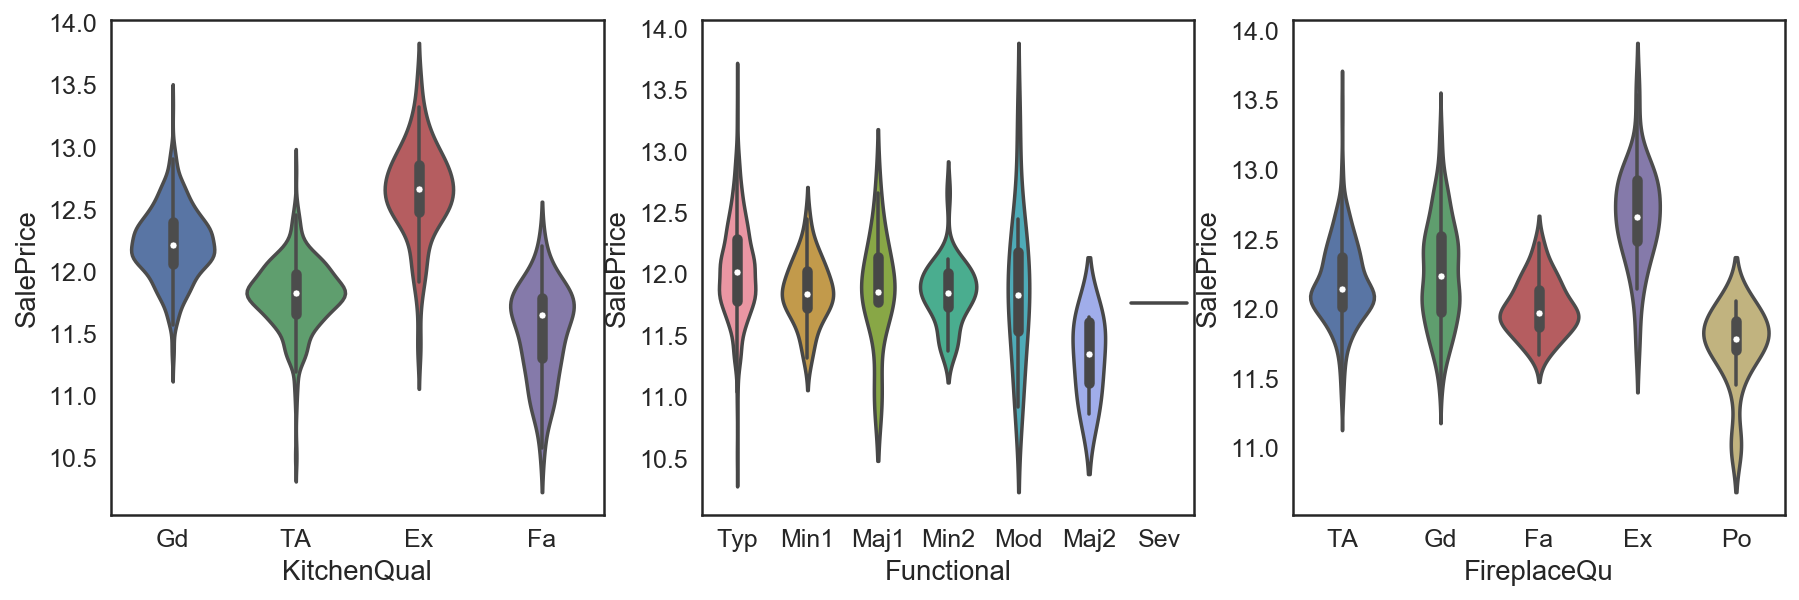

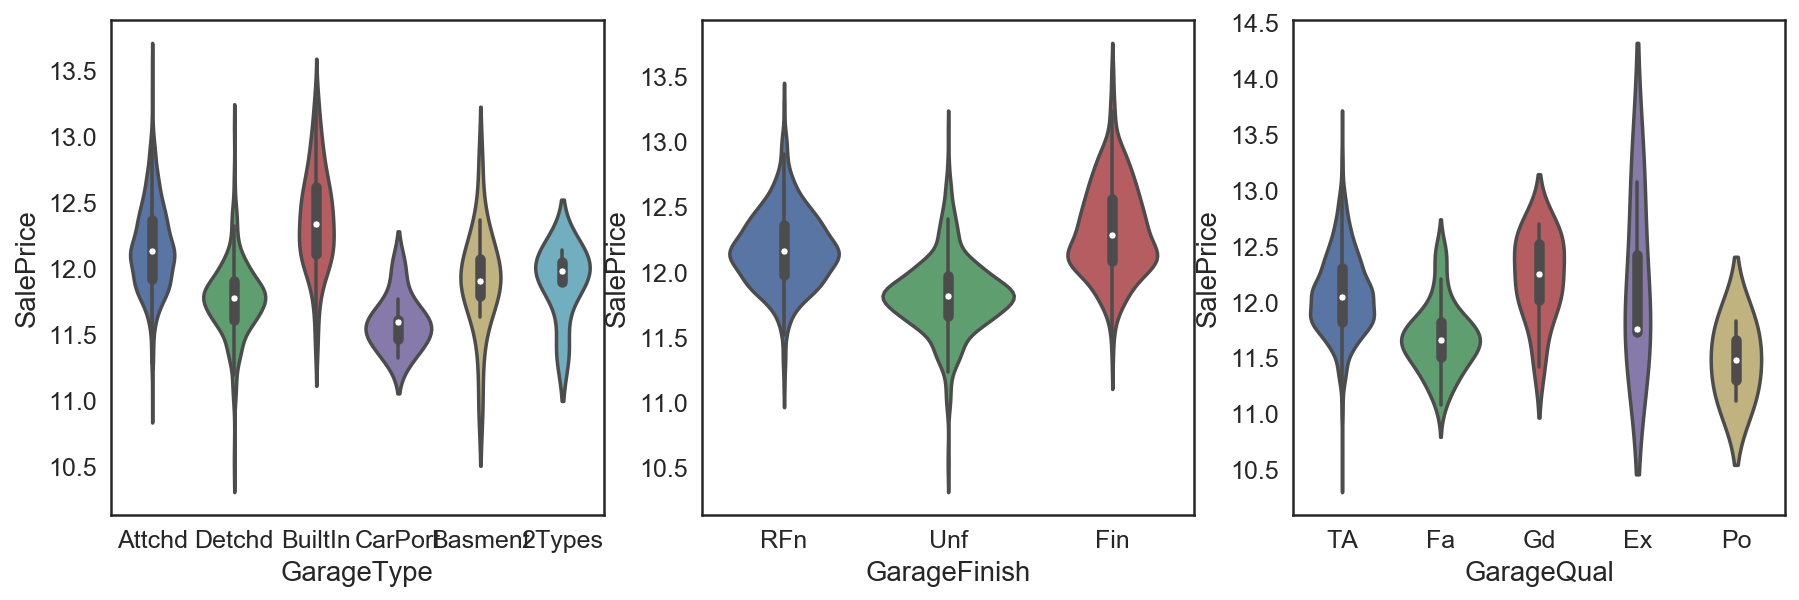

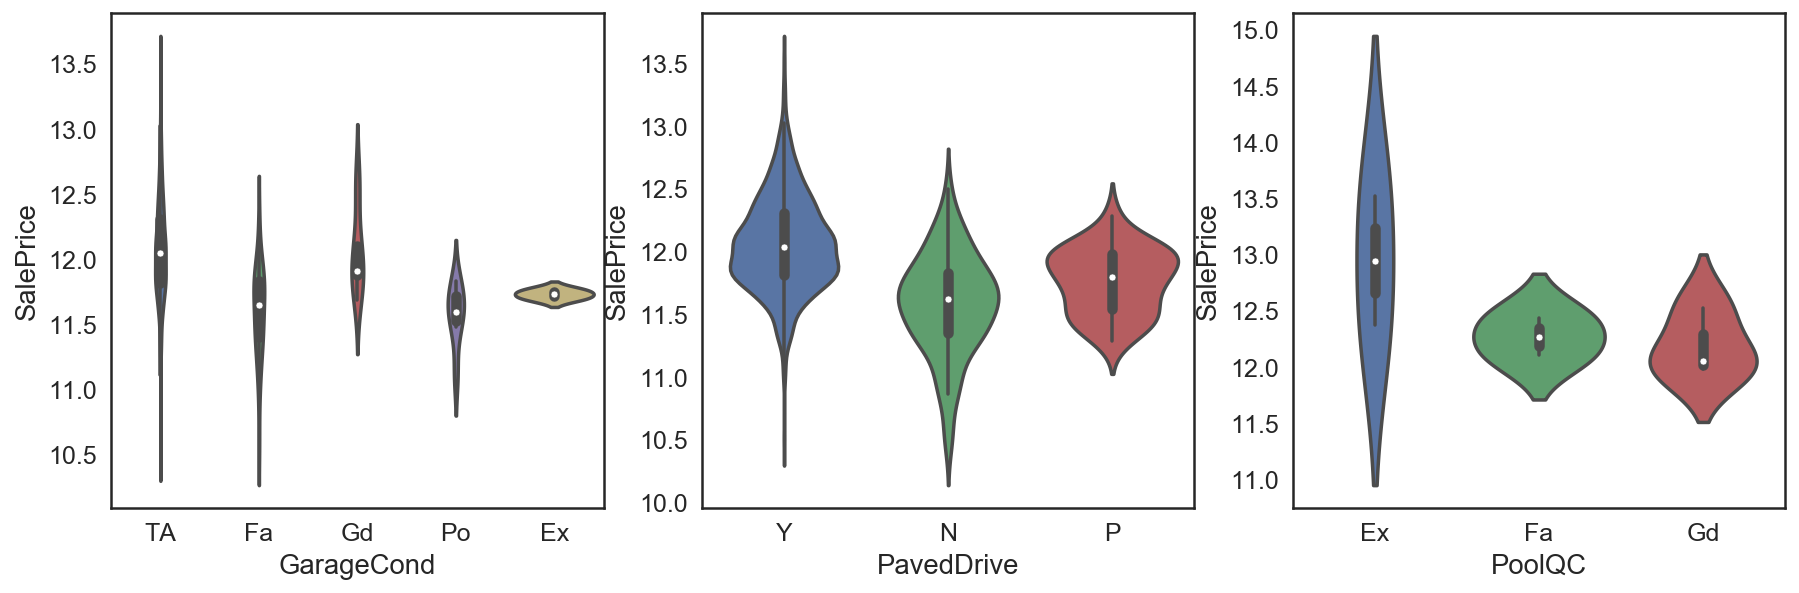

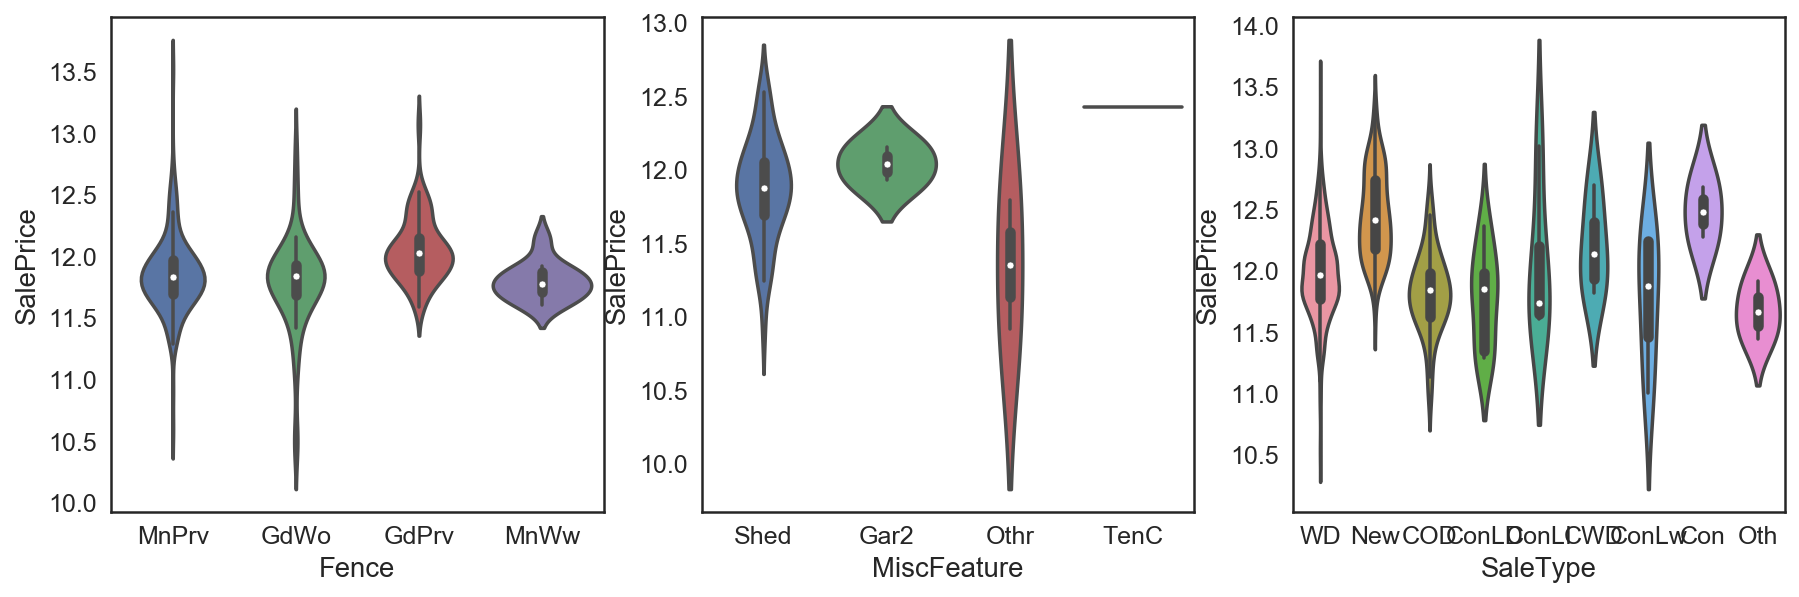

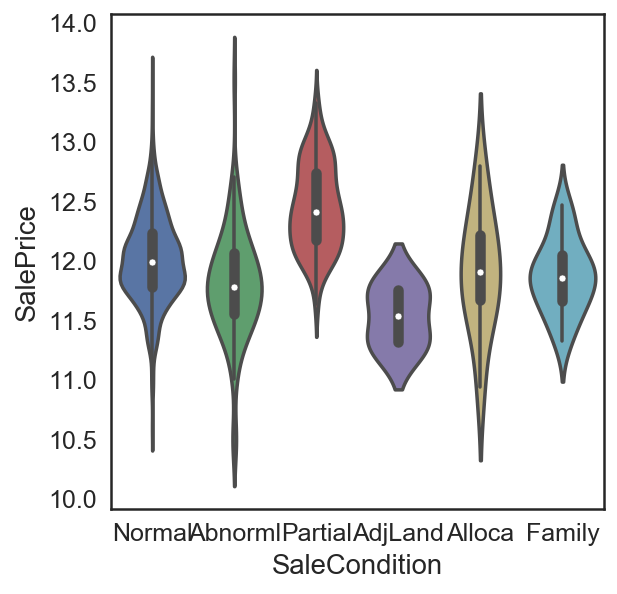

In [31]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df_train[categorical_features]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            #sns.boxplot(data=df_train, x=c, y='SalePrice', ax=ax2)
            sns.violinplot(data=df_train, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

绘制类别变量的抖动图。

KeyboardInterrupt: 

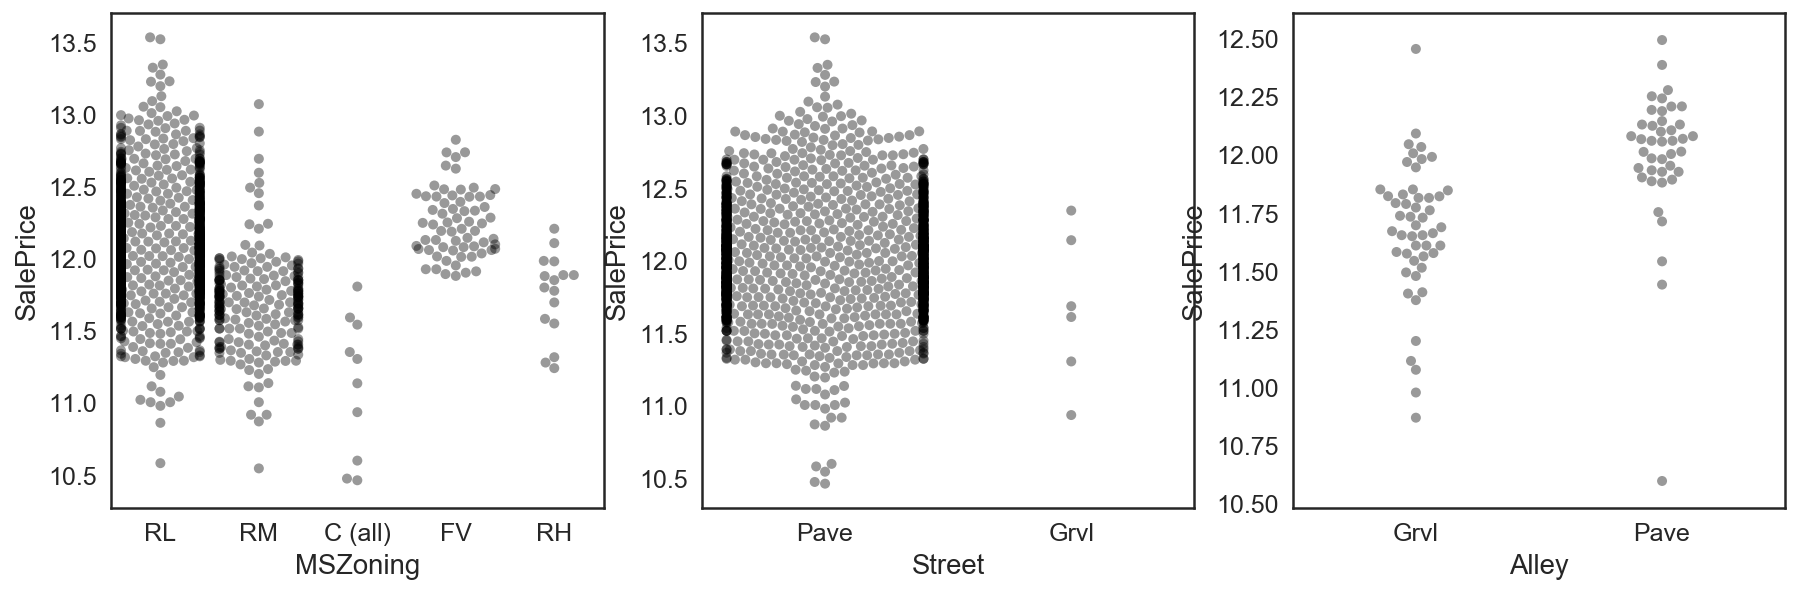

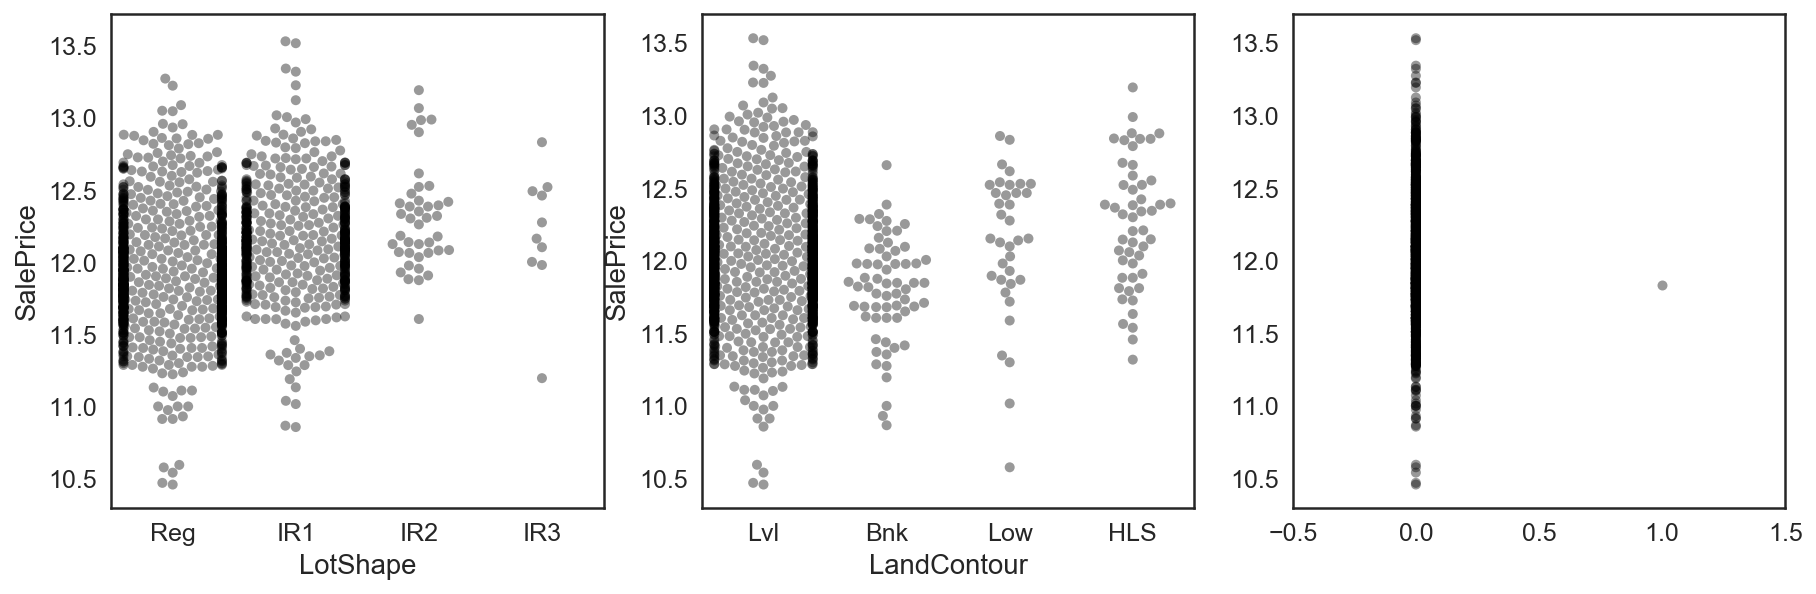

In [32]:
categorical_features = df_train.select_dtypes(include = ["object"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df_train[categorical_features]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            #sns.boxplot(data=df_train, x=c, y='SalePrice', ax=ax2)
            #sns.violinplot(data=df_train, x=c, y='SalePrice', ax=ax2)
            sns.swarmplot(data = df_train, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

We can see which variables have a large effect on SalePrice like PoolQC, KitchenQual, Condition1 and 2, Neighborhood, Alley, MSZoning 

### 1.3 Finding : Missing Values

下面统计一下缺失的数据个数以及比例。

In [33]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [34]:
percent = (df_train.isnull().sum() /
           df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
# PoolQC 缺失最多

Total   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageCond        81  0.055479
GarageType        81  0.055479
GarageYrBlt       81  0.055479
GarageFinish      81  0.055479
GarageQual        81  0.055479
BsmtExposure      38  0.026027
BsmtFinType2      38  0.026027
BsmtFinType1      37  0.025342
BsmtCond          37  0.025342
BsmtQual          37  0.025342
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
Electrical         1  0.000685
Utilities          0  0.000000
YearRemodAdd       0  0.000000
MSSubClass         0  0.000000
Foundation         0  0.000000
ExterCond          0  0.000000
ExterQual          0  0.000000
Exterior2nd        0  0.000000
Exterior1st        0  0.000000
RoofMatl           0  0.000000
RoofStyle          0  0.000000
YearBuilt          0  0.000000
...              ...       ...
GarageArea         0  0.000000
PavedDrive         0  0.000000
WoodDeckSF         0  0.000000
OpenPorchSF        0  0.000000
3SsnPorch          0  0.000000
BsmtUnfSF          0  0.000000
ScreenPorch        0  0.000000
PoolArea           0  0.000000
MiscVal            0  0.000000
MoSold             0  0.000000
YrSold             0  0.000000
SaleType           0  0.000000
Functional         0  0.000000
TotRmsAbvGrd       0  0.000000
KitchenQual        0  0.000000
KitchenAbvGr       0  0.000000
BedroomAbvGr       0  0.000000
HalfBath           0  0.000000
FullBath           0  0.000000
BsmtHalfBath       0  0.000000
BsmtFullBath       0  0.000000
GrLivArea          0  0.000000
LowQualFinSF       0  0.000000
2ndFlrSF           0  0.000000
1stFlrSF           0  0.000000
CentralAir         0  0.000000
SaleCondition      0  0.000000
Heating            0  0.000000
TotalBsmtSF        0  0.000000
Id                 0  0.000000

[81 rows x 2 columns]

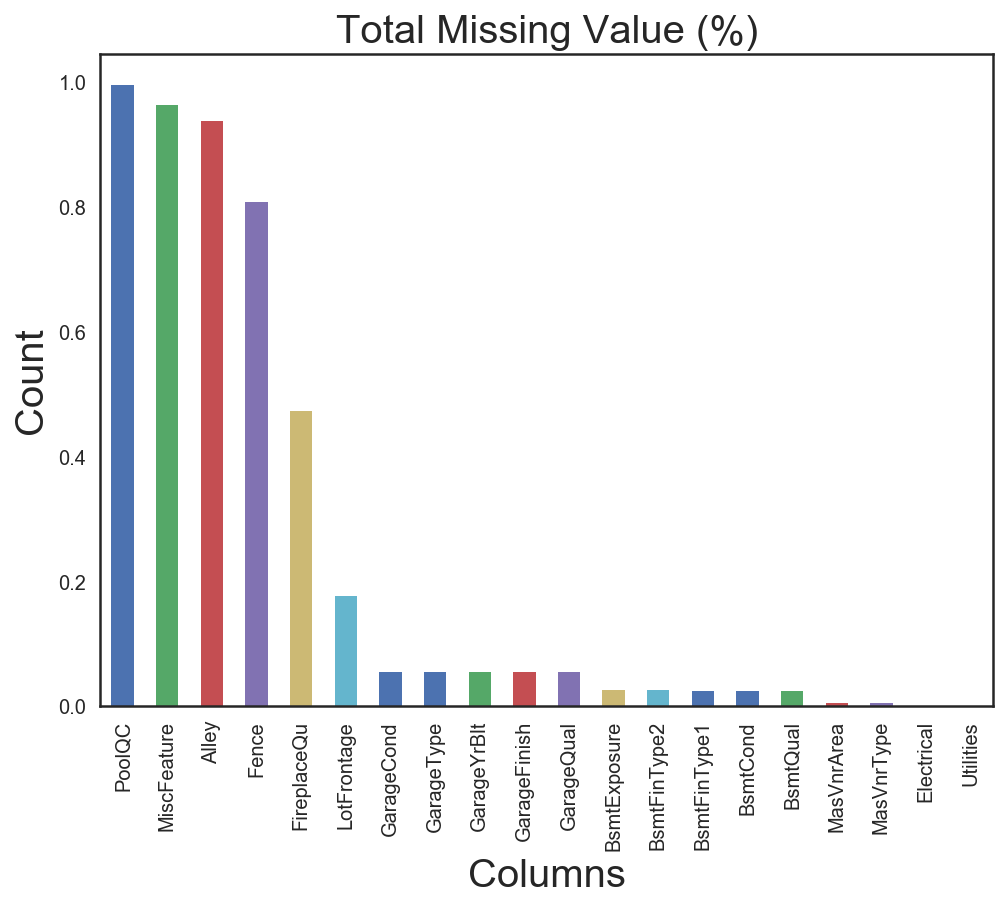

In [45]:
# 看一看缺失值差多少
# histogram
# missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize=(8, 6), fontsize=10)
plt.xlabel("Columns", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Total Missing Value (%)", fontsize=20)
plt.show()

we check 2 point. 
- Why was there a missing vales?
- How should I handle missing values?

However, the above process is not an easy process and requires much research.

### 1.4 Train vs Test

liwei 注：这一步是在看连续型变量训练数据和测试数据是否分布一致。

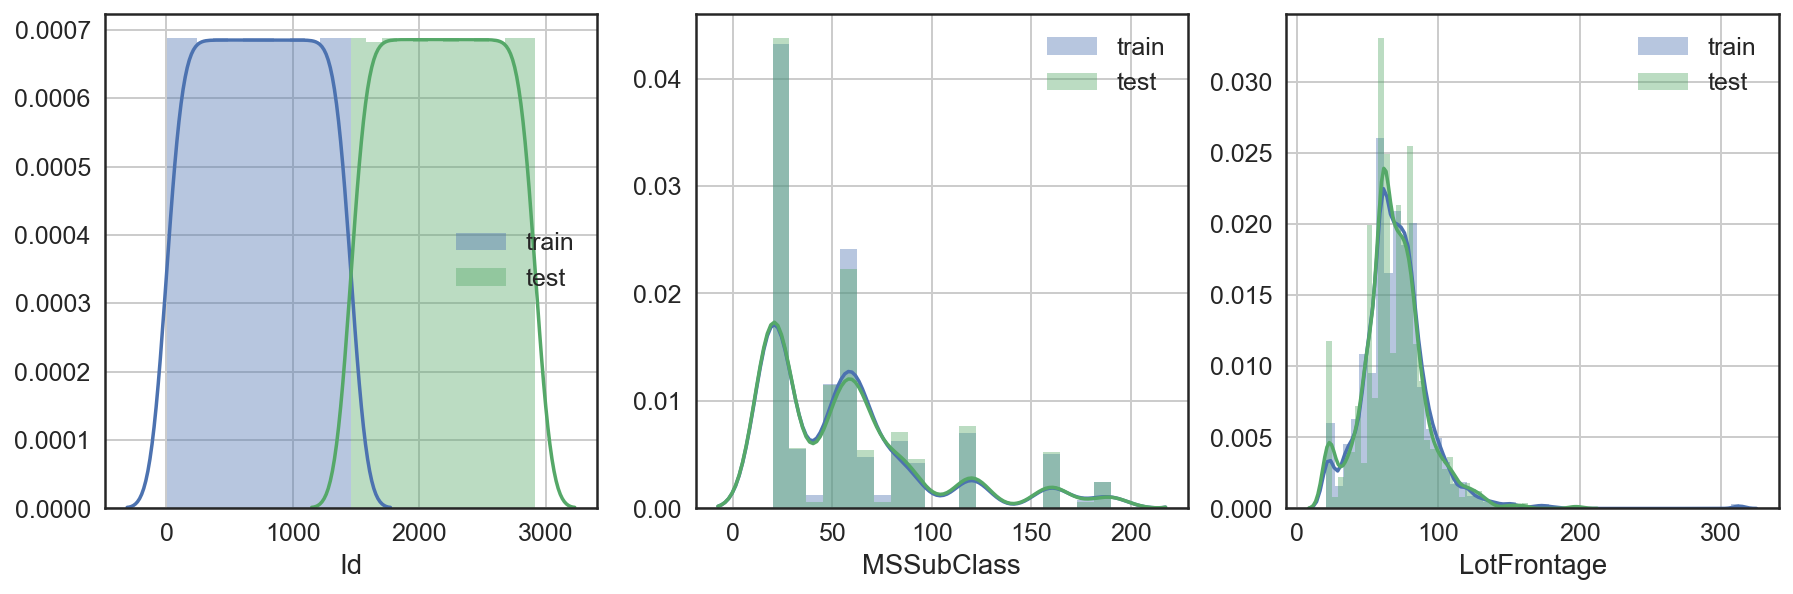

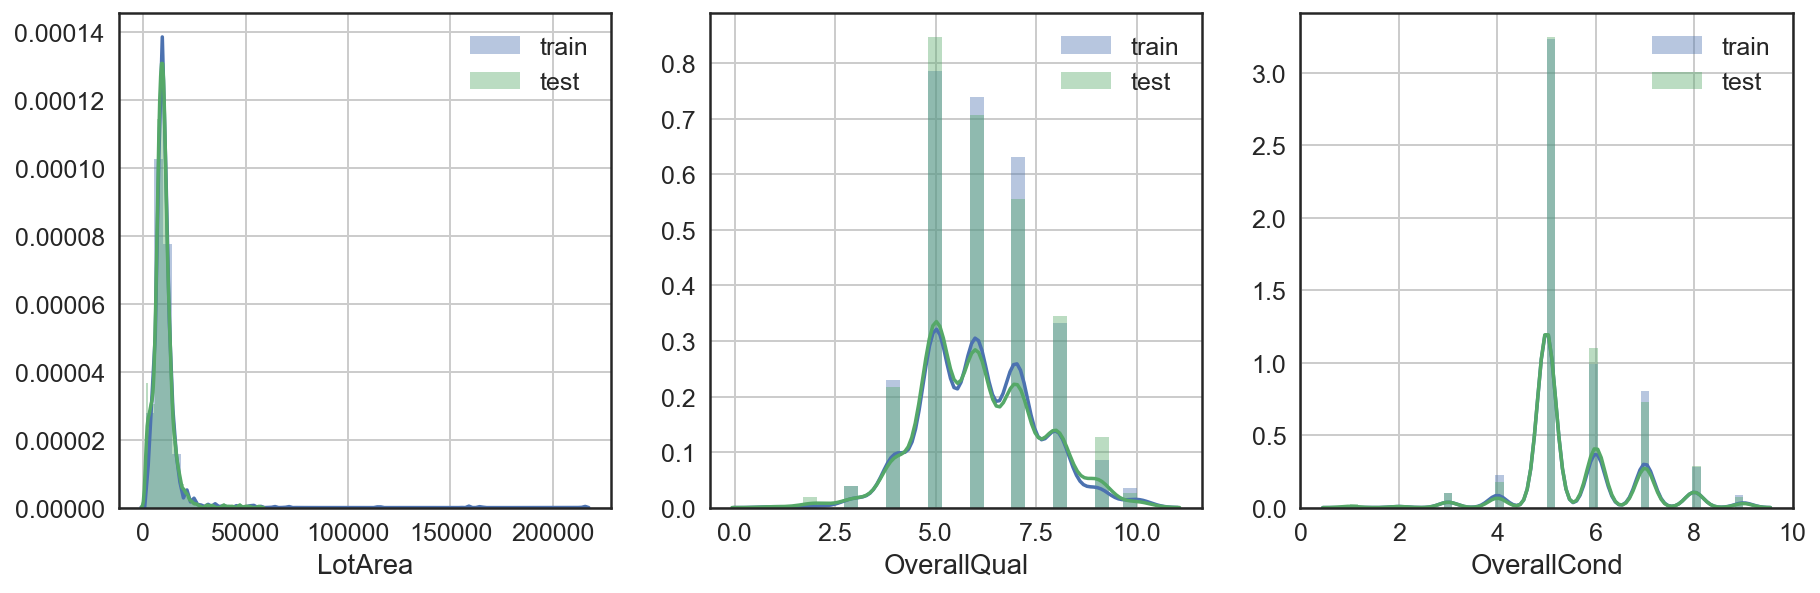

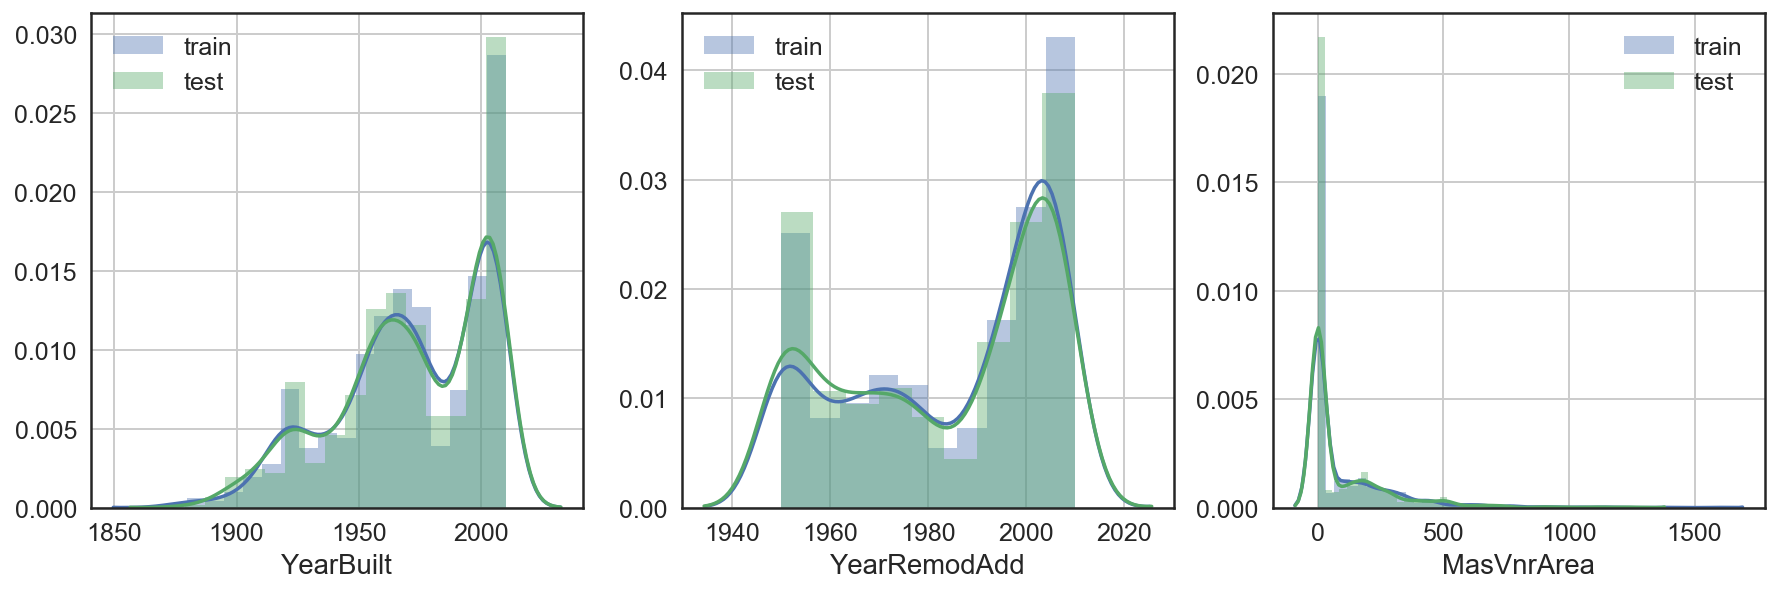

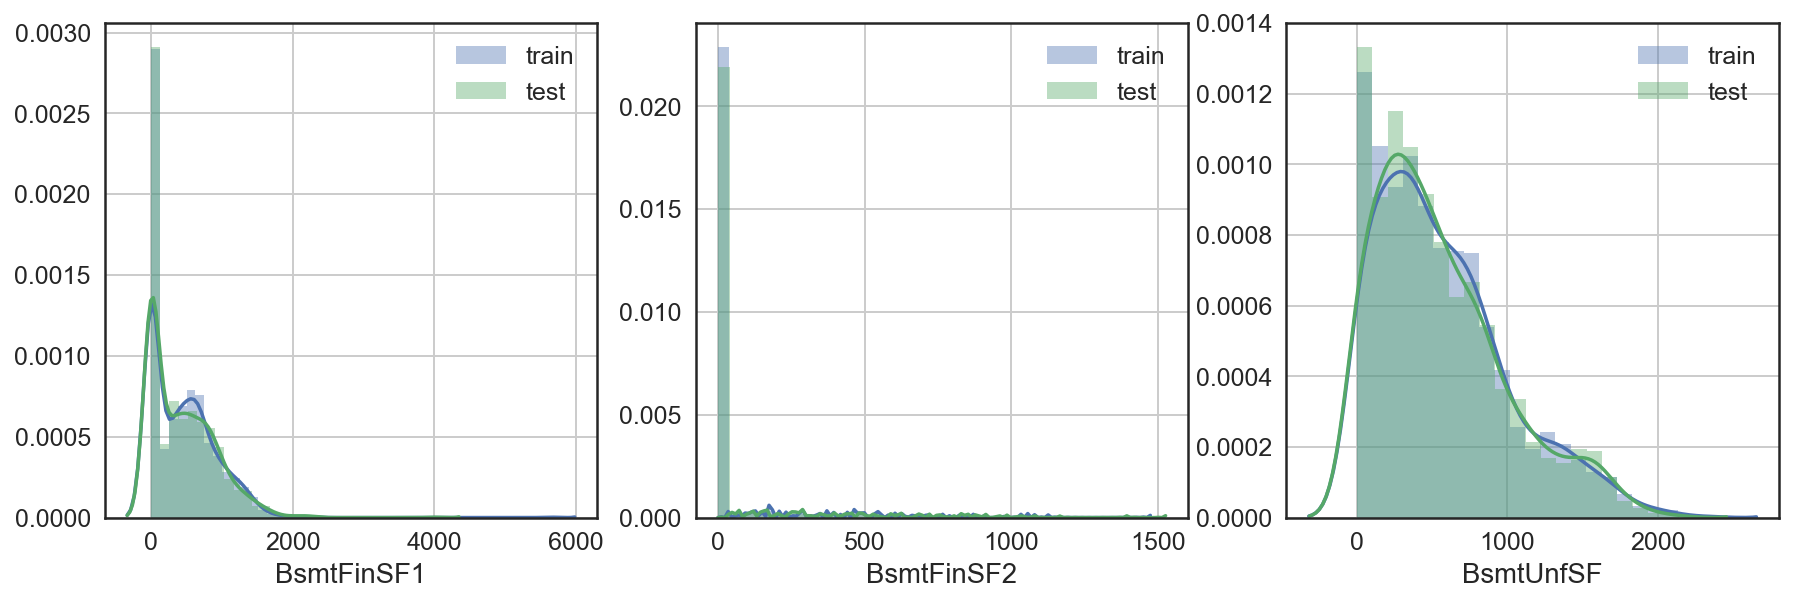

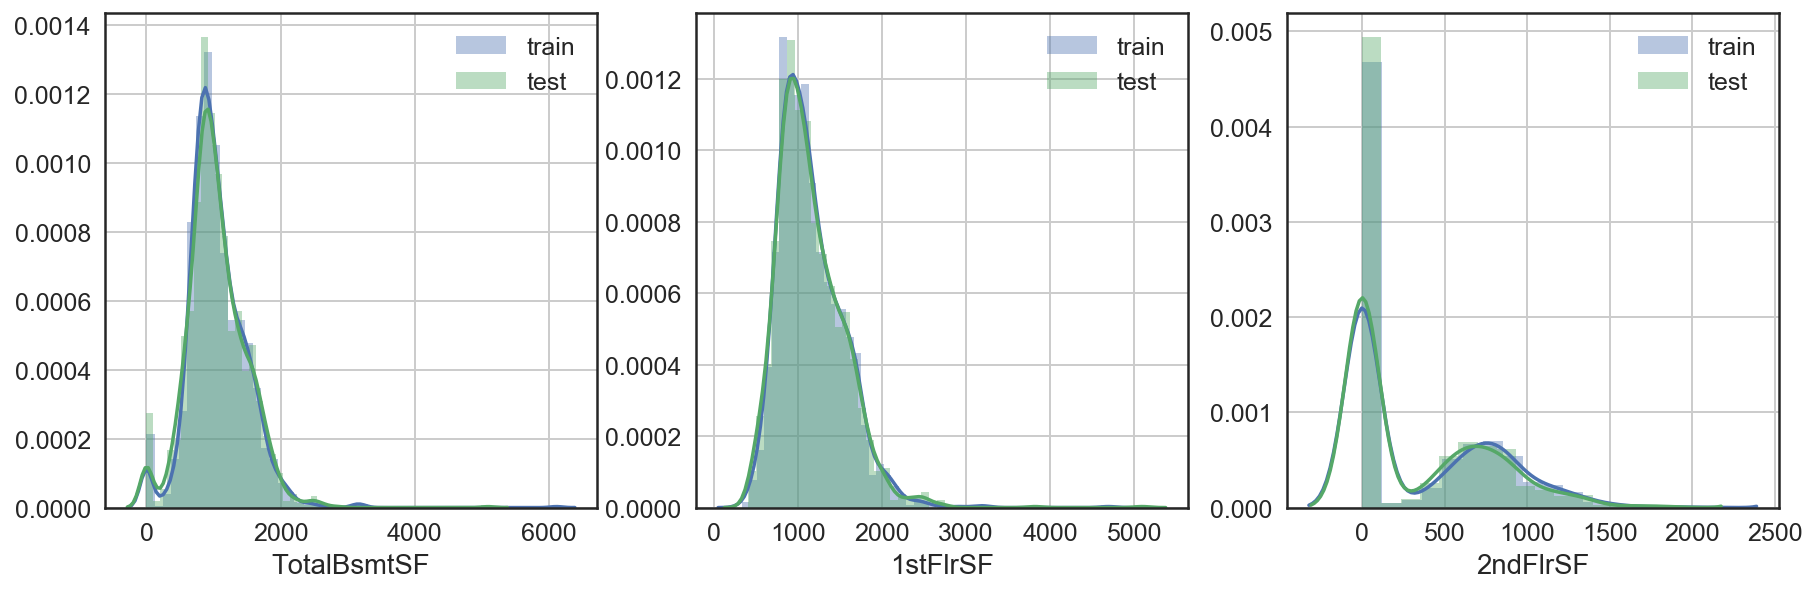

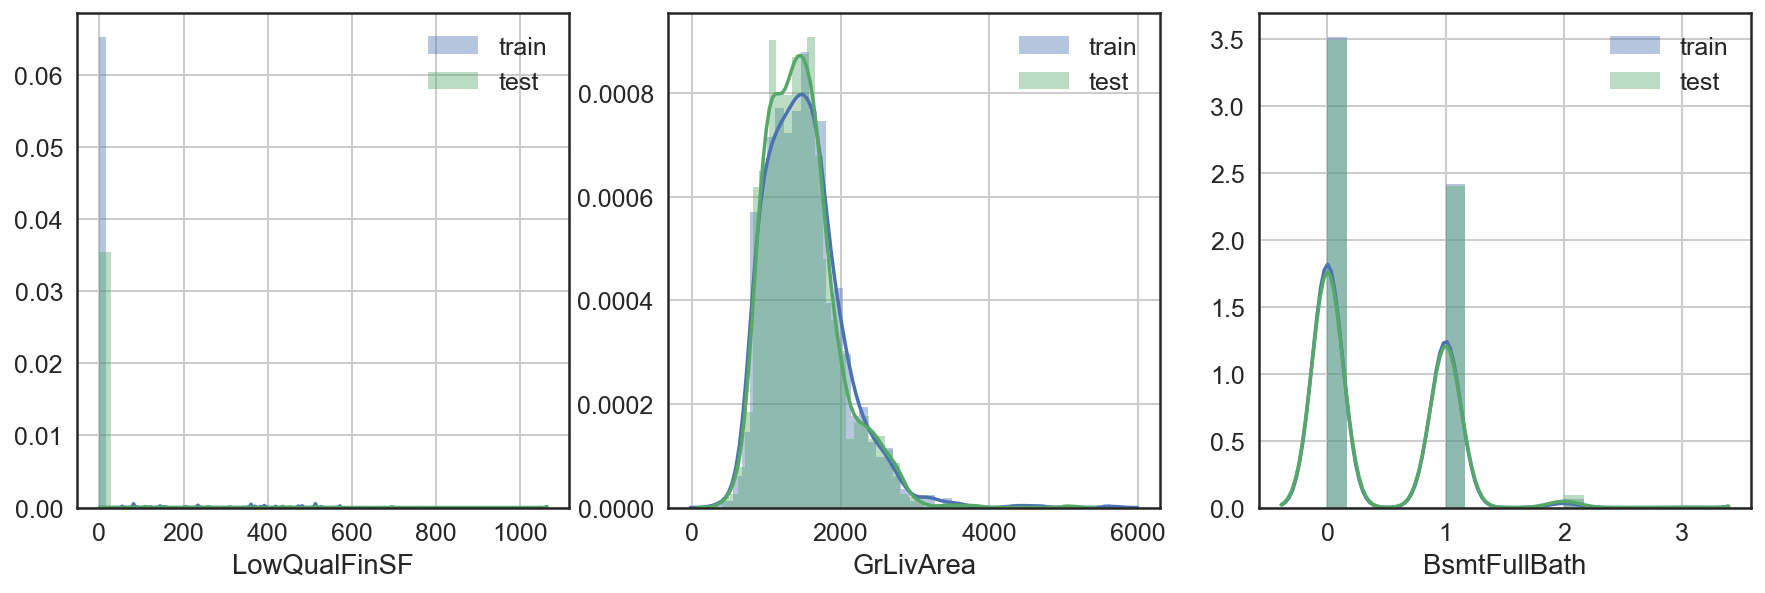

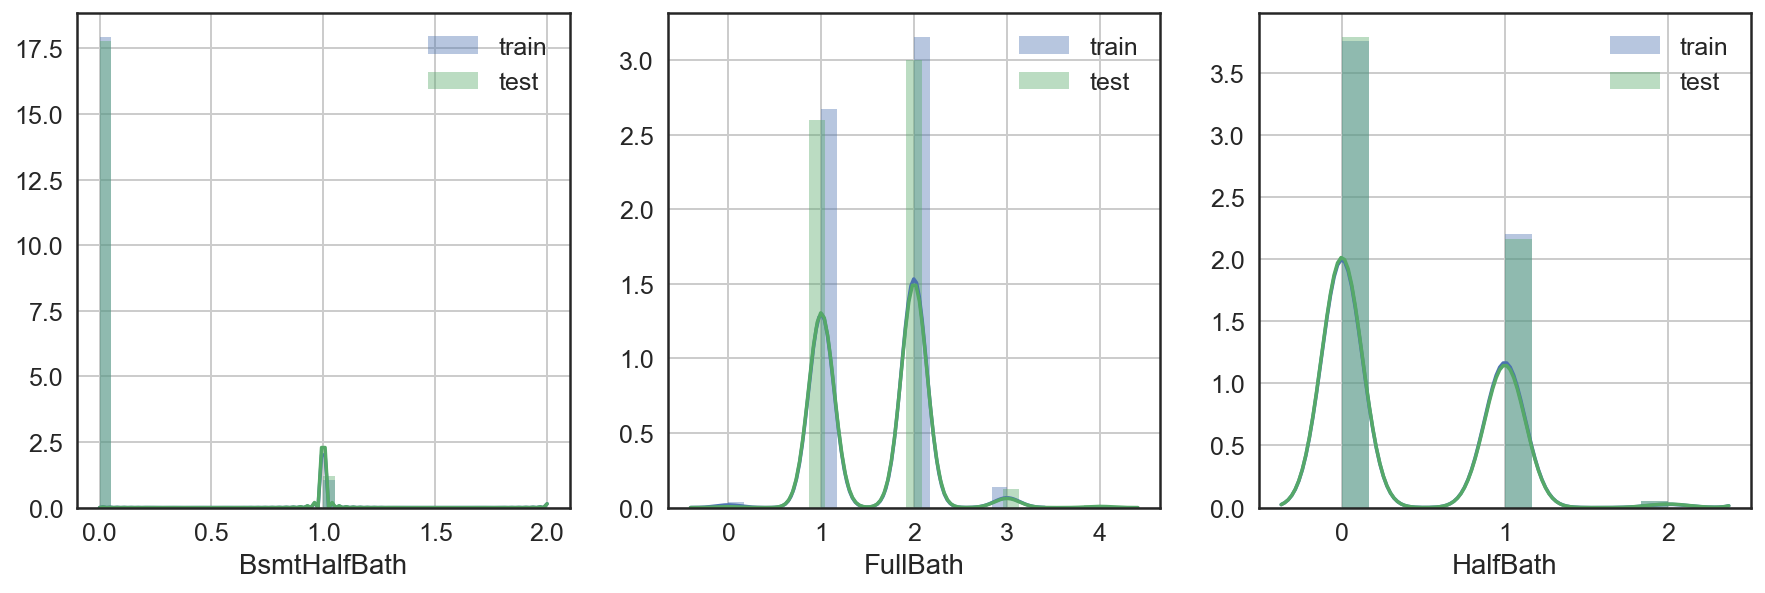

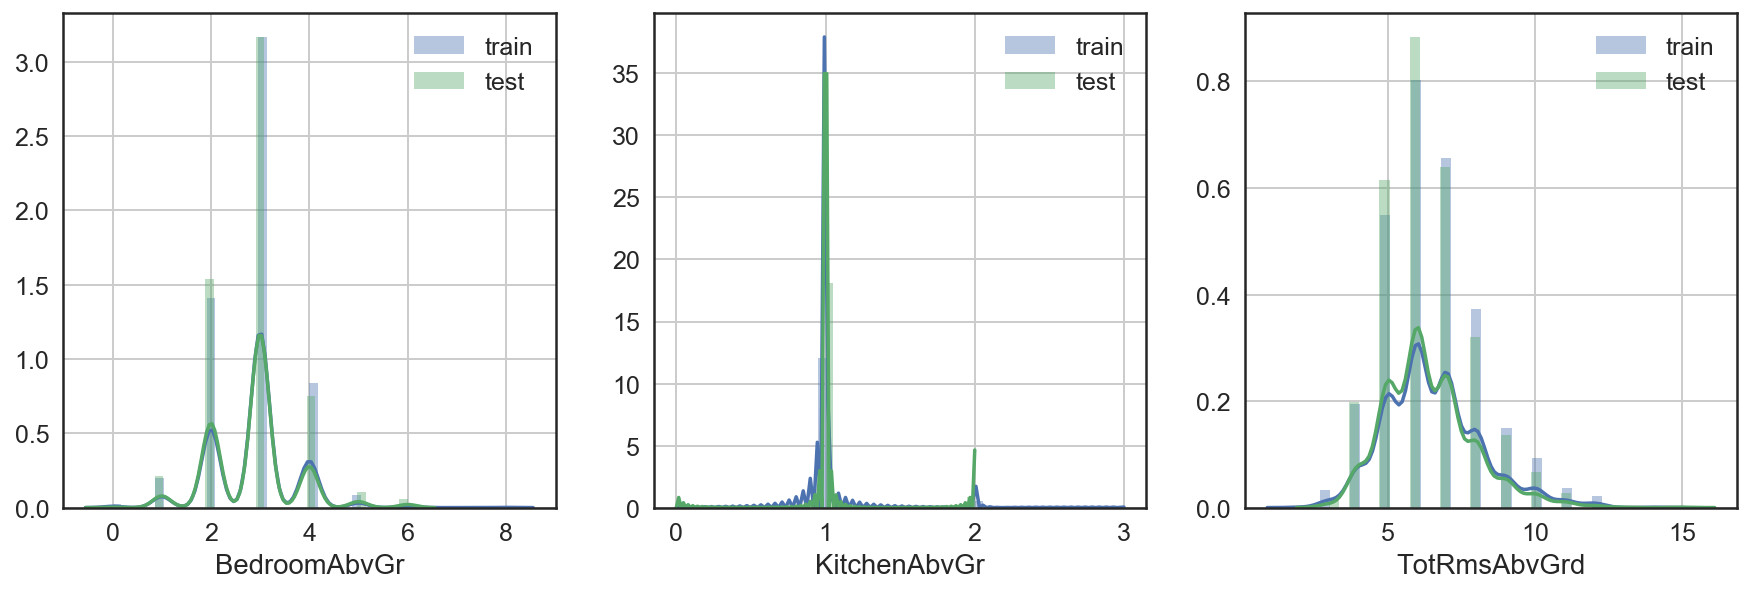

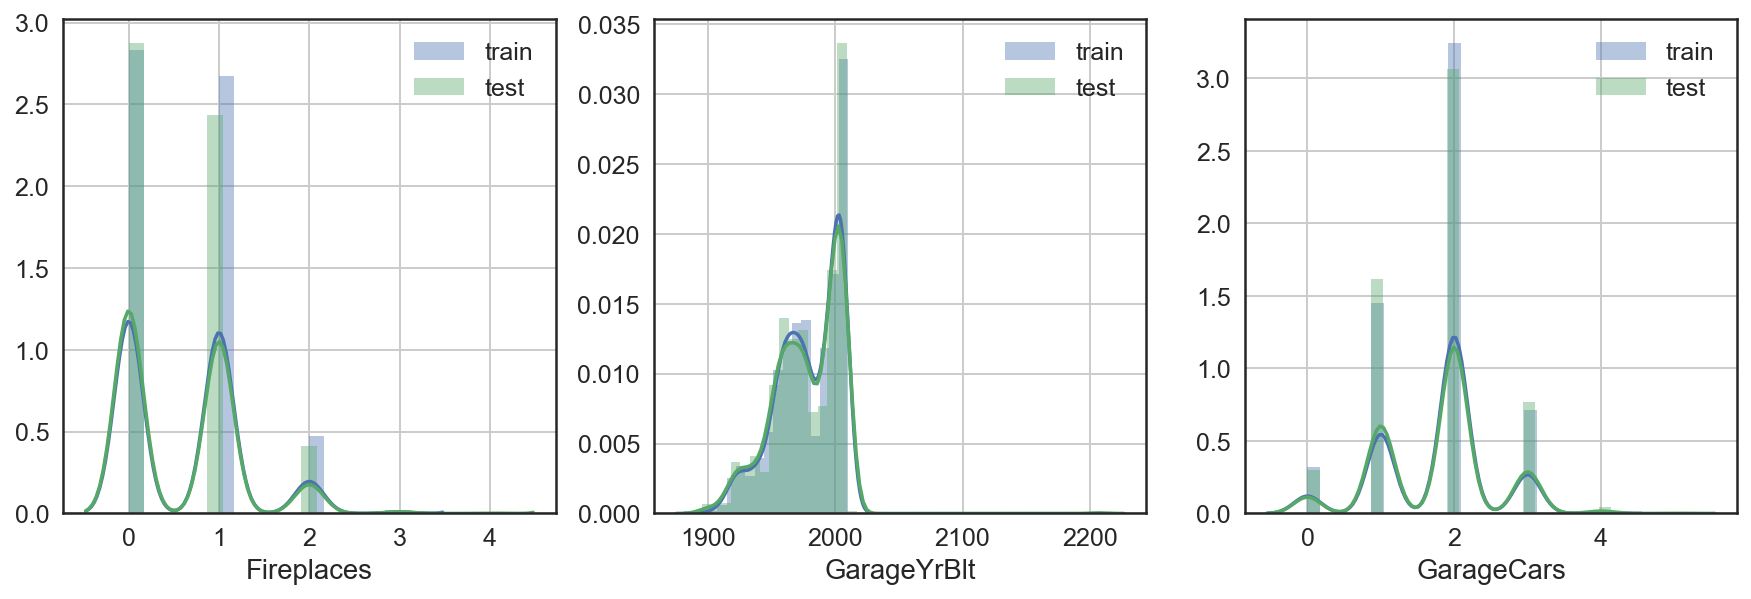

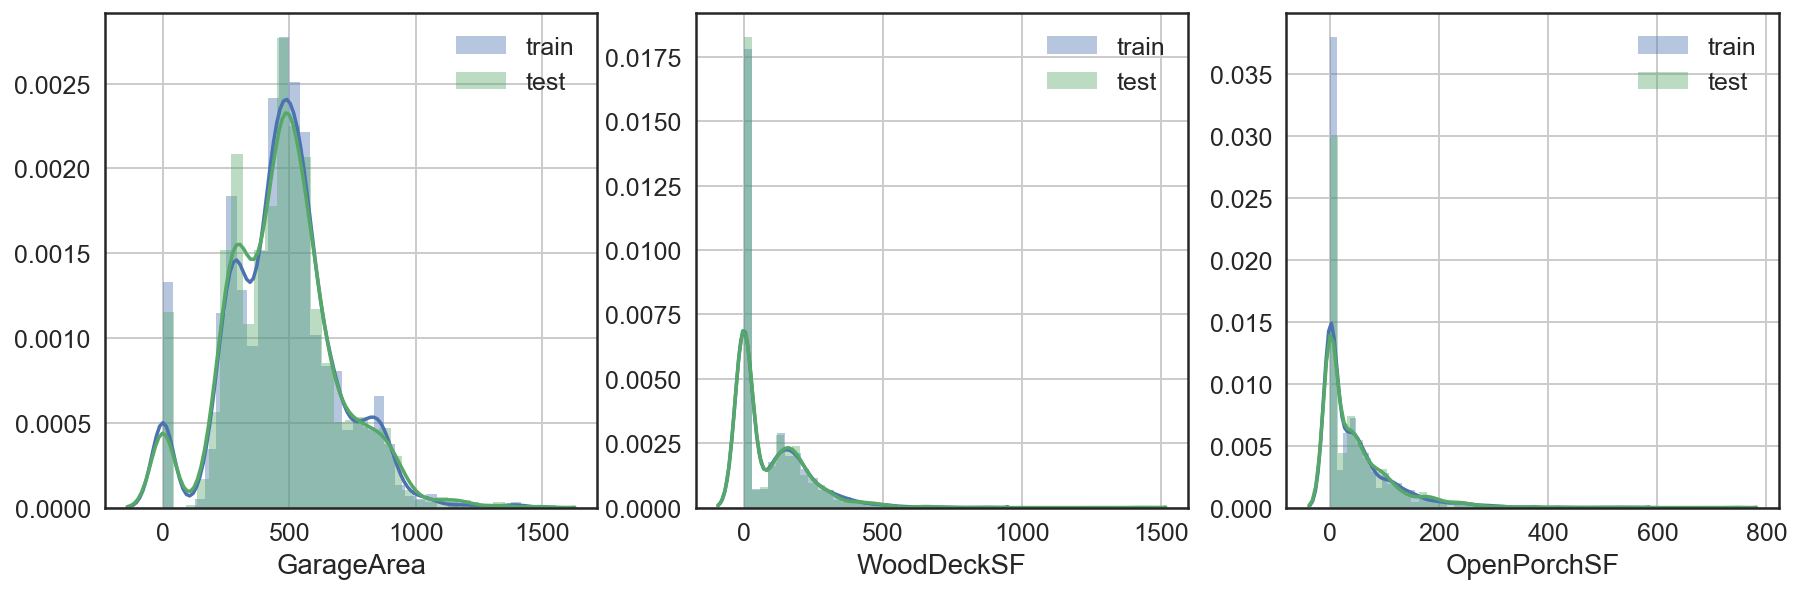

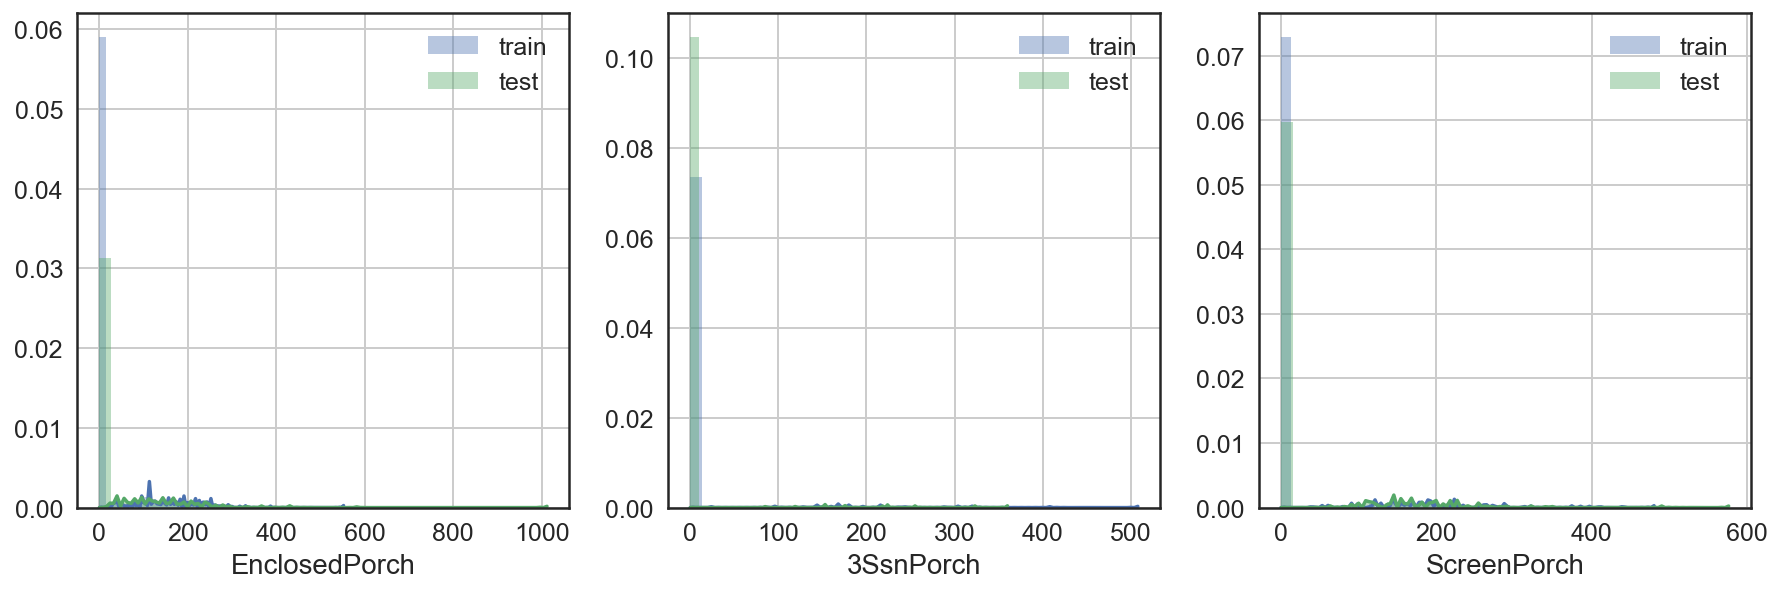

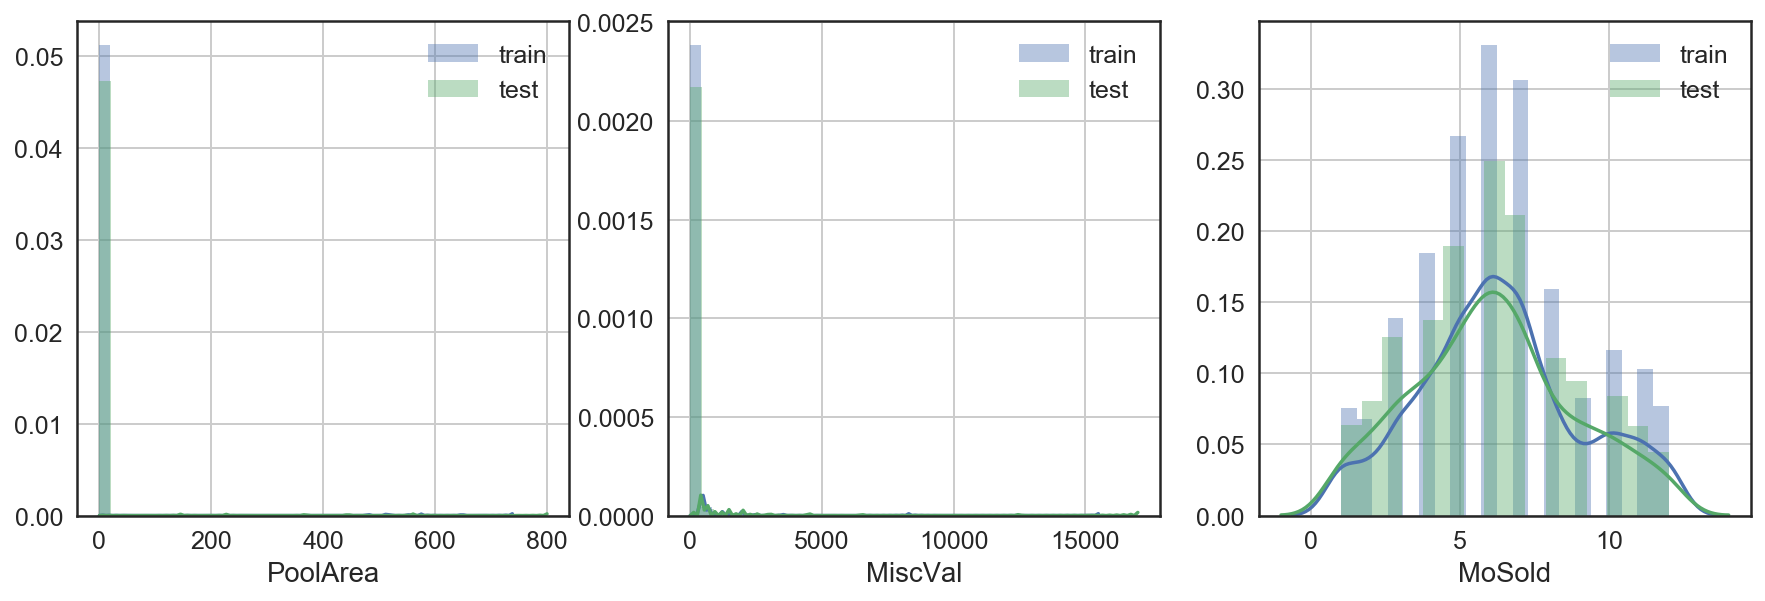

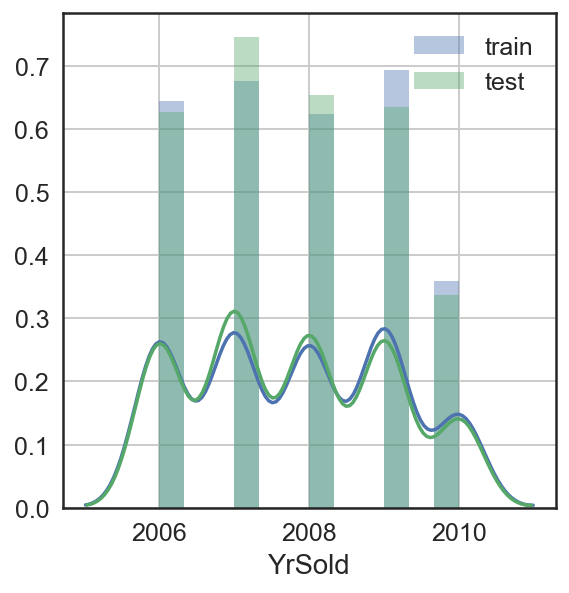

In [47]:
import warnings
warnings.filterwarnings('ignore')

Numeric = df_train.copy()
del Numeric['SalePrice']
Numeric_columns = Numeric.select_dtypes(include=["int64", "float64"]).columns

ix = 1
fig = plt.figure(figsize=(15, 10))
for c in list(Numeric_columns):
    if ix <= 3:
        ax2 = fig.add_subplot(2, 3, ix + 3)
        sns.distplot(df_train[c].dropna())
        sns.distplot(df_test[c].dropna())
        plt.legend(['train', 'test'])
        plt.grid()
    ix = ix + 1
    if ix == 4:
        fig = plt.figure(figsize=(15, 10))
        ix = 1
del Numeric

almost they have similiar distribution between train and test

## 2. Preprocessing
### 2.1 Data Cleaning : Outliers 处理离群点

In fact, it is difficult to judge whether it is an outlier or not by only the above information. And since the number of data is as small as 1400, the removal of outlier affects the model greatly. The easiest way to do this is to remove the values we thought were outliers and to see if the leader board score (LB) and cross validation score (CV) were going up.

Through such a process, I decided on outliers below.

In [37]:
# Deleting outliers
df_train = df_train[df_train['Id'] != 692][df_train['Id'] != 1183]

# drop outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 12.5)].index)
df_train = df_train.drop(df_train[(df_train['LotArea'] > 150000)].index)
df_train = df_train.drop(df_train[(df_train['GarageArea'] > 1200) & (df_train['SalePrice'] < 12.5)].index)

### 2.1 Data Cleaning : Missing values 处理缺失数据
I refer to the following kernel. [Jared Wang Easy prediction using lightgbm model
](https://www.kaggle.com/jens0306/easy-prediction-using-lightgbm-model)

Text(0.5, 1.0, 'Total Missing Value (%)')

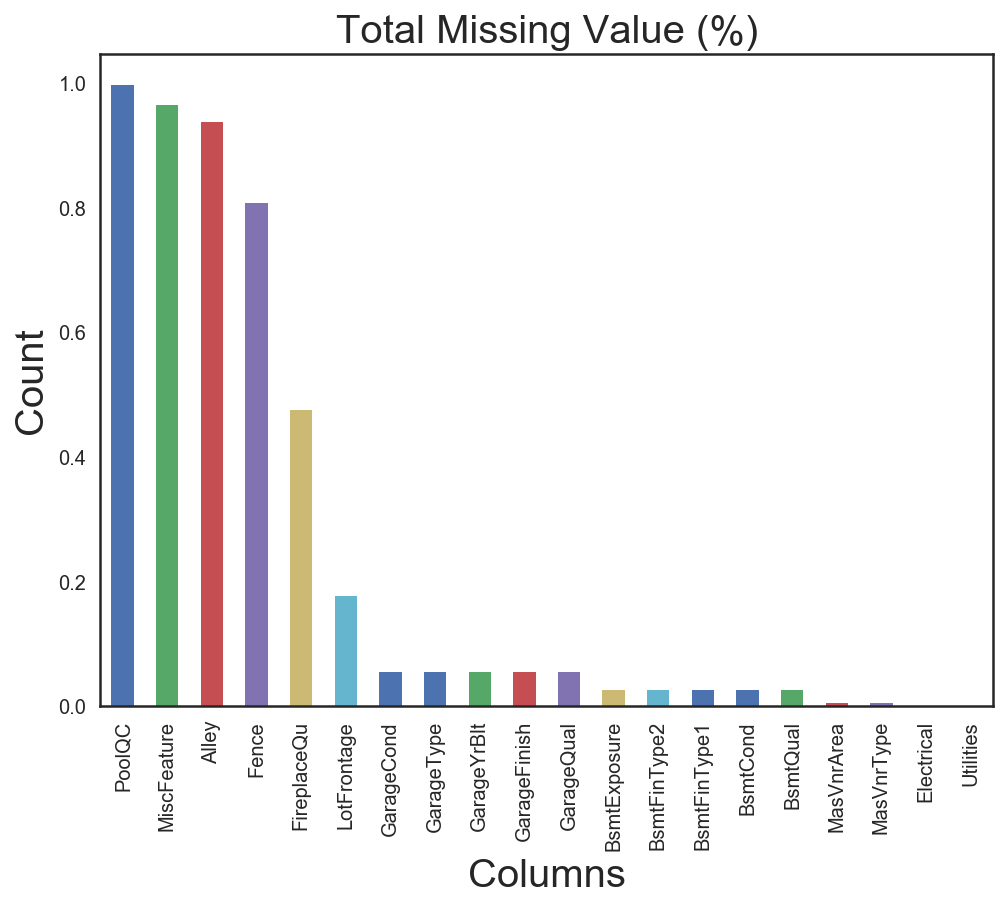

In [38]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize=(8, 6), fontsize=10)
plt.xlabel("Columns", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Total Missing Value (%)", fontsize=20)

用热力图看看缺失值。

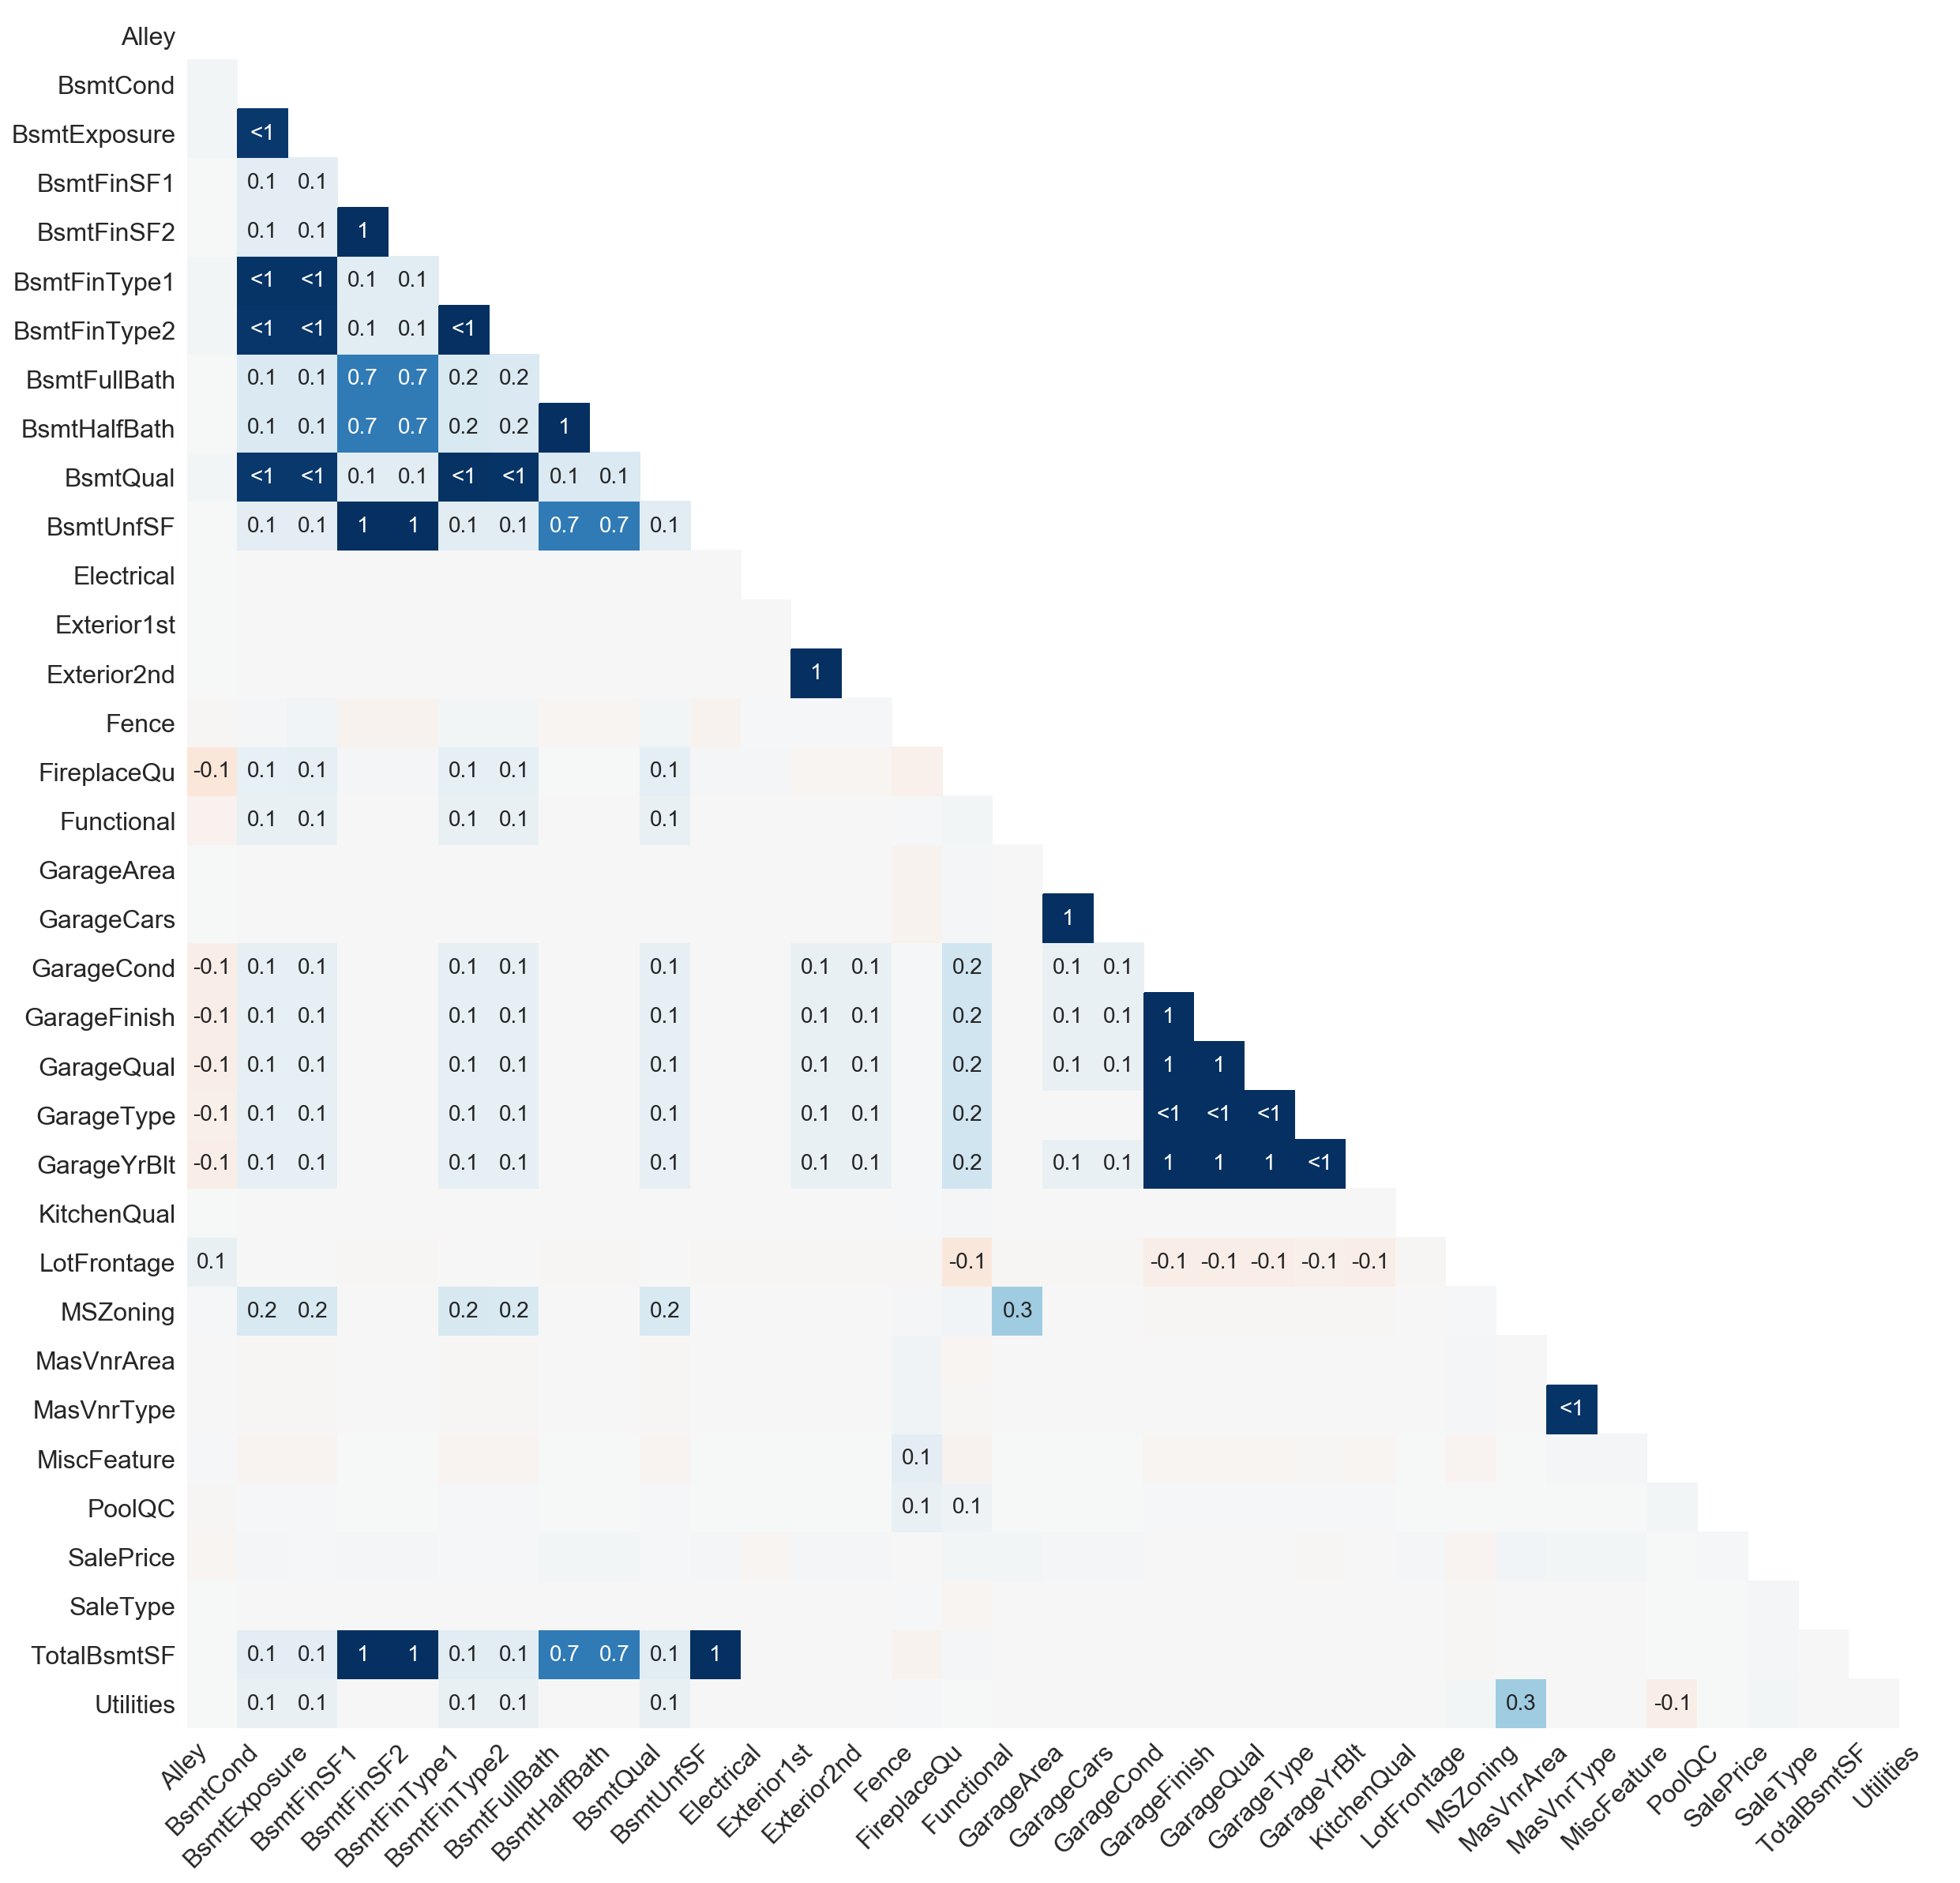

In [40]:
import missingno as msno

len_train = df_train.shape[0]
y_reg = df_train['SalePrice']
Id = df_test['Id']
df_all = pd.concat([df_train, df_test])
del df_all['Id']
missingdata_df = df_all.columns[df_all.isnull().any()].tolist()
msno.heatmap(df_all[missingdata_df], figsize=(20, 20))
plt.show()

We can look at some variables that have correlations between missing values. like Garage ~, Bsmt ~.



First, i delete utilities bacause of the value has 2 unique values and Allpubhas freq 2906 , NoSeWa freq 1. 

In [41]:
# df_all['Utilities']

In [42]:
df_all['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [43]:
df_all['Utilities'][df_all['Utilities']=='NoSeWa']

944    NoSeWa
Name: Utilities, dtype: object

In [44]:
df_all['Utilities'][df_all['Utilities'].isnull()]

455    NaN
485    NaN
Name: Utilities, dtype: object

In [45]:
df_all['Utilities'].describe()

count       2907
unique         2
top       AllPub
freq        2906
Name: Utilities, dtype: object

In [46]:
del df_all['Utilities']

And treats the missing values as None like BsmtCond variable

*BsmtCond Values*
```
   Ex   Excellent
   Gd   Good
   TA   Typical - slight dampness allowed
   Fa   Fair - dampness or some cracking or settling
   Po   Poor - Severe cracking, settling, or wetness
   NA   No Basement
   ```

In [47]:
#in these features, NAN means none
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")
df_all["Alley"] = df_all["Alley"].fillna("None")
df_all["Fence"] = df_all["Fence"].fillna("None")
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")
df_all['BsmtQual'] = df_all['BsmtQual'].fillna('None')
df_all['BsmtCond'] = df_all['BsmtCond'].fillna('None')
df_all['BsmtExposure'] = df_all['BsmtExposure'].fillna('None')
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].fillna('None')
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].fillna('None')
df_all['GarageType'] = df_all['GarageType'].fillna('None')
df_all['GarageFinish'] = df_all['GarageFinish'].fillna('None')
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
df_all['GarageCond'] = df_all['GarageCond'].fillna('None')

And treats the missing values as 0 like BsmtFinSF1 variable

*BsmtFinSF1 Values :  Type 1 finished square feet*

In [48]:
#in these features, NAN means 0
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(0)
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(0)
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(0)
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(0)
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].fillna(0)
df_all['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(0)
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['GarageCars'] = df_all['GarageCars'].fillna(0)
df_all['GarageArea'] = df_all['GarageArea'].fillna(0)

Filling a missing value with simply mode is a risk of Bias. But it is the most representative method.

In [49]:
# These features, we just fill them with common case
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['MasVnrType'] = df_all['MasVnrType'].fillna(df_all['MasVnrType'].mode()[0])
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

*LotFrontage : Linear feet of street connected to property*

We will fill LotFrontage in assuming that LotFrontage is similar between neighbors. 
So we have to make sure that the assumption is correct.

![](https://github.com/choco9966/Team-EDA/blob/master/image/Lotfrontage.PNG?raw=true)

In [50]:
# df_all['LotFrontage']

In [51]:
df_all[df_all['Neighborhood']=='BrkSide']['LotFrontage'].describe()

count     95.000000
mean      55.789474
std       12.722818
min       50.000000
25%       50.000000
50%       51.000000
75%       58.500000
max      144.000000
Name: LotFrontage, dtype: float64

In [52]:
df_all[df_all['Neighborhood']=='CollgCr']['LotFrontage'].describe()

count    220.000000
mean      71.336364
std       15.940401
min       36.000000
25%       64.000000
50%       70.000000
75%       78.000000
max      133.000000
Name: LotFrontage, dtype: float64

When I look at two situations, it is similar from 25quantile to 75quantile, so it may be ok to fill with median

<span class="burk">注意：这里 `transform` 的用法，针对不同的分组，填充不同的缺失值。</span>

In [54]:
# LotFrontage has more missing value, thus we consider it more delicately
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

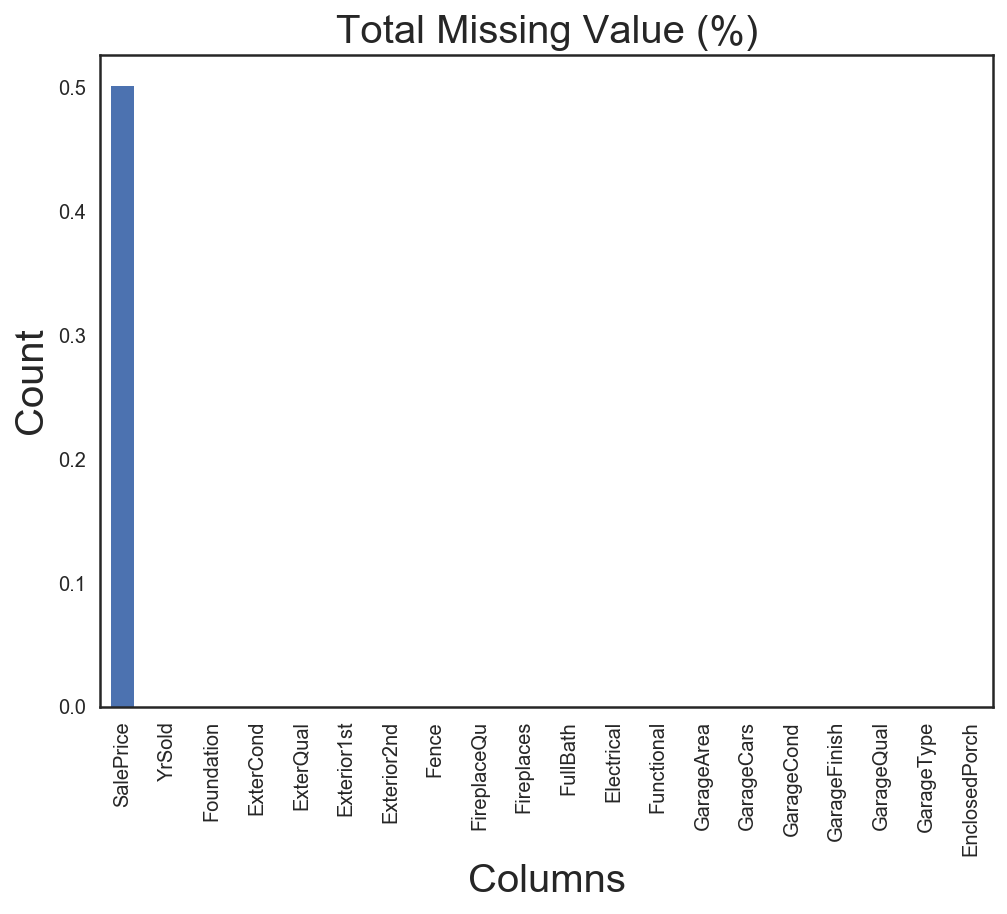

In [55]:
#missing data
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)
plt.show()
# 到这一步，缺失值都填充完成了

Now, all variables has no NA

### 2.3 Object Encoding : one-hot, Label, Frequency
*2.2 Normalization is done*

We need to encoding object type data so it can be read by a computer. Typically, one-hot, label, and frequency are used, and how to use it will be judged by the performance of LB and CV.

#### 2.3.1. One-hot Encoding
*Example*

![](https://github.com/choco9966/Team-EDA/blob/master/image/one-hot.PNG?raw=true)

 Changing OverallCond,MSSubClass into a categorical variable

In [56]:
# MSSubClass 这个变量没有序的关系，所以要处理成字符串
df_all['MSSubClass']

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
1429     30
1430     50
1431     30
1432    190
1433     50
1434    120
1435    120
1436     20
1437     90
1438     20
1439     80
1440     20
1441     20
1442     20
1443     20
1444     20
1445     90
1446    160
1447     20
1448     90
1449    180
1450    160
1451     20
1452    160
1453    160
1454    160
1455    160
1456     20
1457     85
1458     60
Name: MSSubClass, Length: 2909, dtype: int64

In [57]:
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)

In [58]:
df_all['OverallCond']

0       5
1       8
2       5
3       5
4       5
5       5
6       5
7       6
8       5
9       6
10      5
11      5
12      6
13      5
14      5
15      8
16      7
17      5
18      5
19      6
20      5
21      7
22      5
23      7
24      8
25      5
26      7
27      5
28      6
29      6
       ..
1429    6
1430    5
1431    5
1432    6
1433    5
1434    5
1435    5
1436    6
1437    5
1438    5
1439    6
1440    5
1441    5
1442    5
1443    5
1444    3
1445    5
1446    6
1447    7
1448    5
1449    6
1450    4
1451    5
1452    5
1453    5
1454    7
1455    5
1456    7
1457    5
1458    5
Name: OverallCond, Length: 2909, dtype: int64

In [59]:
# Changing OverallCond into a categorical variable
df_all['OverallCond'] = df_all['OverallCond'].astype(str)

<span class="burk">类别变量和字符变量的选择和处理。</span>

In [60]:
categorical_features = df_all.select_dtypes(include = ["object"]).columns
numerical_features = df_all.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 34
Categorical features : 44


In [61]:
# from sklearn.preprocessing import OneHotEncoder

one_hot_encoding = df_all.copy()
one_hot_encoding = pd.get_dummies(one_hot_encoding)
#len_train
one_hot_encoding.iloc[:, 36:50].head()

Alley_None  Alley_Pave  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0           1           0              1                0                0   
1           1           0              1                0                0   
2           1           0              1                0                0   
3           1           0              1                0                0   
4           1           0              1                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_None  \
0               0                0            0            0              0   
1               0                0            0            0              0   
2               0                0            0            0              0   
3               0                0            0            1              0   
4               0                0            0            0              0   

   BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  
0            0            1                0                0  
1            0            1                0                1  
2            0            1                0                0  
3            0            0                0                0  
4            0            1                1                0

In [ ]:
del one_hot_encoding;

#### 2.3.2. Label Encoding
*Example*
![](https://github.com/choco9966/Team-EDA/blob/master/image/Label.PNG?raw=true)

In [62]:
categorical_features

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType', 'Street'],
      dtype='object')

In [66]:
# df_all['FireplaceQu']

In [67]:
pd.factorize(df_all['FireplaceQu'])

(array([0, 1, 1, ..., 1, 0, 1]),
 Index(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype='object'))

In [63]:
label_encoding = df_all.copy()
for i in categorical_features:
    label_encoding[i], indexer = pd.factorize(label_encoding[i])
label_encoding.iloc[:, 20:30].head()

EnclosedPorch  ExterCond  ExterQual  Exterior1st  Exterior2nd  Fence  \
0              0          0          0            0            0      0   
1              0          0          1            1            1      0   
2              0          0          0            0            0      0   
3            272          0          1            2            2      0   
4              0          0          0            0            0      0   

   FireplaceQu  Fireplaces  Foundation  FullBath  
0            0           0           0         2  
1            1           1           1         2  
2            1           1           0         2  
3            2           1           2         1  
4            1           1           0         2

In [ ]:
del label_encoding;

#### 2.3.3. Frequency Encoding
*Example*

![](https://github.com/choco9966/Team-EDA/blob/master/image/Frequency.PNG?raw=true)

In [68]:
frequency_encoding_all = df_all.copy()


def frequency_encoding(frame, col):
    freq_encoding = frame.groupby([col]).size() / frame.shape[0]
    freq_encoding = freq_encoding.reset_index().rename(
        columns={
            0: '{}_Frequency'.format(col)
        })
    return frame.merge(freq_encoding, on=col, how='left')


for col in categorical_features:
    frequency_encoding_all = frequency_encoding(frequency_encoding_all, col)
    
frequency_encoding_all = frequency_encoding_all.drop(categorical_features, axis=1, inplace=False)
frequency_encoding_all.iloc[:, 20:30].head()

LowQualFinSF  MasVnrArea  MiscVal  MoSold  OpenPorchSF  OverallQual  \
0             0       196.0        0       2           61            7   
1             0         0.0        0       5            0            6   
2             0       162.0        0       9           42            7   
3             0         0.0        0       2           35            7   
4             0       350.0        0      12           84            8   

   PoolArea  SalePrice  ScreenPorch  TotRmsAbvGrd  
0         0  12.247699            0             8  
1         0  12.109016            0             6  
2         0  12.317171            0             6  
3         0  11.849405            0             7  
4         0  12.429220            0             9

In [69]:
del frequency_encoding_all

### 2.4. Cross Validation Strategy
![](https://github.com/choco9966/Team-EDA/blob/master/image/Cross%20validation.PNG?raw=true)

Cross validation is very important. It is a criterion to judge the performance of the model in the competition. Because LB uses only 50% of the total data (usually 20%), it can secure the reliability of the model. 

The hold out method is used when there is no difference between the CVs of folds or data related time. So i use the k-fold or LOOCV  by testing encoding method

可以看到两篇文章都做了交叉验证。

In [70]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#K-folds Validation function
n_folds = 5 # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [71]:
one_hot_encoding = df_all.copy()
del one_hot_encoding['SalePrice']
one_hot_encoding = pd.get_dummies(one_hot_encoding)
one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]
del one_hot_encoding


In [72]:
import lightgbm as lgb

model = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11)
score = rmsle_cv(model, one_hot_encoding_train)
print("One-hot encoding(5-folds) LGBM score: {:.4f} ({:.4f})\n".format(
    score.mean(), score.std()))


def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


kfold_lgb_model = model.fit(one_hot_encoding_train, y_reg)
train_prediction = model.predict(one_hot_encoding_train)
prediction = np.expm1(kfold_lgb_model.predict(one_hot_encoding_test.values))
submission = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
submission.to_csv('OH_5FOLD.csv', index=False)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


One-hot encoding(5-folds) LGBM score: 0.1162 (0.0059)



In [73]:
#K-folds Validation function
n_folds = one_hot_encoding_train.shape[0] # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [74]:
import lightgbm as lgb

from sklearn.model_selection import KFold, cross_val_score, train_test_split

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.05, n_estimators=720,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  
score = rmsle_cv(model,one_hot_encoding_train)  
print("One-hot encoding(LOOCV) LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

loovc_lgb_model = model.fit(one_hot_encoding_train, y_reg)
train_prediction = model.predict(one_hot_encoding_train)
prediction = np.expm1(loovc_lgb_model.predict(one_hot_encoding_test.values))
submission = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
submission.to_csv('OH_LOOCV.csv', index=False)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#K-folds Validation function
n_folds = 5 # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

label_encoding = df_all.copy()
for i in categorical_features:
    label_encoding[i], indexer = pd.factorize(label_encoding[i])
    
del label_encoding['SalePrice']
label_encoding_train = label_encoding[:len_train]
label_encoding_test = label_encoding[len_train:]
del label_encoding


model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.05, n_estimators=720,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

score = rmsle_cv(model,label_encoding_train)  
print("Label encoding(5-folds) LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

kfold_lgb_model = model.fit(label_encoding_train, y_reg)
train_prediction = model.predict(label_encoding_train)
prediction = np.expm1(model.predict(label_encoding_test.values))
submission = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
submission.to_csv('Label_5FOLD.csv', index=False)

In [ ]:
#K-folds Validation function
n_folds = label_encoding_train.shape[0] # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.05, n_estimators=720,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  
score = rmsle_cv(model,label_encoding_train)  
print("Label encoding(LOOCV) LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

loovc_lgb_model = model.fit(label_encoding_train, y_reg)
train_prediction = model.predict(label_encoding_train)
prediction = np.expm1(loovc_lgb_model.predict(label_encoding_test.values))
submission = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
submission.to_csv('Label_LOOCV.csv', index=False)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#K-folds Validation function
n_folds = 5 # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

frequency_encoding_all = df_all.copy()
    
def frequency_encoding(frame, col):
    freq_encoding = frame.groupby([col]).size()/frame.shape[0] 
    freq_encoding = freq_encoding.reset_index().rename(columns={0:'{}_Frequency'.format(col)})
    return frame.merge(freq_encoding, on=col, how='left')

for col in categorical_features:
    frequency_encoding_all = frequency_encoding(frequency_encoding_all, col)
frequency_encoding_all = frequency_encoding_all.drop(categorical_features,axis=1, inplace=False)

del frequency_encoding_all['SalePrice']
frequency_encoding_train = frequency_encoding_all[:len_train]
frequency_encoding_test = frequency_encoding_all[len_train:]
del frequency_encoding_all


model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.05, n_estimators=720,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

score = rmsle_cv(model,frequency_encoding_train)  
print("Frequency encoding(5-folds) LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

kfold_lgb_model = model.fit(frequency_encoding_train, y_reg)
train_prediction = model.predict(frequency_encoding_train)
prediction = np.expm1(model.predict(frequency_encoding_test.values))
submission = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
submission.to_csv('Frequency_5FOLD.csv', index=False)

In [ ]:
#K-folds Validation function
n_folds = frequency_encoding_train.shape[0] # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.05, n_estimators=720,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  
score = rmsle_cv(model,frequency_encoding_train)  
print("Label encoding(LOOCV) LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

loovc_lgb_model = model.fit(frequency_encoding_train, y_reg)
train_prediction = model.predict(frequency_encoding_train)
prediction = np.expm1(loovc_lgb_model.predict(frequency_encoding_test.values))
submission = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
submission.to_csv('Frequency_LOOCV.csv', index=False)

|    | One-hot encoding(5-fold) | Label encoding(5-fold) | Frequency encoding(5-fold) |  One-hot encoding(LOOCV) | Label encoding(LOOCV) | Frequency encoding(LOOCV)|
|----|------------------|----------------|--------------------|---------------|--------------|--------------|
| CV |0.1167(0.0069)                |0.1169(0.0055)                |0.1169 (0.0056)                    |0.0793(0.0850)               | 0.0795 (0.0853)             | 0.0799 (0.0843)             |
| LB |                  |                |                    |               |              |              |

## 3. Feature Engineering 特征工程

特征的加减乘除。

### 3.1. Addition, subtraction, multiplication, division.
|Variable Name    | Description |
|----|------------------|
| Total_sqr_footage  |BsmtFinSF1 + BsmtFinSF2 + 1stFlrSF + 2ndFlrSF|
|Total_Bathrooms  | FullBath + 0.5xHalfBath + BsmtFullBath + 0.5xBsmtHalfBath                | 
|Total_porch_sf |OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF|
|TotalHouse |TotalBsmtSF+1stFlrSF+2ndFlrSF|
|TotalArea |TotalBsmtSF+1stFlrSF+2ndFlrSF+GarageArea|
|GrLivArea_OverallQual|GrLivArea * OverallQual|
|LotArea_OverallQual|LotArea * OverallQual|

In [ ]:
one_hot_encoding = pd.concat([one_hot_encoding_train,one_hot_encoding_test])
one_hot_encoding['Total_sqr_footage'] = one_hot_encoding['BsmtFinSF1'] + one_hot_encoding['BsmtFinSF2'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF']
one_hot_encoding['Total_Bathrooms'] = one_hot_encoding['FullBath'] + one_hot_encoding['HalfBath'] + one_hot_encoding['BsmtFullBath'] + one_hot_encoding['BsmtHalfBath']
one_hot_encoding['Total_porch_sf'] = one_hot_encoding['OpenPorchSF'] + one_hot_encoding['3SsnPorch'] + one_hot_encoding['EnclosedPorch'] + one_hot_encoding['ScreenPorch'] + one_hot_encoding['WoodDeckSF'] 
one_hot_encoding['TotalHouse'] = one_hot_encoding['TotalBsmtSF'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF']
one_hot_encoding['TotalArea'] = one_hot_encoding['TotalBsmtSF'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF'] + one_hot_encoding["GarageArea"]
one_hot_encoding['GrLivArea_OverallQual'] = one_hot_encoding['GrLivArea'] * one_hot_encoding['OverallQual']
one_hot_encoding['LotArea_OverallQual'] = one_hot_encoding['LotArea'] * one_hot_encoding['OverallQual']

### 3.2. Statistical variables. Ex) min, max, mean, std, skewness, kurtosis etc...
|Variable Name    | Description |
|----|------------------|
| overall_statistical  | The statistical value of a person with a house of similar **quality** to me.|
| neighborhood_statistical  | The statistical value of a person with a house of similar **region** to me.               | 

In [ ]:
#one_hot_encoding['SalePrice'] = y_reg
#agg = one_hot_encoding.groupby(['OverallQual'])['SalePrice'].agg('mean').reset_index()
#one_hot_encoding = one_hot_encoding.merge(agg, suffixes=["", "_mean"], how='left', on=['OverallQual'])
#agg = one_hot_encoding.groupby(['neighborhood'])['SalePrice'].agg('mean').reset_index()
#one_hot_encoding = one_hot_encoding.merge(agg, suffixes=["", "_mean"], how='left', on=['OverallQual'])

However, this is done before encoding, and if you apply this variable, the score has dropped so i don't use it

### 3.3. Make a Categorical Variable. 1 if exist, 0 if absent
|Variable Name    | Description |
|----|------------------|
| haspool  |  1 if pool exist, else 0 |
| hasgarage  | 1 if garage exist, else 0 | 
| hasbsmt  |  1 if bsmt exist, else 0 |
| hasfireplace  | 1 if fireplace exist, else 0  | 

In [ ]:
one_hot_encoding['haspool'] = one_hot_encoding['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasgarage'] = one_hot_encoding['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasbsmt'] = one_hot_encoding['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasfireplace'] = one_hot_encoding['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### 3.4. Normalization 

In [ ]:
from scipy.stats import skew

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in one_hot_encoding.columns:
    if one_hot_encoding[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = one_hot_encoding[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews.head()

In [ ]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    one_hot_encoding[i]= boxcox1p(one_hot_encoding[i], boxcox_normmax(one_hot_encoding[i]+1))

        
skew_features2 = one_hot_encoding[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2.head()

## 4. Modeling
I refer model code & ensemble code in [Ming - Top 2% from Laurenstc on house price prediction
](https://www.kaggle.com/hemingwei/top-2-from-laurenstc-on-house-price-prediction/notebook)

### 4.1. Ridge

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV

one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]
del one_hot_encoding

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, one_hot_encoding_train, y_reg, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(one_hot_encoding_train, y_reg)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)
    
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

Check more accuracy alpha

In [ ]:
alphas_alt = [9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1,10.2]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(one_hot_encoding_train, y_reg)

print("Ridge rmse : ",cv_rmse(ridge_model2).mean())

In [ ]:
print("Best of alpha in ridge model :" ,ridge_model2.steps[1][1].alpha_)

In [ ]:
ridge_coef = pd.DataFrame(np.round_(ridge_model2.steps[1][1].coef_, decimals=3), 
one_hot_encoding_test.columns, columns = ["penalized_regression_coefficients"])
# remove the non-zero coefficients
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
# sort the values from high to low
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', 
ascending = False)

# plot the sorted dataframe
fig = plt.figure(figsize = (25,25))
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , 
data=ridge_coef)
ax.set(xlabel='Penalized Regression Coefficients')

### 4.2 Lasso 

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2,
                                    random_state = 42)).fit(one_hot_encoding_train, y_reg)
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [ ]:
print("Best of alpha in lasso model :",lasso_model2.steps[1][1].alpha_)
print("lasso rmse : ",cv_rmse(lasso_model2).mean())

In [ ]:
lasso_coef = pd.DataFrame(np.round_(lasso_model2.steps[1][1].coef_, decimals=3), 
one_hot_encoding_test.columns, columns = ["penalized_regression_coefficients"])
# remove the non-zero coefficients
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
# sort the values from high to low
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', 
ascending = False)

# plot the sorted dataframe
fig = plt.figure(figsize = (25,25))
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , 
data=lasso_coef)
ax.set(xlabel='Penalized Regression Coefficients')

### 4.3 ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(one_hot_encoding_train, y_reg)
print("elastic model rmse : ",cv_rmse(elastic_model3).mean())

### 4.4 XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb3 = XGBRegressor(learning_rate =0.01, n_estimators=5200, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb_fit = xgb3.fit(one_hot_encoding_train, y_reg)
print("Xgboost model rmse : ",cv_rmse(xgb_fit).mean())

### 4.5 LightGBM

In [ ]:
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.01, n_estimators=5000,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

lgbm_fit = model.fit(one_hot_encoding_train, y_reg)
print("lightgbm model rmse : ",cv_rmse(model).mean())

In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = one_hot_encoding_test.columns
feature_importance_df["importance"] = model.feature_importances_

In [ ]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

## 5. Ensemble
### 5.1 Stacking
![](https://github.com/choco9966/Team-EDA/blob/master/image/Stacking.PNG?raw=true)

In [ ]:
train_ridge_preds = ridge_model2.predict(one_hot_encoding_train)
train_lasso_preds = lasso_model2.predict(one_hot_encoding_train)
train_elastic_preds = elastic_model3.predict(one_hot_encoding_train)
train_xgb_preds = xgb_fit.predict(one_hot_encoding_train)
train_lgbm_preds = lgbm_fit.predict(one_hot_encoding_train)

stackX = pd.DataFrame(np.transpose(np.array([train_ridge_preds,train_lasso_preds,train_elastic_preds,train_xgb_preds,train_lgbm_preds])))

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.01, n_estimators=4500,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

stack_fit = model.fit(stackX, y_reg)

In [ ]:
print("lightgbm model rmse : ",cv_rmse(model).mean())

In [ ]:
test_ridge_preds = ridge_model2.predict(one_hot_encoding_test)
test_lasso_preds = lasso_model2.predict(one_hot_encoding_test)
test_elastic_preds = elastic_model3.predict(one_hot_encoding_test)
test_xgb_preds = xgb_fit.predict(one_hot_encoding_test)
test_lgbm_preds = lgbm_fit.predict(one_hot_encoding_test)

In [ ]:
submission = pd.DataFrame({'Id': Id, 'SalePrice': np.expm1(test_ridge_preds)})
submission.to_csv('ridge.csv', index=False)
submission = pd.DataFrame({'Id': Id, 'SalePrice': np.expm1(test_lasso_preds)})
submission.to_csv('lasso.csv', index=False)
submission = pd.DataFrame({'Id': Id, 'SalePrice': np.expm1(test_elastic_preds)})
submission.to_csv('elastic.csv', index=False)
submission = pd.DataFrame({'Id': Id, 'SalePrice': np.expm1(test_xgb_preds)})
submission.to_csv('xgb.csv', index=False)
submission = pd.DataFrame({'Id': Id, 'SalePrice': np.expm1(test_lgbm_preds)})
submission.to_csv('lgbm.csv', index=False)

In [ ]:
test_stackX = pd.DataFrame(np.transpose(np.array([test_ridge_preds,test_lasso_preds,test_elastic_preds,test_xgb_preds,test_lgbm_preds])))
stack_pred = np.expm1(stack_fit.predict(test_stackX))
submission = pd.DataFrame({'Id': Id, 'SalePrice': stack_pred})
submission.to_csv('LGB_stacking.csv', index=False)

Before apply boxcox(Version18)

|    | Ridge | Lasso |  Elastic |  Xgboost | LightGBM | Stacking  |Simple Average            | Weight Average
|----|------------------|----------------|--------------------|---------------|--------------|--------------|--------------|--------------|--------------|
| CV |0.11352                |0.11225                |0.11244                   |0.11467              |  0.11524            |             |             |             | 
| LB | 0.12282                | 0.12490               |0.12503                   | 0.12762              | 0.12098             |0.12595             |             |             | 

After apply boxcox(Version19)

|    | Ridge | Lasso |  Elastic |  Xgboost | LightGBM | Stacking  |Simple Average            | Weight Average
|----|------------------|----------------|--------------------|---------------|--------------|--------------|--------------|--------------|--------------|
| CV |0.11082               |0.11044              | 0.11028                  |0.11327              |  0..11517            |             |             |             | 
| LB | 0.12158                | 0.12454               |0.12457                   | 0.12827              | 0.12183             |             |             |             | 

### 5.2 Average
![](https://github.com/choco9966/Team-EDA/blob/master/image/Average1.PNG?raw=true)

In [ ]:
### Simple Average
average = 0.2*test_ridge_preds + 0.2*test_lasso_preds + 0.2*test_elastic_preds + 0.2*test_xgb_preds + 0.2*test_lgbm_preds
average = np.expm1(average)
submission = pd.DataFrame({'Id': Id, 'SalePrice': average})
submission.to_csv('SimpleAvg.csv', index=False)

Before apply boxcox(Version18)

|    | Ridge | Lasso |  Elastic |  Xgboost | LightGBM | Stacking  |Simple Average            | Weight Average
|----|------------------|----------------|--------------------|---------------|--------------|--------------|--------------|--------------|--------------|
| CV |0.11352                |0.11225                |0.11244                   |0.11467              |  0.11524            |             |             |             | 
| LB | 0.12282                | 0.12490               |0.12503                   | 0.12762              | 0.12098             |0.12595             | 0.12110            |             | 

After apply boxcox(Version19)

|    | Ridge | Lasso |  Elastic |  Xgboost | LightGBM | Stacking  |Simple Average            | Weight Average
|----|------------------|----------------|--------------------|---------------|--------------|--------------|--------------|--------------|--------------|
| CV |0.11082               |0.11044              | 0.11028                  |0.11327              |  0..11517            |             |             |             | 
| LB | 0.12282                | 0.12490               |0.12503                   | 0.12762              | 0.12098             |0.12595             |             |             | 

In [ ]:
### Weight Average
weight_average1 = 0.3980767*test_ridge_preds + -0.03065248*test_lasso_preds + 0.12292276*test_elastic_preds + -0.20778906*test_xgb_preds + 0.71743772*test_lgbm_preds
weight_average1 = np.expm1(weight_average1)
submission = pd.DataFrame({'Id': Id, 'SalePrice': weight_average1})
submission.to_csv('WeightAvg1.csv', index=False)

In [ ]:
### Weight Average
weight_average2 = 0.28018685*test_ridge_preds + 0.10355858*test_lasso_preds + 0.1161906*test_elastic_preds + 0.006204816*test_xgb_preds + 0.49386202*test_lgbm_preds
weight_average2 = np.expm1(weight_average2)
submission = pd.DataFrame({'Id': Id, 'SalePrice': weight_average2})
submission.to_csv('WeightAvg2.csv', index=False)

Before apply boxcox(Version18)

|    | Ridge | Lasso |  Elastic |  Xgboost | LightGBM | Stacking  |Simple Average            | Weight Average
|----|------------------|----------------|--------------------|---------------|--------------|--------------|--------------|--------------|--------------|
| CV |0.11352                |0.11225                |0.11244                   |0.11467              |  0.11524            |             |             |             | 
| LB | 0.12282                | 0.12490               |0.12503                   | 0.12762              | 0.12098             |0.12595             | 0.12110            |   0.11883          | 

After apply boxcox(Version19)

|    | Ridge | Lasso |  Elastic |  Xgboost | LightGBM | Stacking  |Simple Average            | Weight Average
|----|------------------|----------------|--------------------|---------------|--------------|--------------|--------------|--------------|--------------|
| CV |0.11082               |0.11044              | 0.11028                  |0.11327              |  0..11517            |             |             |             | 
| LB | 0.12282                | 0.12490               |0.12503                   | 0.12762              | 0.12098             |0.12595             |             |             | 

outlier in https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force 

## 6. Next 

In addition, you must continue with EDA. 
- Find a new feature and outliers.
- Tuning the hyperparameters.
- Read a other's Kernels
- Ensemble with other's Kernel output

then, you can get a Nice Score!!!

![](https://github.com/choco9966/Team-EDA/blob/master/image/last_Score.PNG?raw=true)

Thank you for reading it.

### Resources
https://www.slideshare.net/yeonminkim/pycon-korea-2018-kaggle-tutorialkaggle-break  
Kaggle 우승작으로 배우는 머신러닝 탐구생활   
https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way    
https://www.kaggle.com/jens0306/easy-prediction-using-lightgbm-model    
https://www.kaggle.com/hemingwei/top-2-from-laurenstc-on-house-price-prediction/notebook    
  